In [59]:
import sys 
import os 
import glob
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import scipy
import scipy.stats
import matplotlib.ticker as ticker
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from pylab import *
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter, FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from gridData import Grid 
from io import StringIO
from collections import Counter
from scipy import stats
from scipy.stats import norm
from  scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from pylab import *
from matplotlib.ticker import NullFormatter
from matplotlib import font_manager


##Figure fonts and other params ##
hfont = {'fontname':'Helvetica'}
mpl.rcParams['figure.dpi'] =300
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['pdf.fonttype'] = 42 

In [49]:
## Panel A -- Rg. vs %Scalling.

# Unbiased ##
ub_pws5  =  '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws5/BME/ub_pws5_Rg_1ns.dat'
ub_pws6  =  '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws6/BME/ub_pws6_Rg_1ns.dat'
ub_pws8  =  '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws8/BME/ub_pws8_Rg_1ns.dat'  
ub_pws10 = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/ub_pws10_Rg_1ns.dat'

Rg_ubpws5= np.genfromtxt(ub_pws5)
Rg_ubpws6= np.genfromtxt(ub_pws6)
Rg_ubpws8= np.genfromtxt(ub_pws8)
Rg_ubpws10= np.genfromtxt(ub_pws10)

ub_Rgpws5_mean=np.average(Rg_ubpws5[:,1])
ub_Rgpws6_mean=np.average(Rg_ubpws6[:,1])
ub_Rgpws8_mean=np.average(Rg_ubpws8[:,1])
ub_Rgpws10_mean=np.average(Rg_ubpws10[:,1])

ub_Rgpws5_std=np.std(Rg_ubpws5[:,1])
ub_Rgpws6_std=np.std(Rg_ubpws6[:,1])
ub_Rgpws8_std=np.std(Rg_ubpws8[:,1])
ub_Rgpws10_std=np.std(Rg_ubpws10[:,1])

print ('Rg_pws5 mean ± std =', ub_Rgpws5_mean, '±', ub_Rgpws5_std)
print ('Rg_pws6 mean ± std =', ub_Rgpws6_mean, '±', ub_Rgpws6_std)
print ('Rg_pws8 mean ± std =', ub_Rgpws8_mean, '±', ub_Rgpws8_std)
print ('Rg_pws10 mean ± std =',ub_Rgpws10_mean, '±',ub_Rgpws10_std)

# Rg-metad 

#md_pws10 = '/home/raul/projects/GHR_ICD_metaD_fits/pws10/bm/BME/Rg_pws10_1ns.dat'
#md_pws11 = '/home/raul/projects/GHR_ICD_metaD_fits/pws11/bm/BME/Rg_pws11_1ns.dat'
#md_pws12 = '/home/raul/projects/GHR_ICD_metaD_fits/pws12/bm/BME/Rg_pws12_1ns.dat'
#md_pws13 = '/home/raul/projects/GHR_ICD_metaD_fits/pws13/BME/rgmd_pws13_Rg_1ns.dat'
#md_pws14 = '/home/raul/projects/GHR_ICD_metaD_fits/pws14/BME/rgmd_pws14_Rg_1ns.dat'
#md_pws15


Rg_pws5 mean ± std = 31.9190429701 ± 7.35266144706
Rg_pws6 mean ± std = 47.7102166308 ± 8.54420074428
Rg_pws8 mean ± std = 58.7534728013 ± 9.52447979455
Rg_pws10 mean ± std = 67.4344636489 ± 15.0562676492


In [50]:
# Rg-metad 

md_pws10 = '/home/raul/projects/GHR_ICD_metaD_fits/pws10/bm/BME/Rg_pws10_1ns.dat'
md_pws11 = '/home/raul/projects/GHR_ICD_metaD_fits/pws11/bm/BME/Rg_pws11_1ns.dat'
md_pws12 = '/home/raul/projects/GHR_ICD_metaD_fits/pws12/bm/BME/Rg_pws12_1ns.dat'
md_pws13 = '/home/raul/projects/GHR_ICD_metaD_fits/pws13/BME/rgmd_pws13_Rg_1ns.dat'
md_pws14 = '/home/raul/projects/GHR_ICD_metaD_fits/pws14/BME/rgmd_pws14_Rg_1ns.dat'
md_pws15 = '/home/raul/projects/GHR_ICD_metaD_fits/pws15/BME/rgmd_pws15_Rg_1ns.dat'

#weights

w_mdpws10 = '/home/raul/projects/GHR_ICD_metaD_fits/pws10/bm/BME/pws10_Rg_weights_1ns.dat'
w_mdpws11 = '/home/raul/projects/GHR_ICD_metaD_fits/pws11/bm/BME/pws11_Rg_weights_1ns.dat'
w_mdpws12 = '/home/raul/projects/GHR_ICD_metaD_fits/pws12/bm/BME/pws12_Rg_weights_1ns.dat'
w_mdpws13 = '/home/raul/projects/GHR_ICD_metaD_fits/pws13/BME/pws13_Rg_weights_1ns.dat'
w_mdpws14 = '/home/raul/projects/GHR_ICD_metaD_fits/pws14/BME/pws14_Rg_weights_1ns.dat'
w_mdpws15 = '/home/raul/projects/GHR_ICD_metaD_fits/pws15/BME/pws15_Rg_weights_1ns.dat'

Rg_mdpws10= np.genfromtxt(md_pws10)
Rg_mdpws11= np.genfromtxt(md_pws11)
Rg_mdpws12= np.genfromtxt(md_pws12)
Rg_mdpws13= np.genfromtxt(md_pws13)
Rg_mdpws14= np.genfromtxt(md_pws14)
Rg_mdpws15= np.genfromtxt(md_pws15)

W_mdpws10= np.genfromtxt(w_mdpws10)
W_mdpws11= np.genfromtxt(w_mdpws11)
W_mdpws12= np.genfromtxt(w_mdpws12)
W_mdpws13= np.genfromtxt(w_mdpws13)
W_mdpws14= np.genfromtxt(w_mdpws14)
W_mdpws15= np.genfromtxt(w_mdpws15)

Rgbpws10_mean=np.average((Rg_mdpws10), weights=W_mdpws10[:,1])
Rgbpws11_mean=np.average((Rg_mdpws11), weights=W_mdpws11[:,1])
Rgbpws12_mean=np.average((Rg_mdpws12), weights=W_mdpws12[:,1])
Rgbpws13_mean=np.average((Rg_mdpws13[:,1]), weights=W_mdpws13[:,1])
Rgbpws14_mean=np.average((Rg_mdpws14[:,1]), weights=W_mdpws14[:,1])
Rgbpws15_mean=np.average((Rg_mdpws15[:,1]), weights=W_mdpws15[:,1])

print ('Rgbpws10 mean =', Rgbpws10_mean)
print ('Rgbpws11 mean =', Rgbpws11_mean)
print ('Rgbpws12 mean =', Rgbpws12_mean)
print ('Rgbpws13 mean =', Rgbpws13_mean)
print ('Rgbpws14 mean =', Rgbpws14_mean)
print ('Rgbpws15 mean =', Rgbpws15_mean)



Rgbpws10 mean = 59.6653801023
Rgbpws11 mean = 53.7159166513
Rgbpws12 mean = 74.3595466717
Rgbpws13 mean = 52.7840631198
Rgbpws14 mean = 86.7163488763
Rgbpws15 mean = 68.1967220766


31.5074589123 2.45879413306


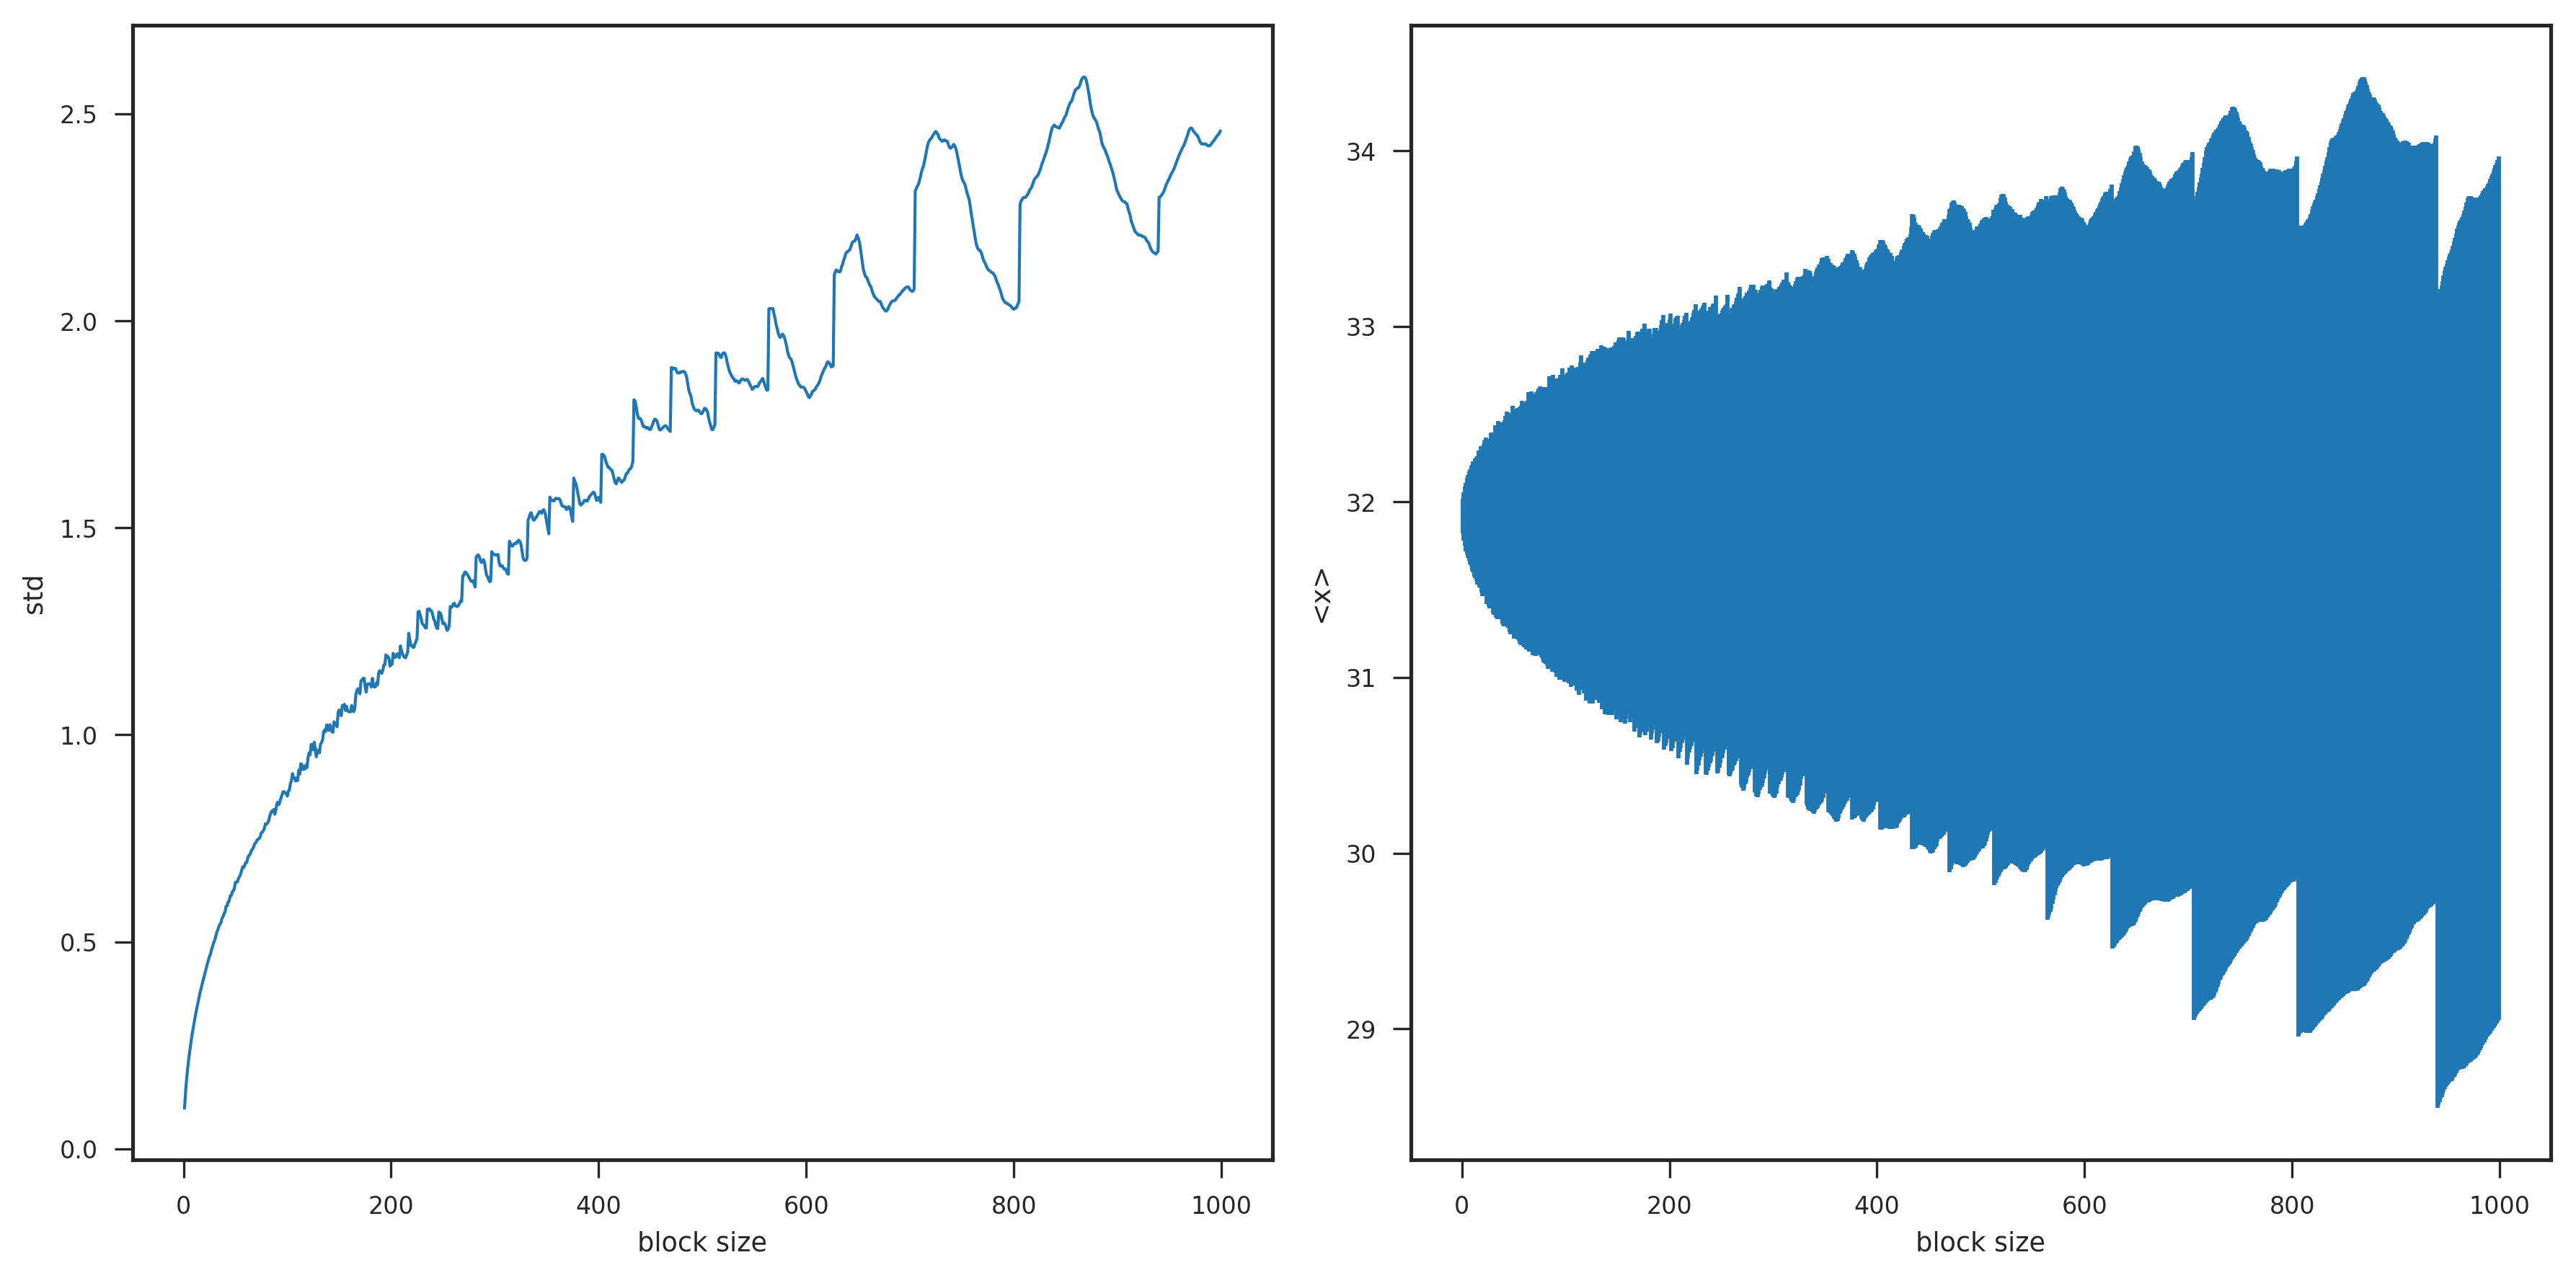

47.4627970476 1.16806191051


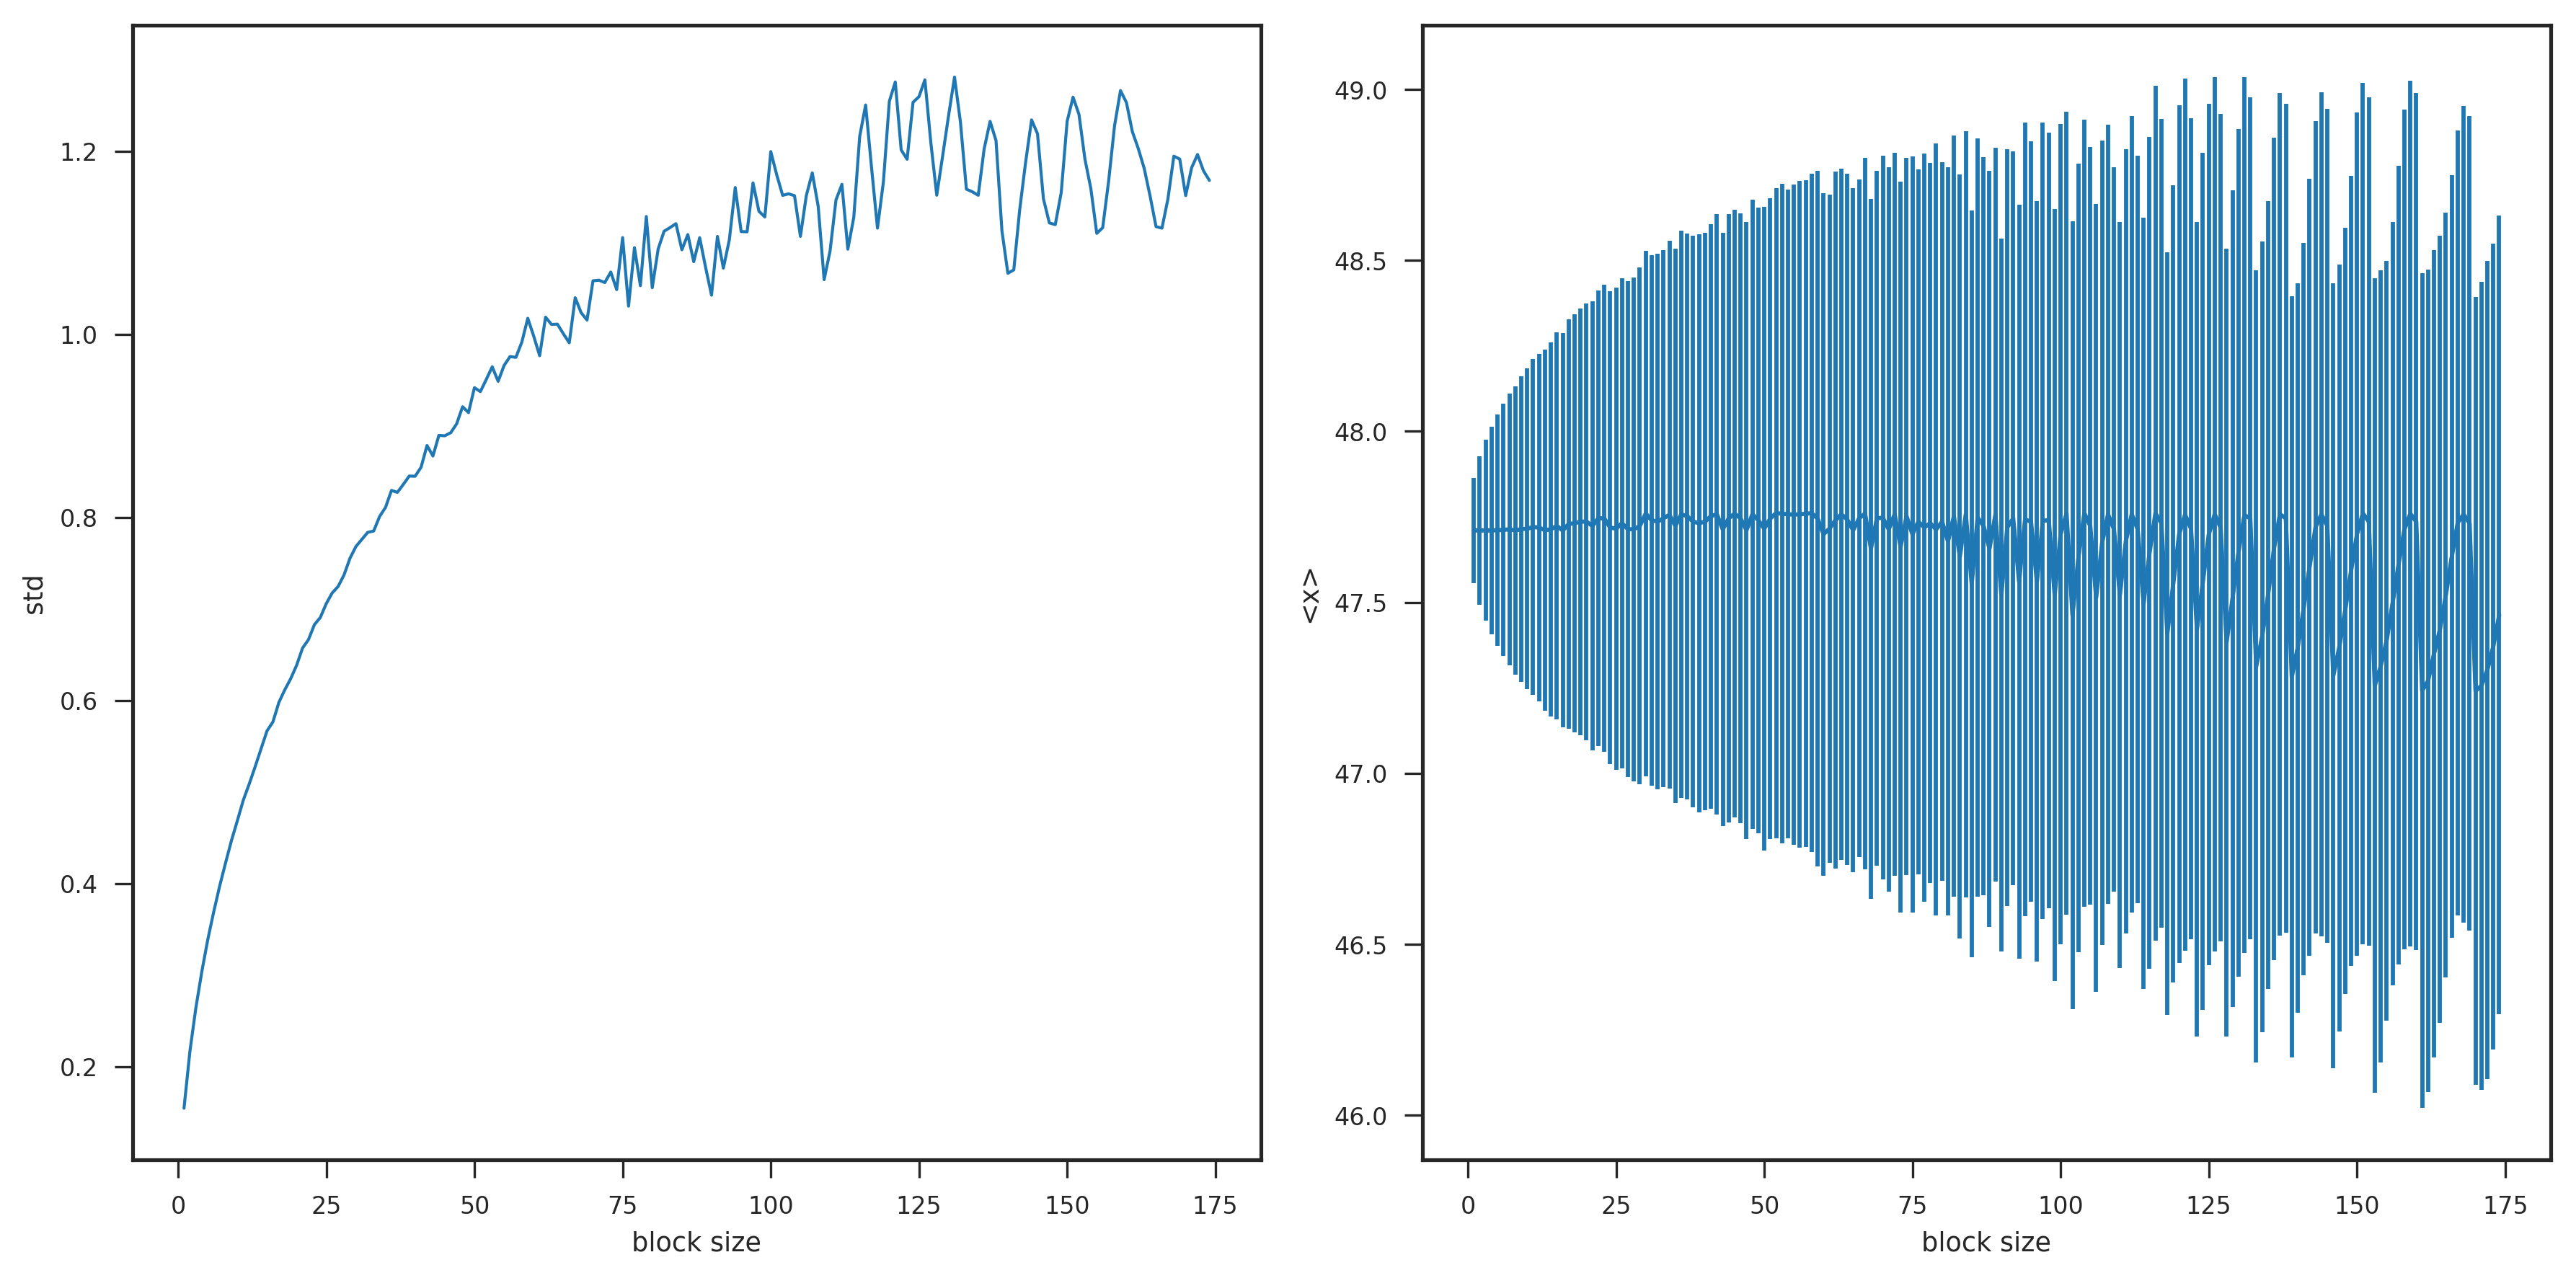

58.8438181972 1.4393969551


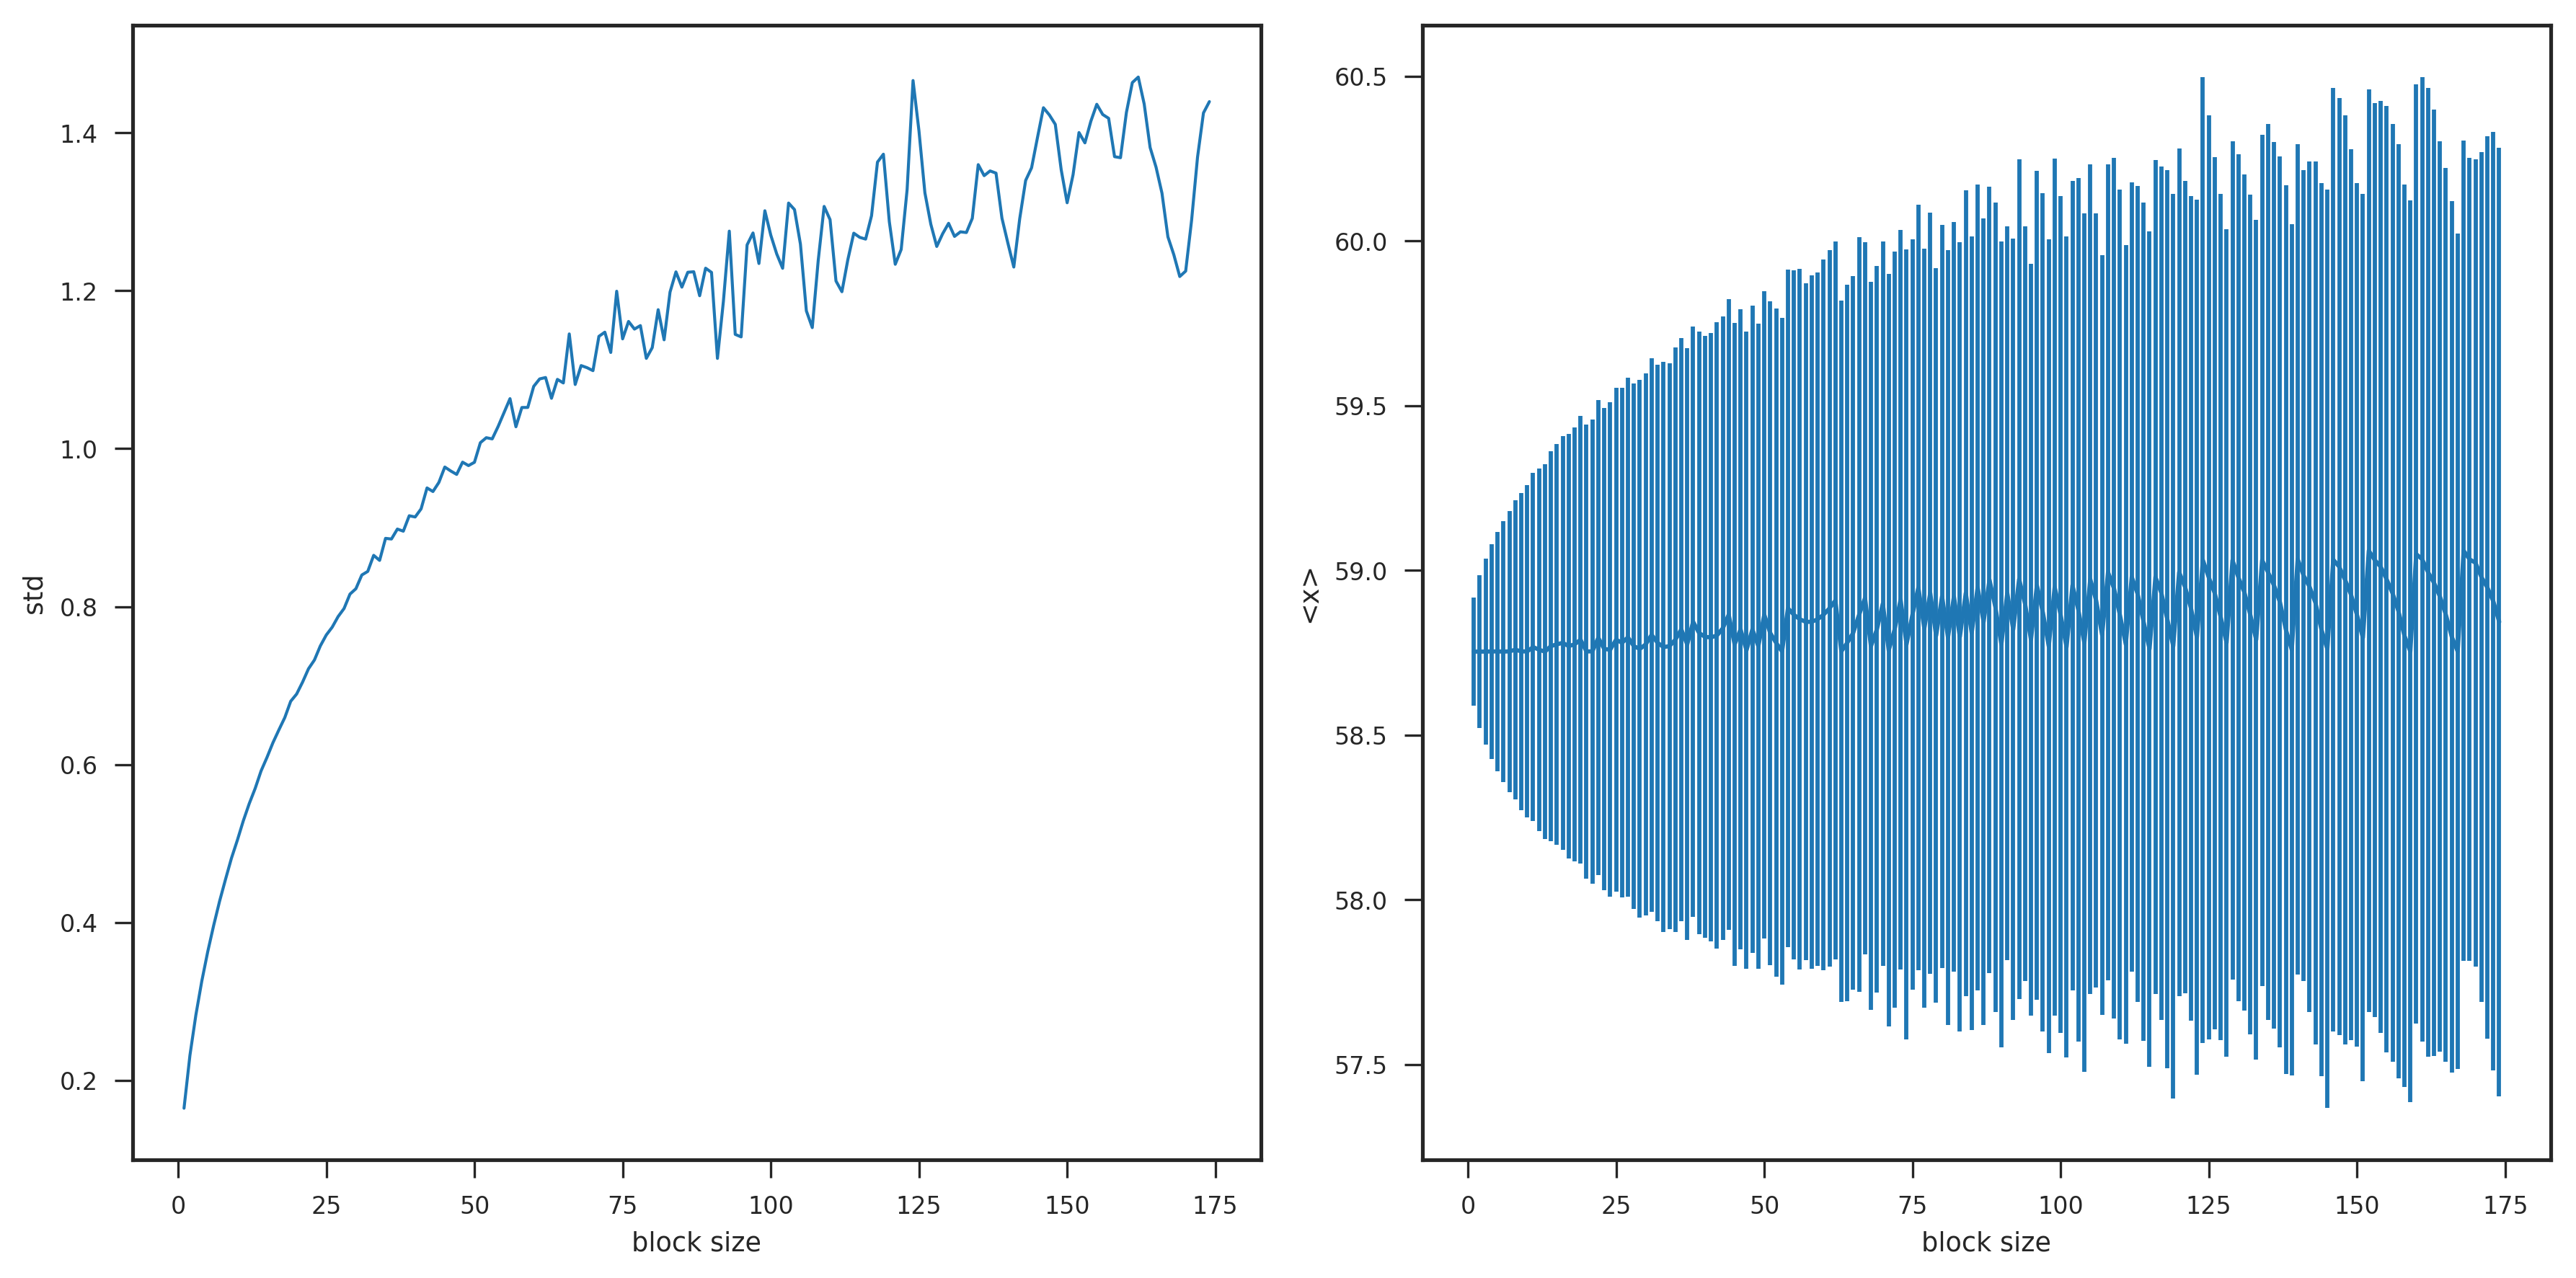

68.2264444638 3.28339668983


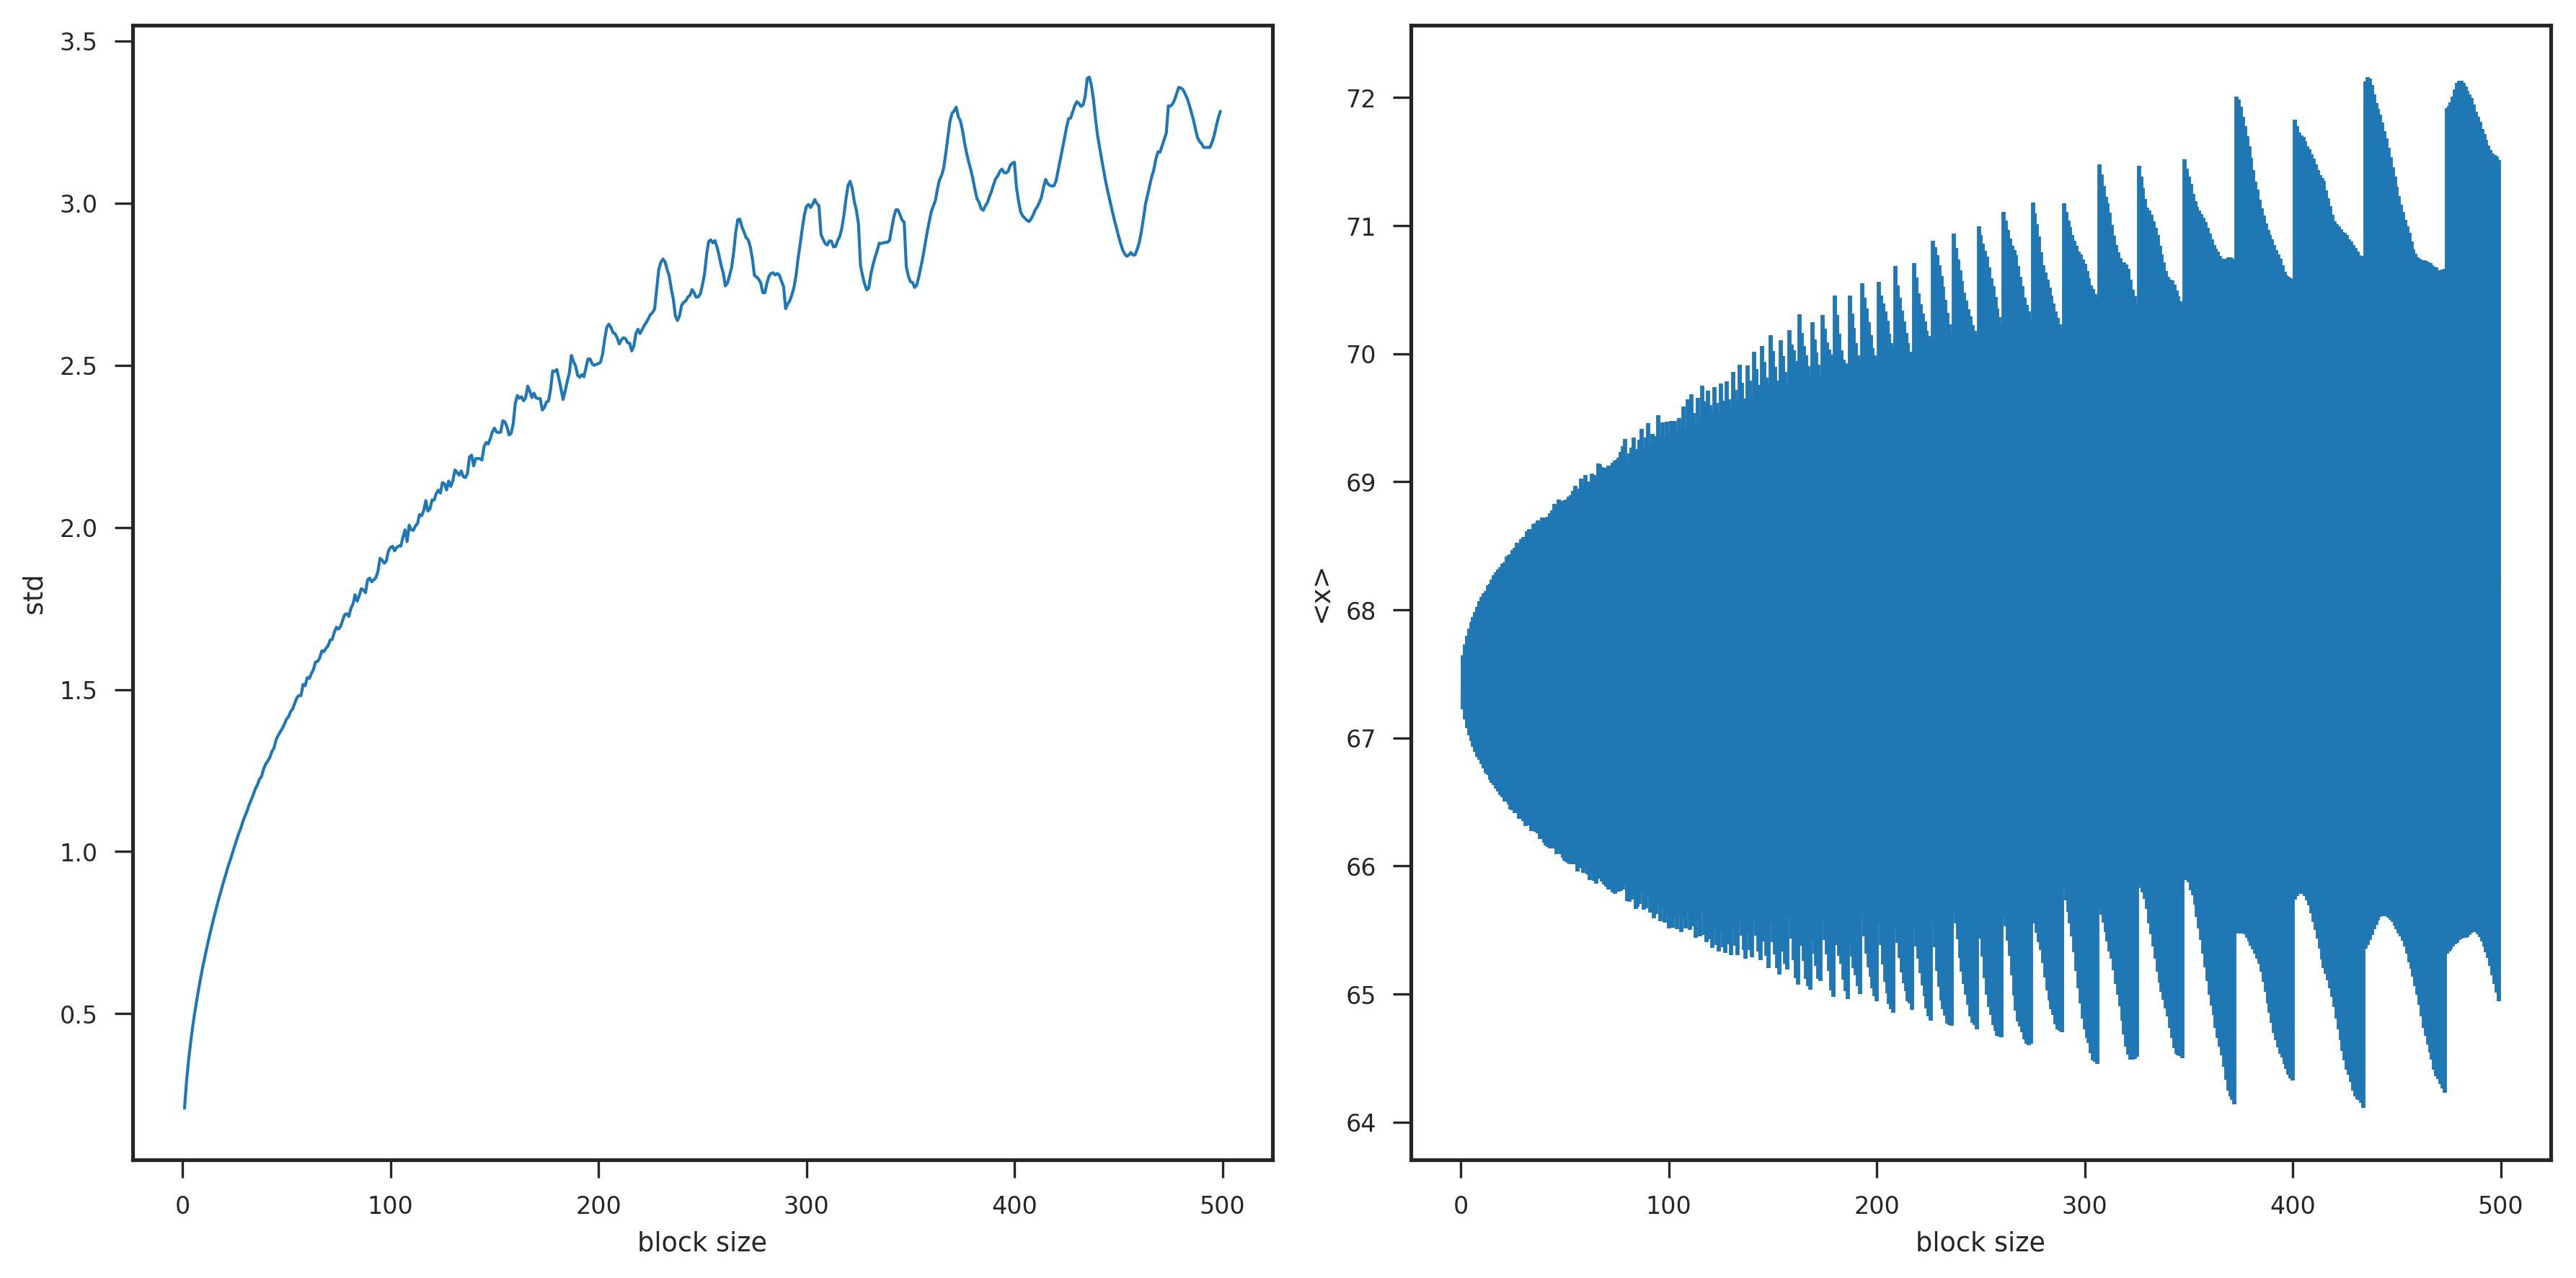

In [53]:
# BA -- UB

def blockAverage(datastream, isplot=True, maxBlockSize=0):
 
	Nobs         = len(datastream)           # total number of observations in datastream
	minBlockSize = 1;                        # min: 1 observation/block
 
	if maxBlockSize == 0:
		maxBlockSize = int(Nobs/4);        # max: 4 blocs (otherwise can't calc variance)
  
	NumBlocks = maxBlockSize - minBlockSize   # total number of block sizes

	blockMean = np.zeros(NumBlocks)               # mean (expect to be "nearly" constant)
	blockVar  = np.zeros(NumBlocks)               # variance associated with each blockSize
	blockCtr  = 0
	
				#
				#  blockSize is # observations/block
				#  run them through all the possibilities
				#
 
	for blockSize in range(minBlockSize, maxBlockSize):

		Nblock    = int(Nobs/blockSize)               # total number of such blocks in datastream
		obsProp   = np.zeros(Nblock)                  # container for parcelling block 
        
		# Loop to chop datastream into blocks
		# and take average
		for i in range(1,Nblock+1):
			
			ibeg = (i-1) * blockSize
			iend =  ibeg + blockSize
			obsProp[i-1] = np.mean(datastream[ibeg:iend])

		blockMean[blockCtr] = np.mean(obsProp)
		blockVar[blockCtr]  = np.var(obsProp)/(Nblock - 1)
		blockCtr += 1
 
	v = np.arange(minBlockSize,maxBlockSize)
	
	if isplot:
    
		plt.figure( figsize = (12,6)) 
		plt.subplot(1,2,1)
		plt.plot(v, np.sqrt(blockVar),'-',lw=1)
		plt.xlabel('block size')
		plt.ylabel('std')

		plt.subplot(1,2,2)
		plt.errorbar(v, blockMean, np.sqrt(blockVar))
		plt.ylabel('<x>')
		plt.xlabel('block size')

		print (blockMean[-1], np.sqrt(blockVar[-1]))
		
		plt.tight_layout()
		plt.show()
		
	#return v, blockVar, blockMean
	return blockMean [-1], np.sqrt(blockVar[-1])
    
#blockAverage(Rg_pws0[:,1] ,maxBlockSize= 1000)

#Rg_avgstd_pws0 = blockAverage(Rg_pws0[:,1] ,maxBlockSize= 500)
Rg_avgstd_pws5 = blockAverage(Rg_ubpws5[:,1] ,maxBlockSize= 1000) 
Rg_avgstd_pws6 = blockAverage(Rg_ubpws6[:,1] ,maxBlockSize= 175) 
#Rg_avgstd_pws7 = blockAverage(Rg_pws7[:,1] ,maxBlockSize= 400) 
Rg_avgstd_pws8 = blockAverage(Rg_ubpws8[:,1] ,maxBlockSize= 175) 
#Rg_avgstd_pws9 = blockAverage(Rg_pws9[:,1] ,maxBlockSize= 1500) 
Rg_avgstd_pws10 = blockAverage(Rg_ubpws10[:,1],maxBlockSize= 500) 

61.9916141623 1.57668074143


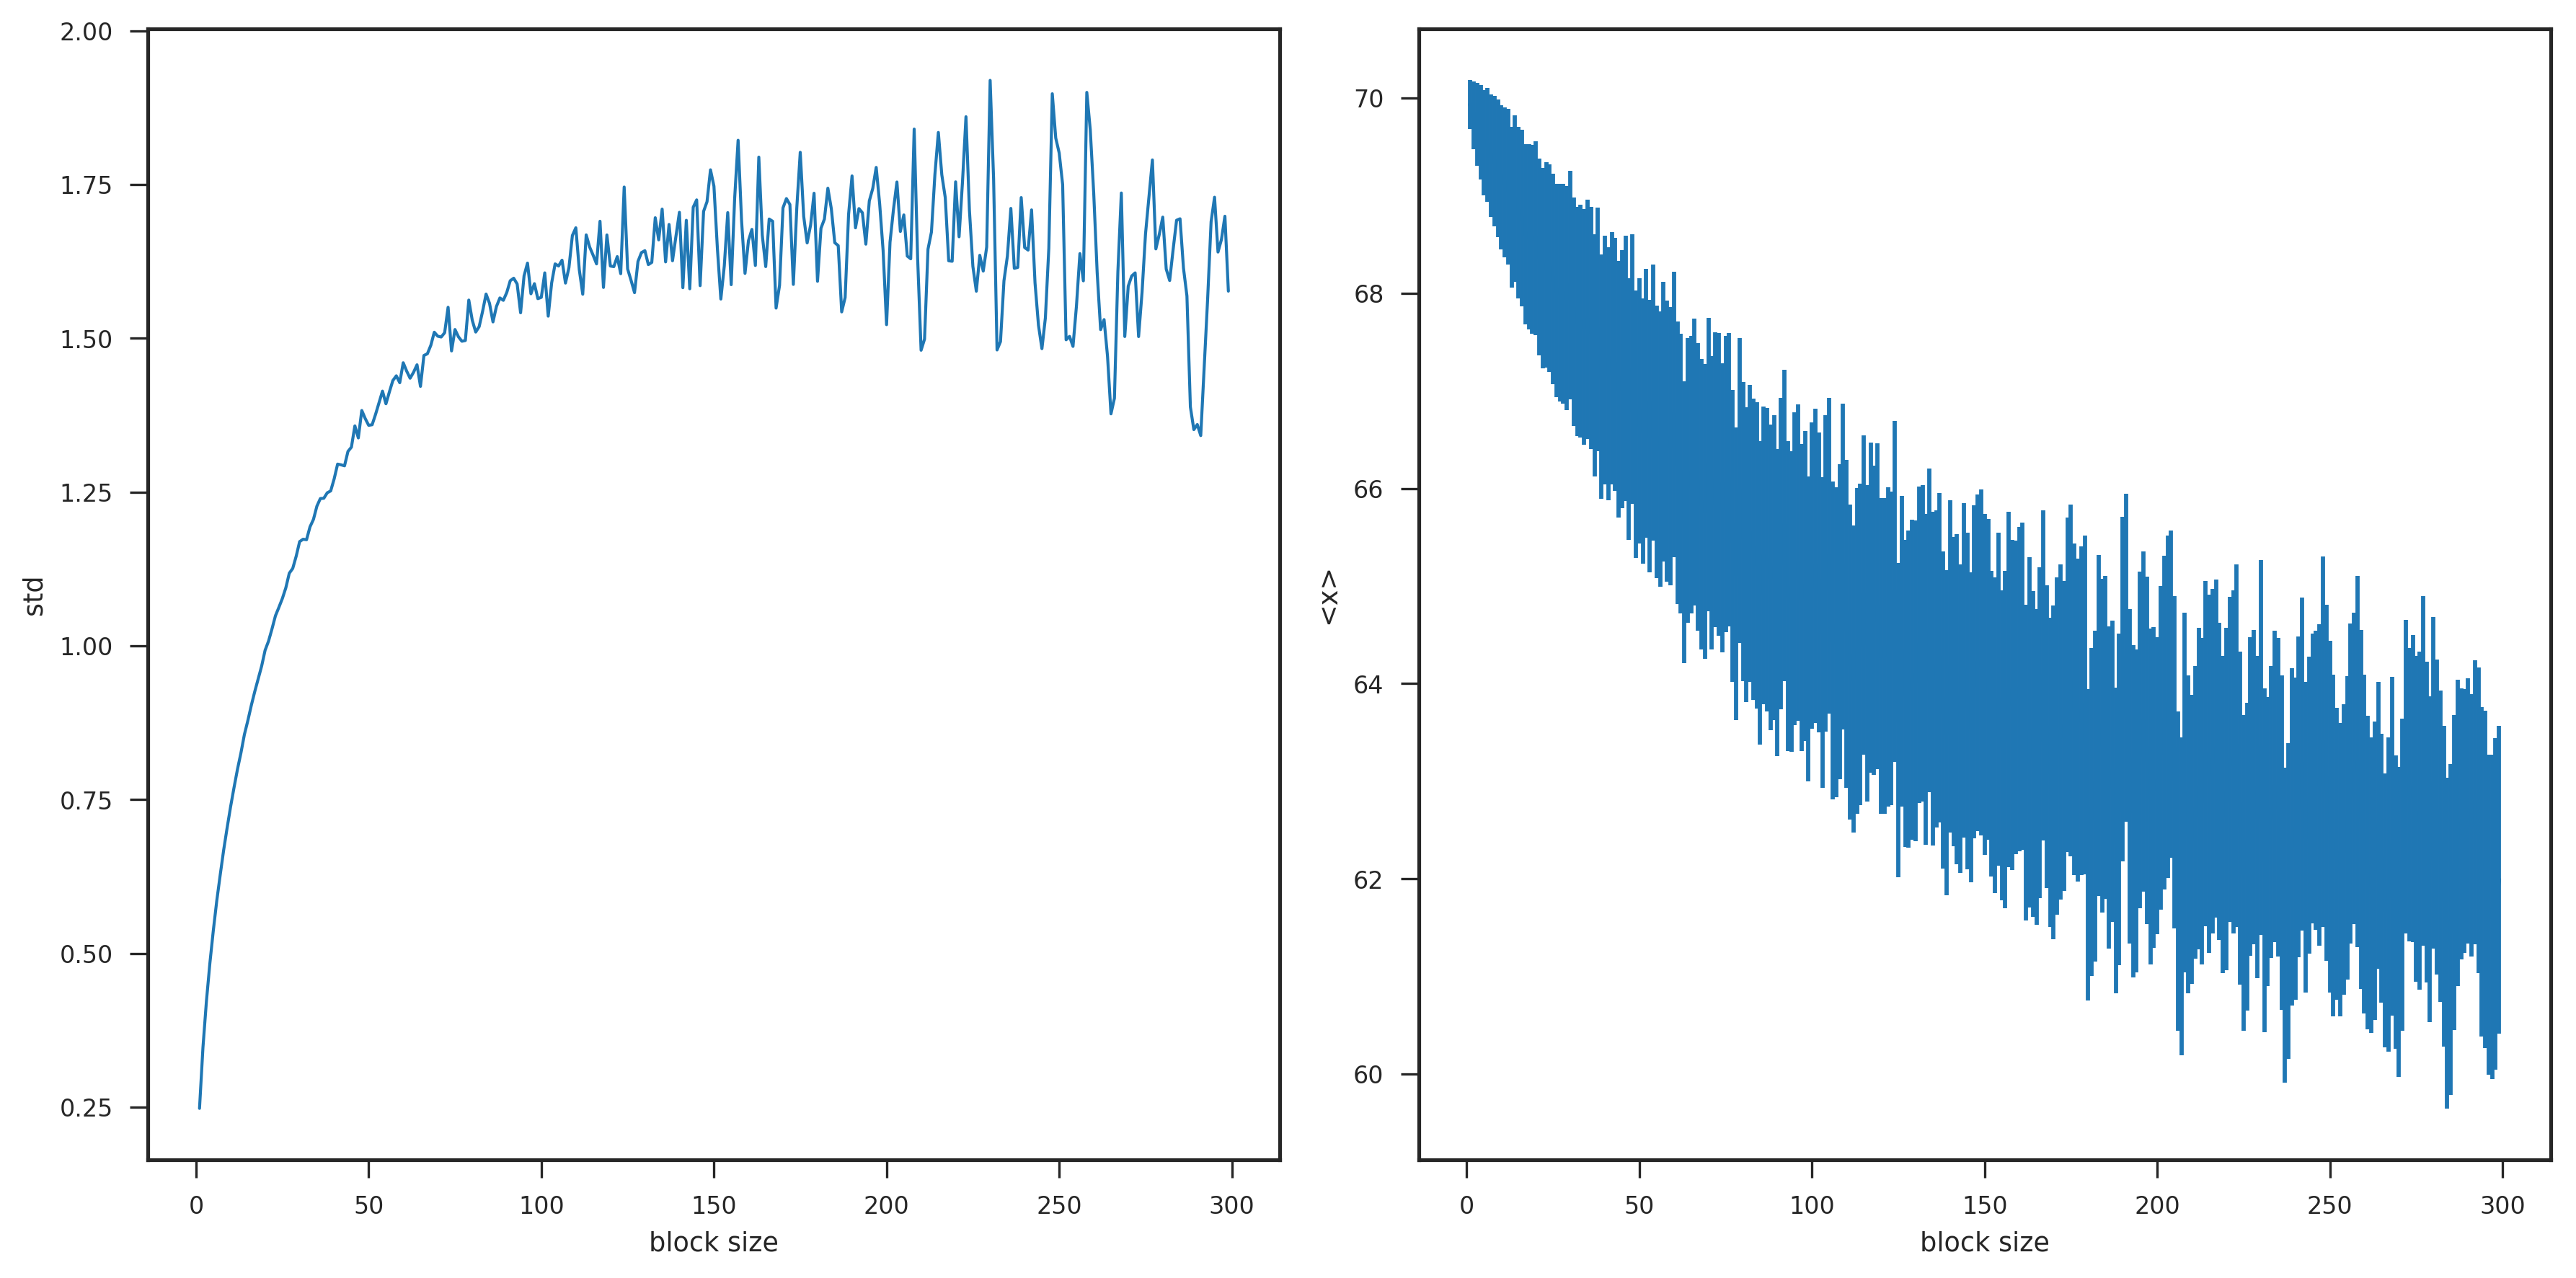

57.1483846501 1.24922443239


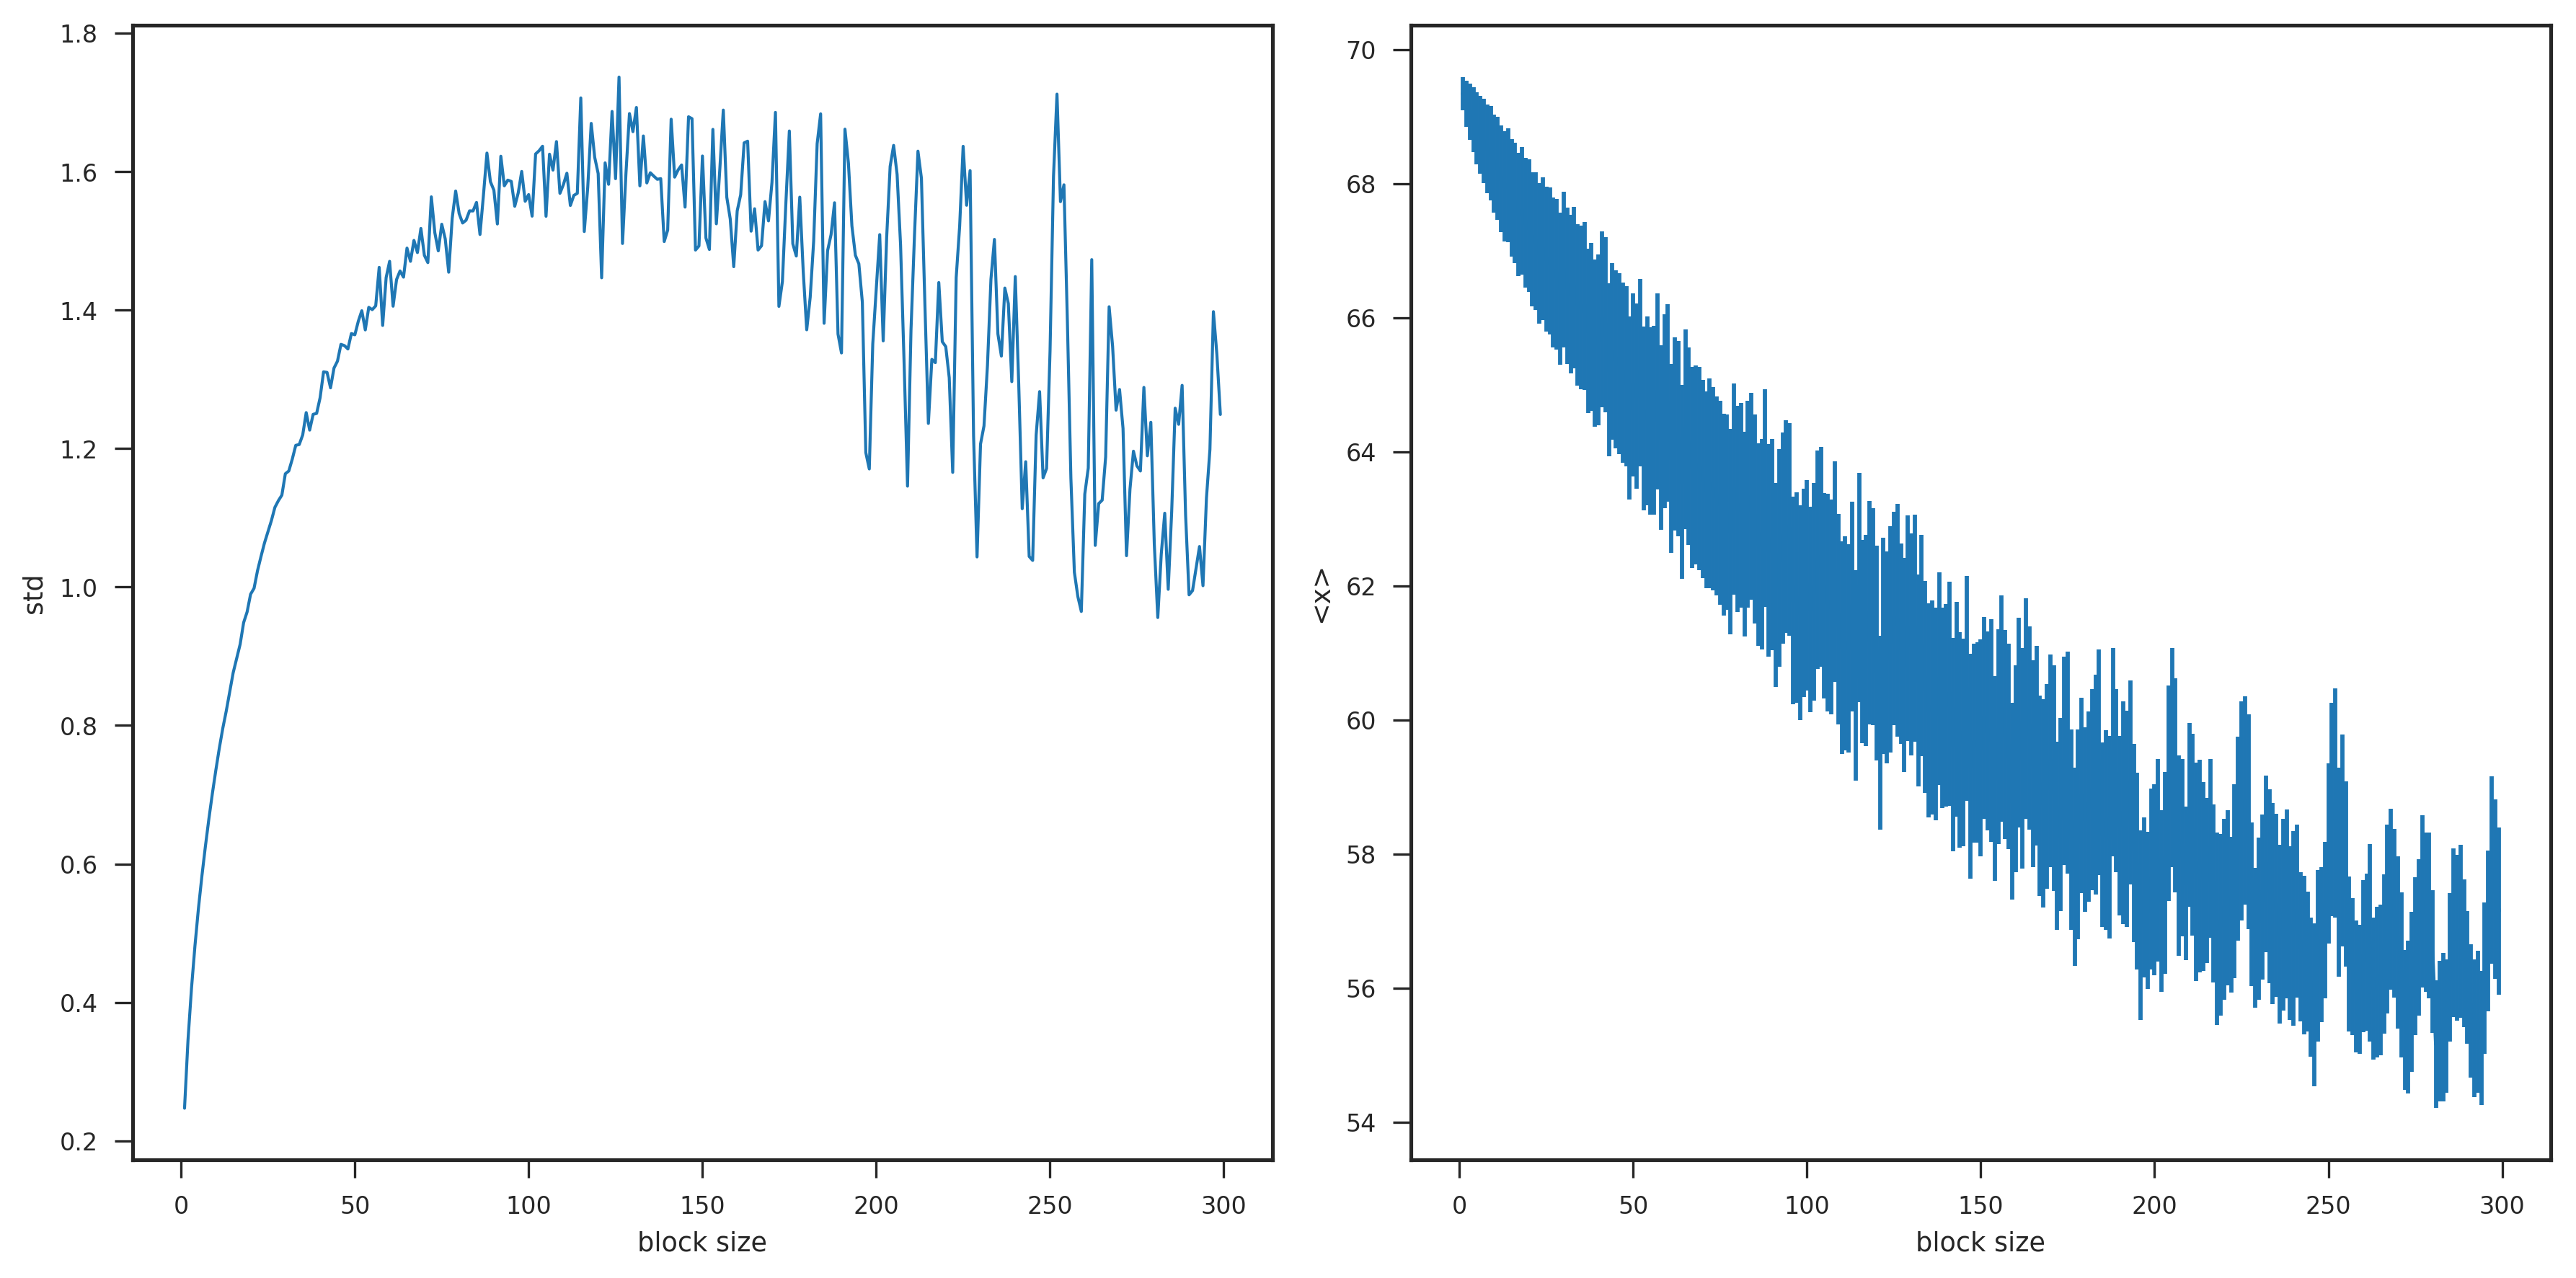

73.8895807711 2.01806420007


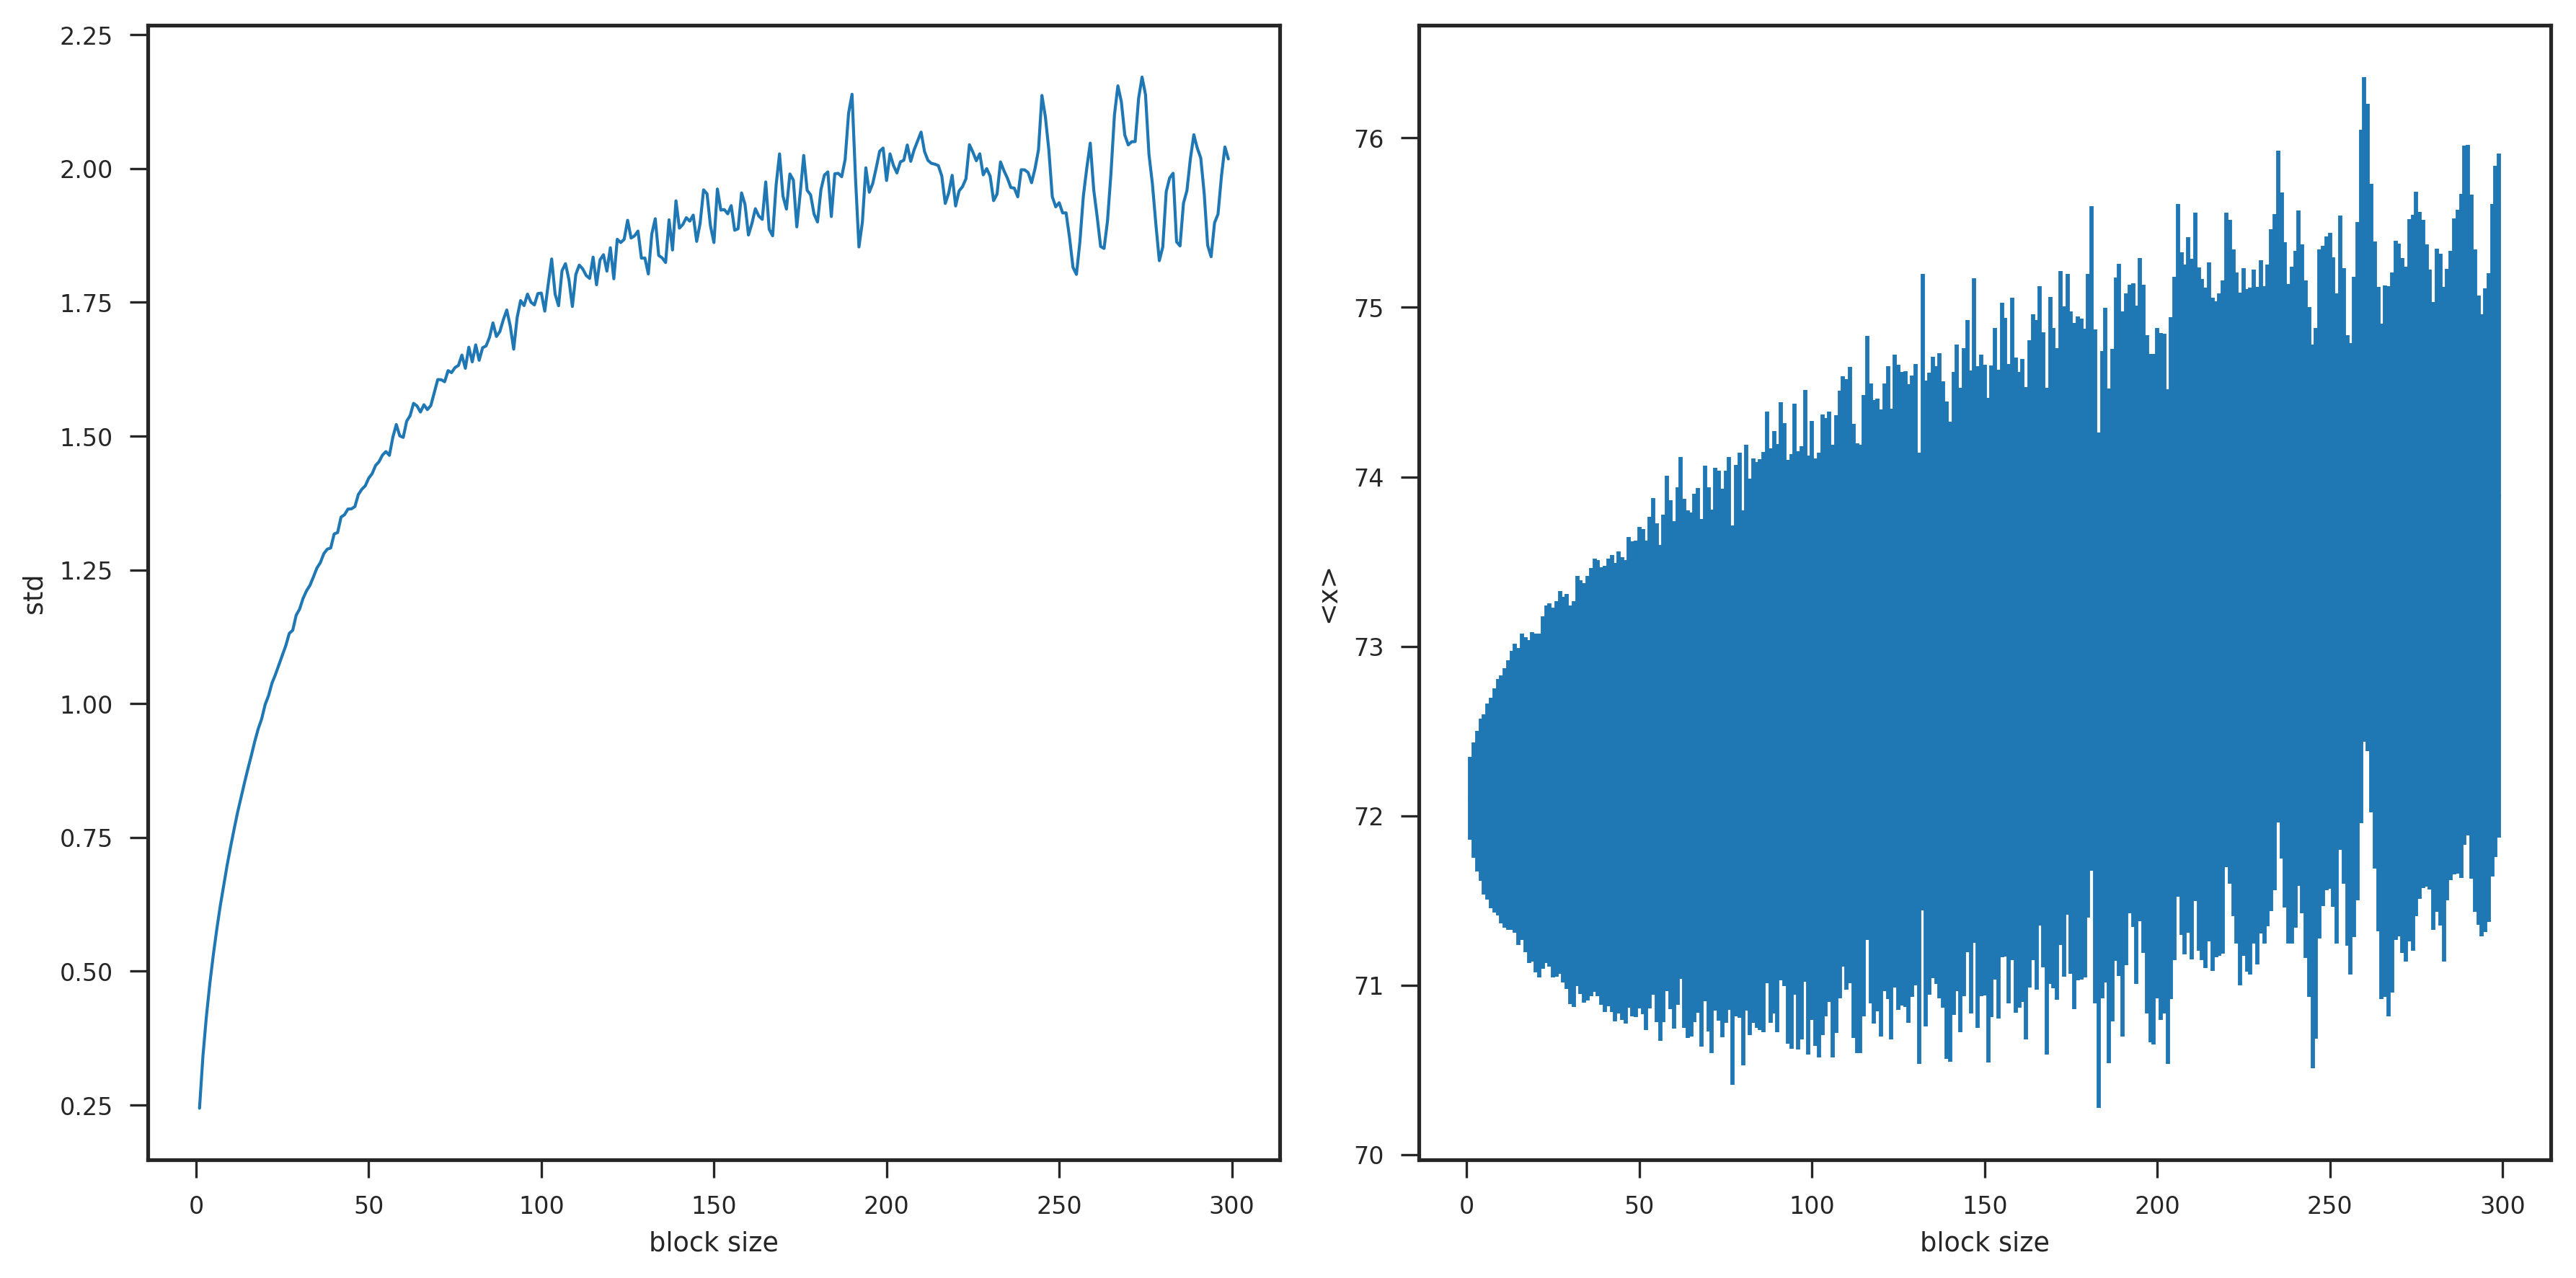

57.4705899211 1.77353594389


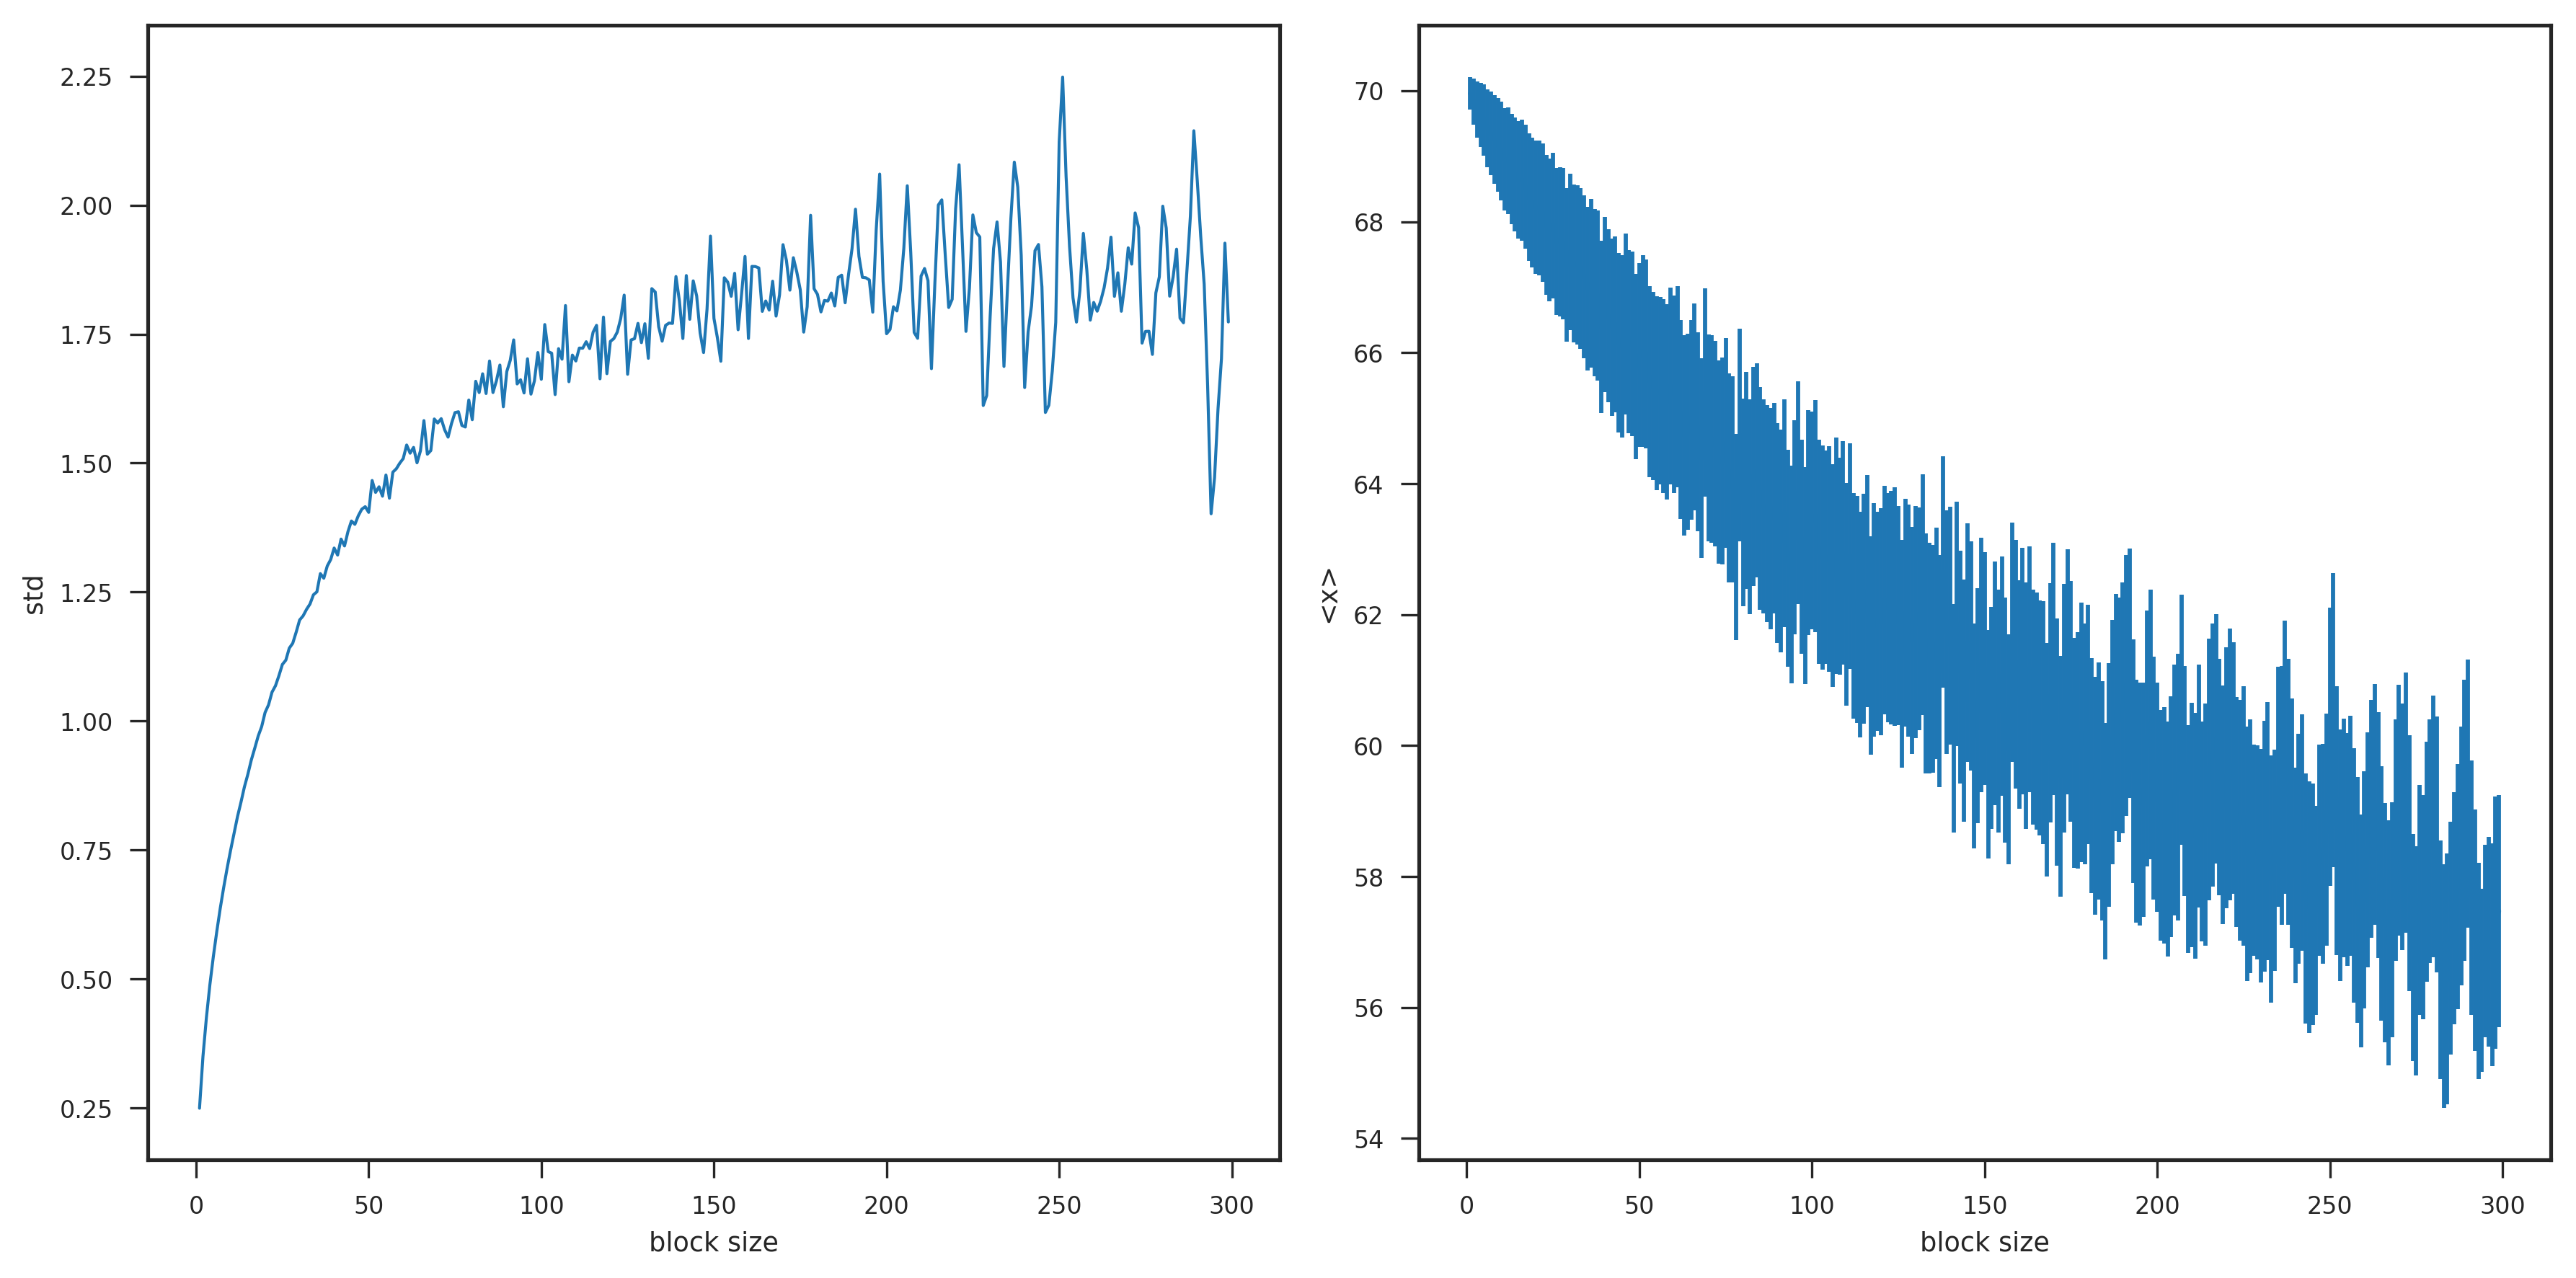

82.2986612902 1.89440304314


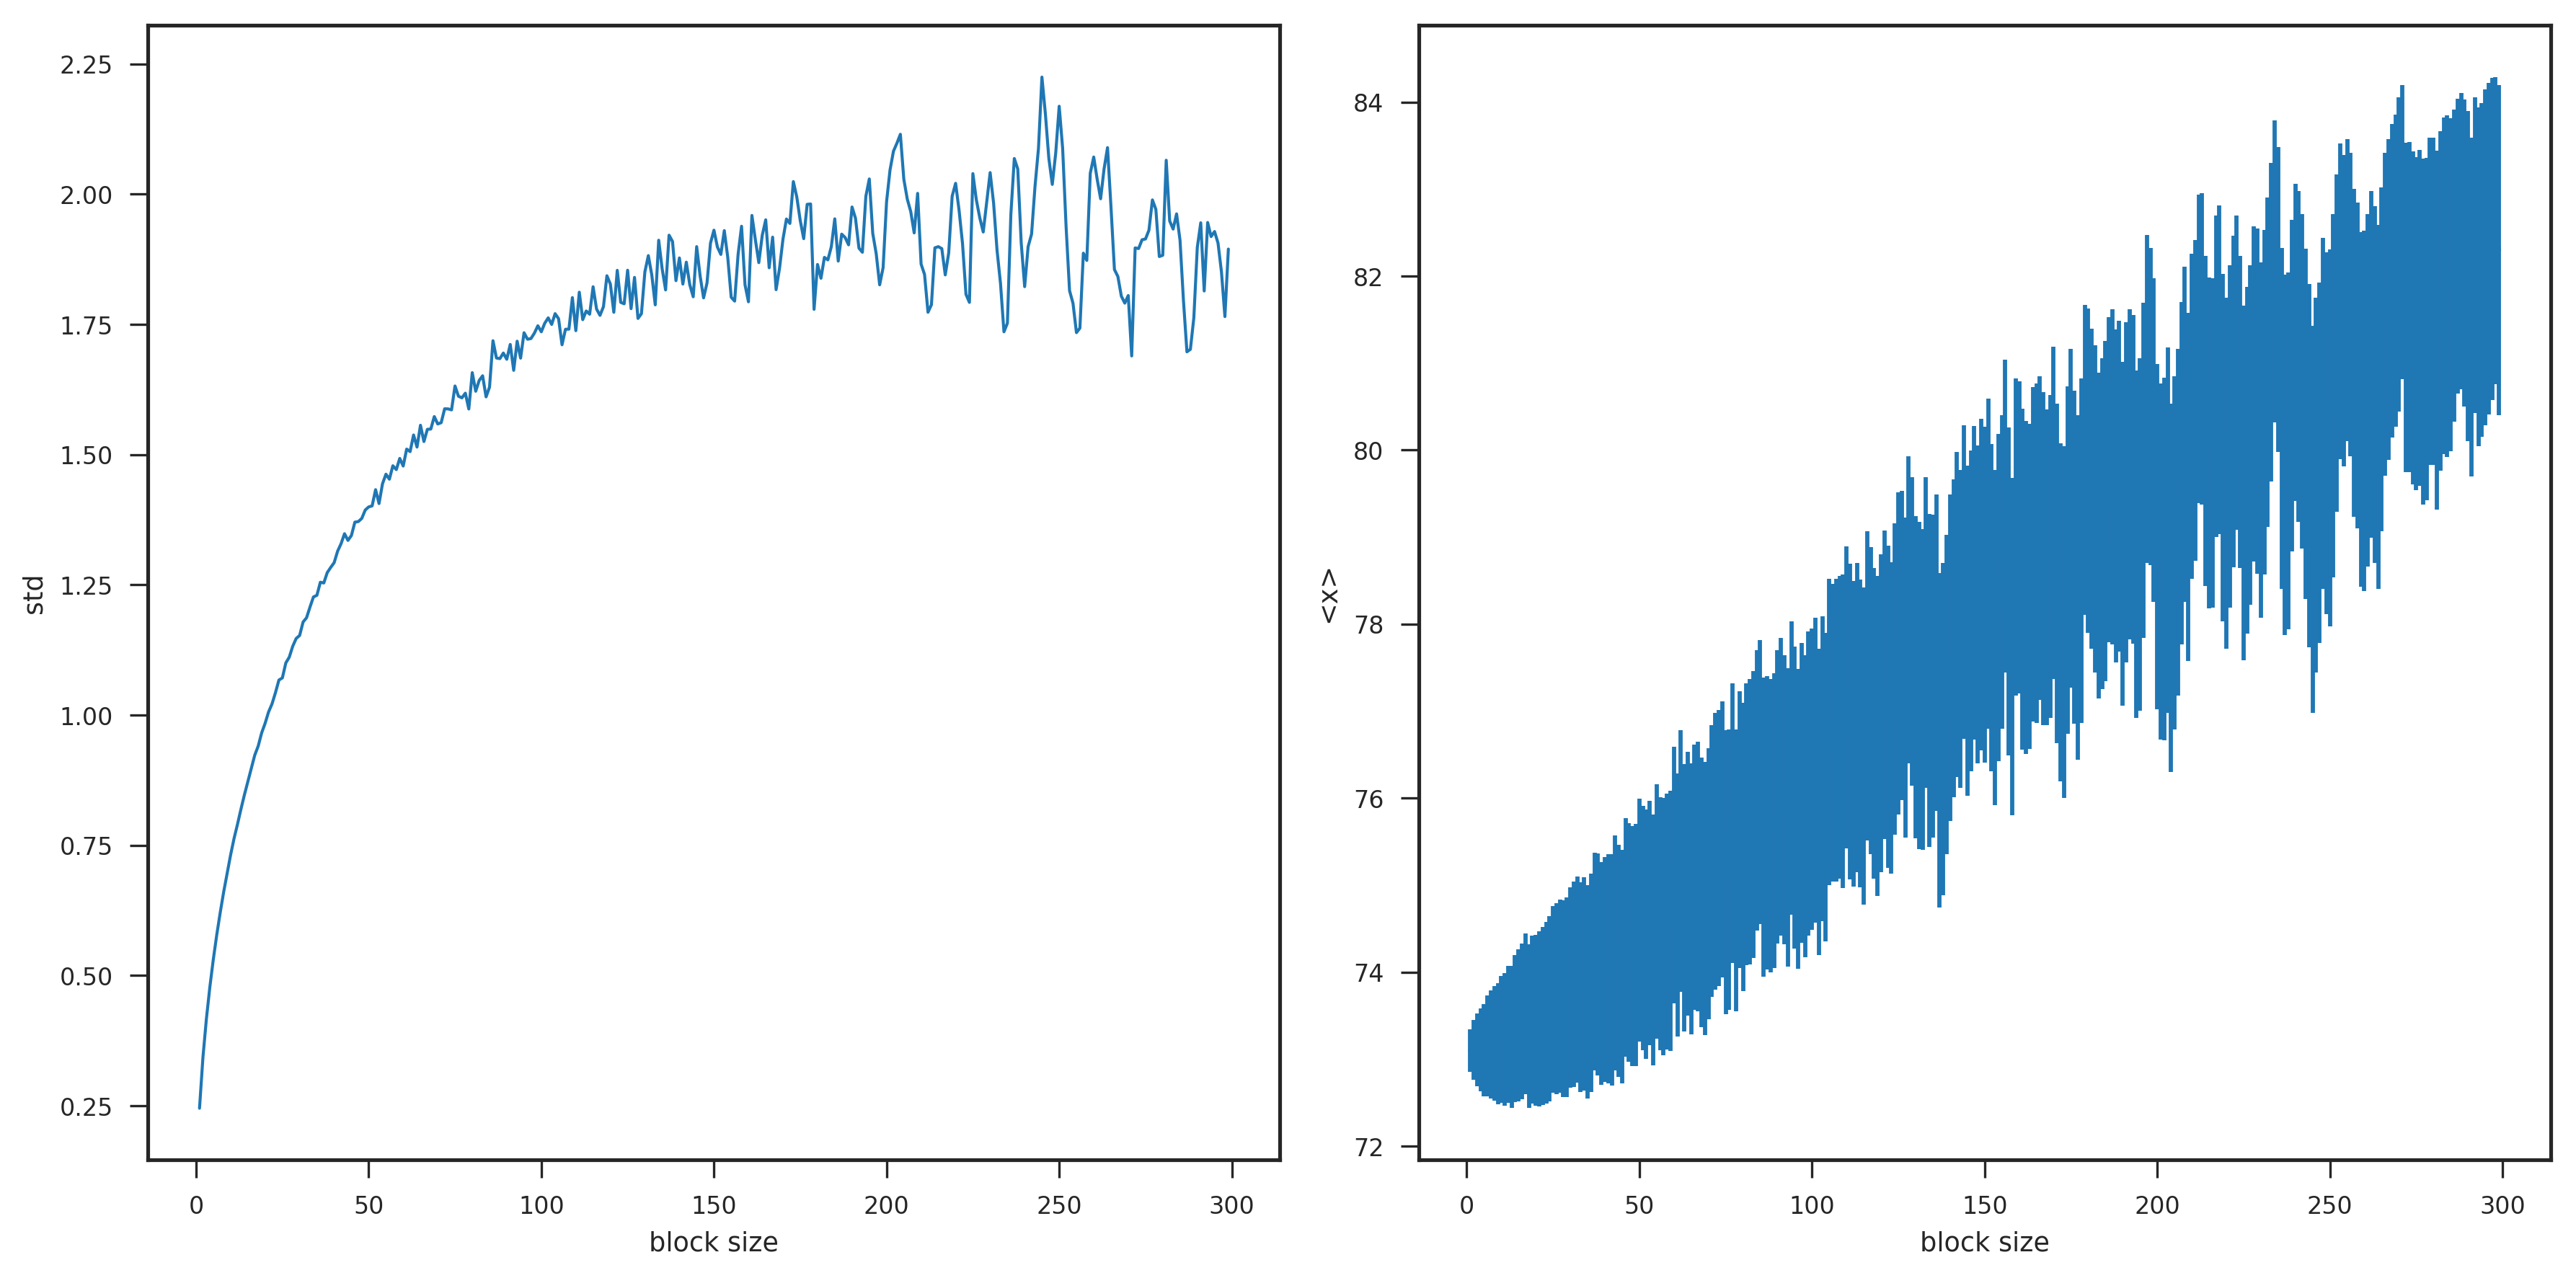

67.9982810147 1.56544779338


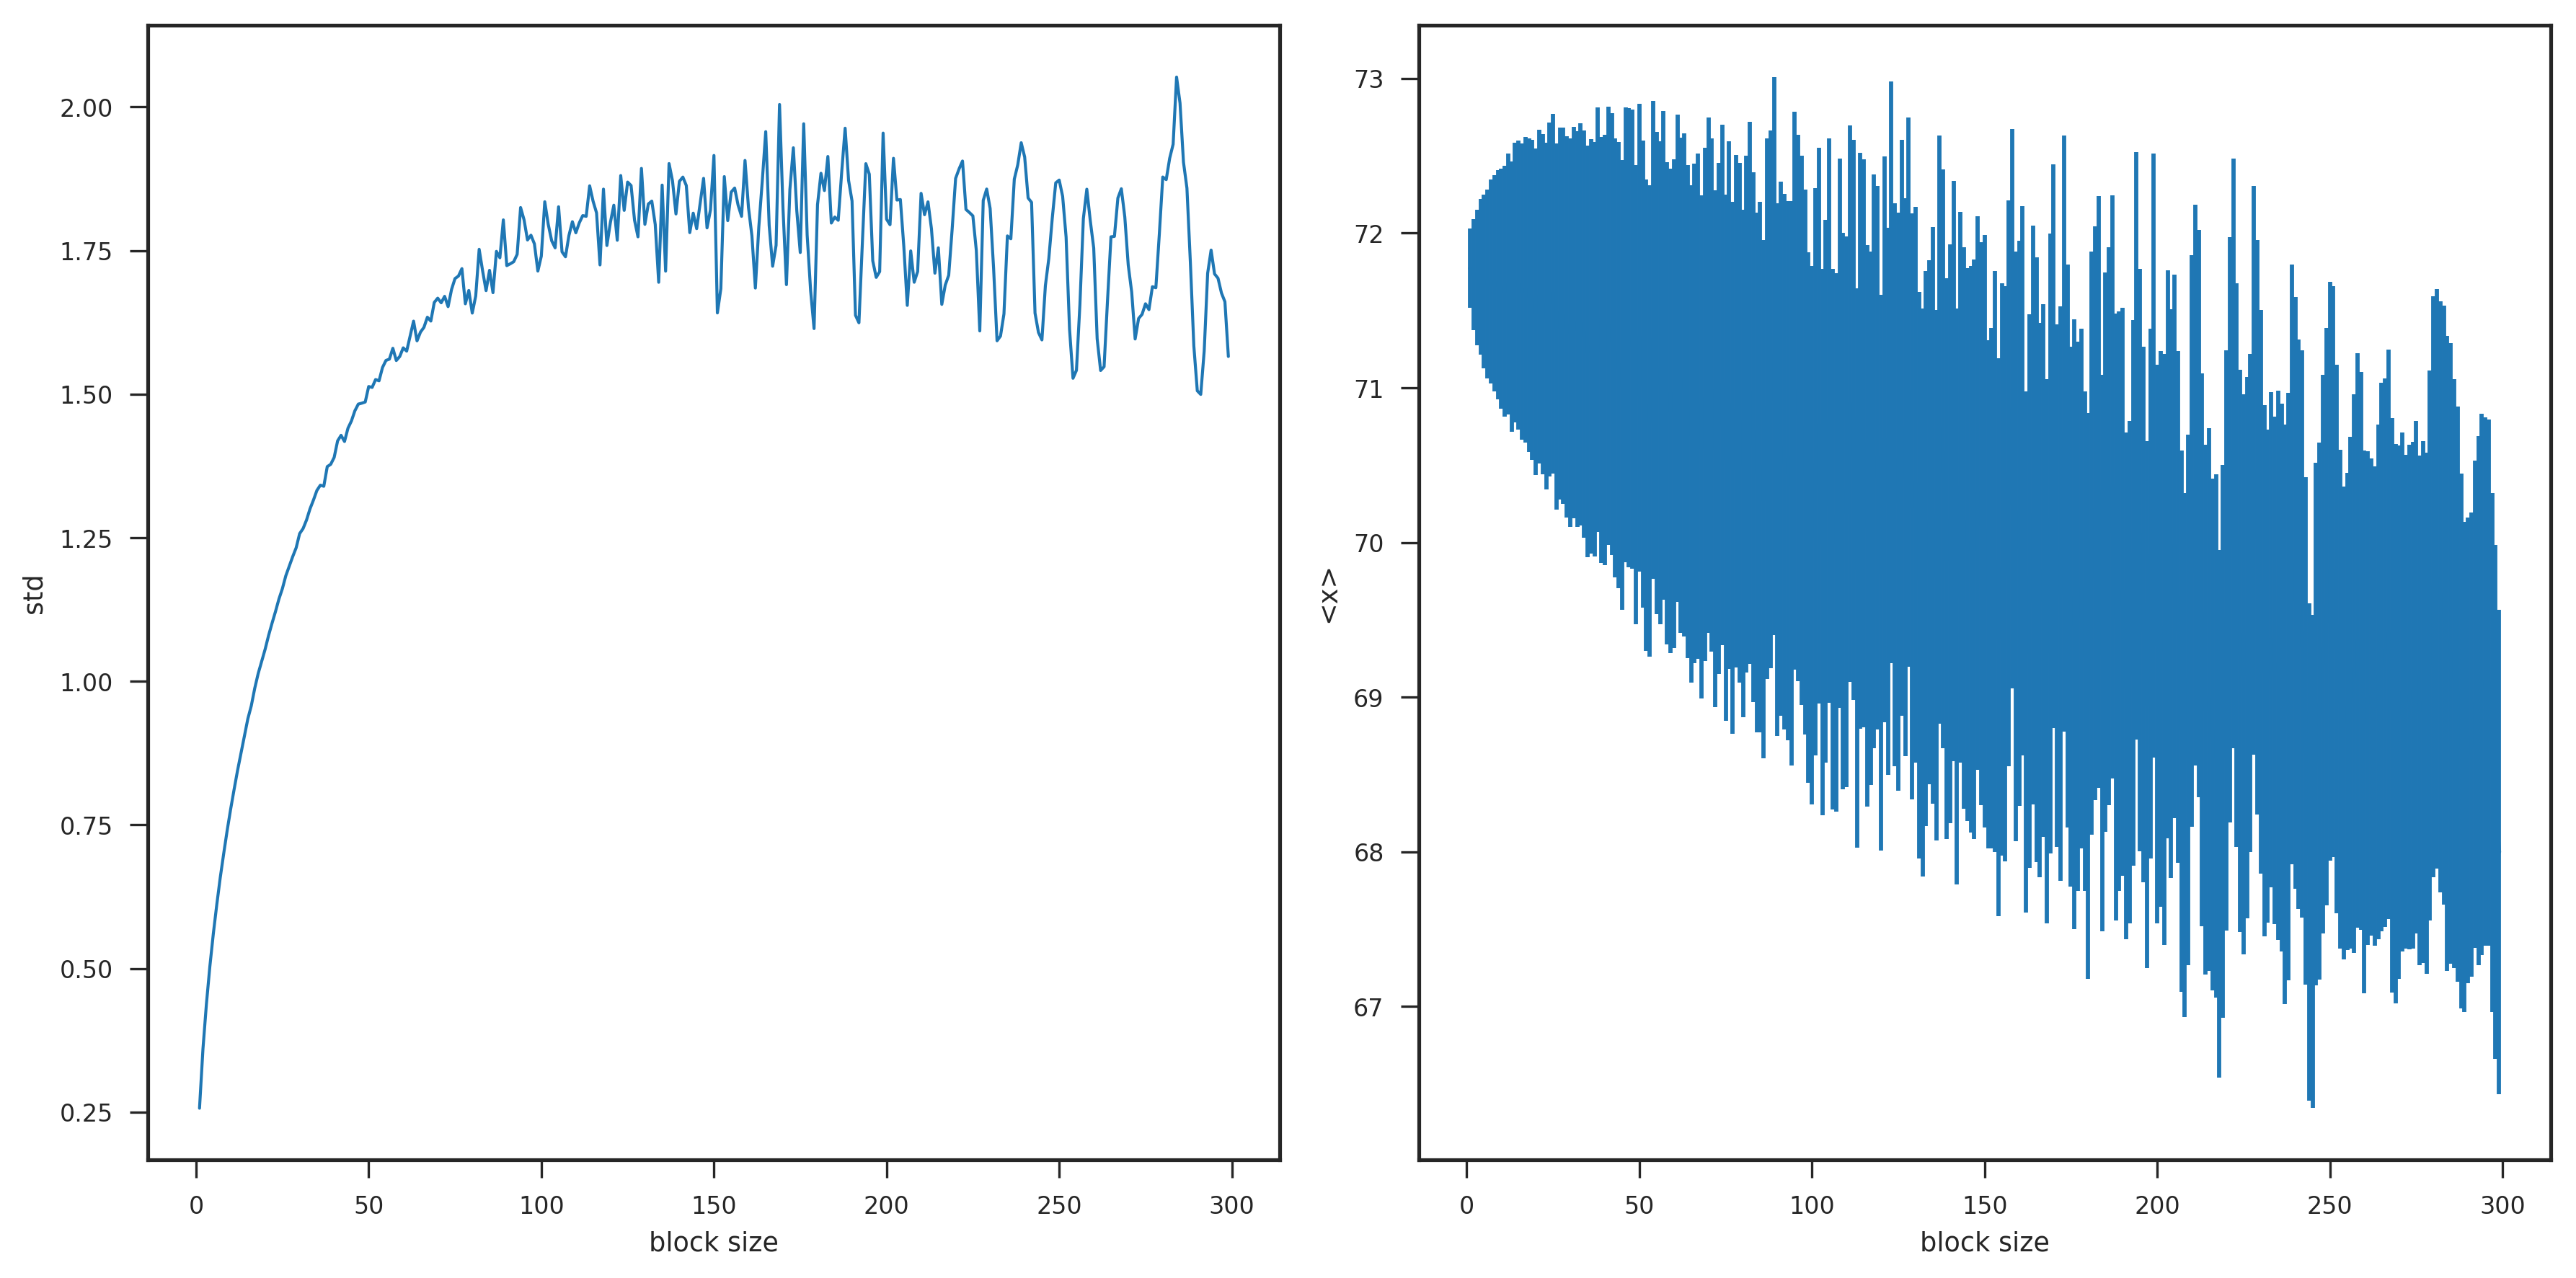

In [54]:
# BA -- RgMetaD

def blockAverage(datastream, weights, isplot=True, maxBlockSize=0):
 
	Nobs         = len(datastream)           # total number of observations in datastream
	minBlockSize = 1;                        # min: 1 observation/block
 
	if maxBlockSize == 0:
		maxBlockSize = int(Nobs/4);        # max: 4 blocs (otherwise can't calc variance)
  
	NumBlocks = maxBlockSize - minBlockSize   # total number of block sizes

	blockMean = np.zeros(NumBlocks)               # mean (expect to be "nearly" constant)
	blockVar  = np.zeros(NumBlocks)               # variance associated with each blockSize
	blockCtr  = 0
	
				#
				#  blockSize is # observations/block
				#  run them through all the possibilities
				#
 
	for blockSize in range(minBlockSize, maxBlockSize):

		Nblock    = int(Nobs/blockSize)               # total number of such blocks in datastream
		obsProp   = np.zeros(Nblock)                  # container for parcelling block 
        
		# Loop to chop datastream into blocks
		# and take average
		for i in range(1,Nblock+1):
			
			ibeg = (i-1) * blockSize
			iend =  ibeg + blockSize
			obsProp[i-1] = np.average(datastream[ibeg:iend], weights=weights[ibeg:iend])
			#obsProp[i-1] = np.average(datastream[ibeg:iend])        
        
		blockMean[blockCtr] = np.average(obsProp)
		#blockVar[blockCtr]  = np.average((obsProp-blockMean[blockCtr])**2, )/(Nblock - 1)
		blockVar[blockCtr]  = np.var(obsProp)/(Nblock - 1)
		blockCtr += 1
 
	v = np.arange(minBlockSize,maxBlockSize)
	
	if isplot:
    
		plt.figure( figsize = (12,6)) 
		plt.subplot(1,2,1)
		plt.plot(v, np.sqrt(blockVar),'-',lw=1)
		plt.xlabel('block size')
		plt.ylabel('std')

		plt.subplot(1,2,2)
		plt.errorbar(v, blockMean, np.sqrt(blockVar))
		#plt.errorbar(v, blockMean,)
		plt.ylabel('<x>')
		plt.xlabel('block size')

		print (blockMean[-1], np.sqrt(blockVar[-1]))
		#print (blockMean[-1])
		plt.tight_layout()
		plt.show()
		
	#return v, blockVar, blockMean
	return blockMean [-1], np.sqrt(blockVar[-1])
    
Rg_avgstd_bpws10 = blockAverage((Rg_mdpws10), W_mdpws10[:,1],maxBlockSize= 300)
Rg_avgstd_bpws11 = blockAverage((Rg_mdpws11), W_mdpws11[:,1],maxBlockSize= 300)
Rg_avgstd_bpws12 = blockAverage((Rg_mdpws12), W_mdpws12[:,1],maxBlockSize= 300)
Rg_avgstd_bpws13 = blockAverage((Rg_mdpws13[:,1]), W_mdpws13[:,1],maxBlockSize= 300)
Rg_avgstd_bpws14 = blockAverage((Rg_mdpws14[:,1]), W_mdpws14[:,1],maxBlockSize= 300)
Rg_avgstd_bpws15 = blockAverage((Rg_mdpws15[:,1]), W_mdpws15[:,1],maxBlockSize= 300)

## Panel B ---  BME and Chi2 analysis

### Pre-processing of the pepsi-SAXS fits for BME (New method -- Aug2020)

In [2]:
import re
import natsort 


## Fits 

#### UB ####

#pws5
fits1=[]
files1 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws5/pepsi_fit2/*.dat')
files1_sorted=natsort.natsorted(files1,reverse=False)

for num1, file1 in enumerate(files1_sorted):

    fits1.append(np.genfromtxt(file1, usecols=3, skip_header=6)) ;# skip_footer=10 
array1=np.array(fits1)
#print (array)
print (array1.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws5_q07.dat',array1, delimiter = ' ',fmt='%s')

#pws6
fits2=[]
files2 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws6/pepsi_fit2/*.dat')
files2_sorted=natsort.natsorted(files2,reverse=False)

for num2, file2 in enumerate(files2_sorted):

    fits2.append(np.genfromtxt(file2, usecols=3, skip_header=6)) ;# skip_footer=10 
array2=np.array(fits2)
#print (array)
print (array2.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws6_q07.dat',array2, delimiter = ' ',fmt='%s')

#pws8
fits3=[]
files3 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws8/pepsi_fit2/*.dat')
files3_sorted=natsort.natsorted(files3,reverse=False)

for num3, file3 in enumerate(files3_sorted):

    fits3.append(np.genfromtxt(file3, usecols=3, skip_header=6)) ;# skip_footer=10 
array3=np.array(fits3)
#print (array)
print (array3.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws8_q07.dat',array3, delimiter = ' ',fmt='%s')

#pws10
fits4=[]
files4 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/pepsi_fit2/*.dat')
files4_sorted=natsort.natsorted(files4,reverse=False)

for num4, file4 in enumerate(files4_sorted):

    fits4.append(np.genfromtxt(file4, usecols=3, skip_header=6)) ;# skip_footer=10 
array4=np.array(fits4)
#print (array)
print (array4.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws10_q07.dat',array4, delimiter = ' ',fmt='%s')

##ub-pws10 q 0.7
#pws10
#fitsX=[]
#filesX = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/pepsi_fit2/*.dat')
#filesX_sorted=natsort.natsorted(files4,reverse=False)

#for numX, fileX in enumerate(files4_sorted):

#    fitsX.append(np.genfromtxt(fileX, usecols=3, skip_header=6)) ;# skip_footer=10 
#arrayX=np.array(fitsX)
#print (array)
#print (arrayX.shape)

#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws10_q07.dat',arrayX, delimiter = ' ',fmt='%s')

#### MetaD - Rg ####

#pws10
fits5=[]
files5 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/pws10/bm/pepsi_fit2/*.dat')
files5_sorted=natsort.natsorted(files5,reverse=False)

for num5, file5 in enumerate(files5_sorted):

    fits5.append(np.genfromtxt(file5, usecols=3, skip_header=6)) ;# skip_footer=10 
array5=np.array(fits5)
#print (array)
print (array5.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws10_q07.dat',array5, delimiter = ' ',fmt='%s')

#pws11
fits6=[]
files6 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/pws11/bm/pepsi_fit2/*.dat')
files6_sorted=natsort.natsorted(files6,reverse=False)

for num6, file6 in enumerate(files6_sorted):

    fits6.append(np.genfromtxt(file6, usecols=3, skip_header=6)) ;# skip_footer=10 
array6=np.array(fits6)
#print (array)
print (array6.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws11_q07.dat',array6, delimiter = ' ',fmt='%s')

#pws12
fits7=[]
files7 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/pws12/bm/pepsi_fit2/*.dat')
files7_sorted=natsort.natsorted(files7,reverse=False)

for num7, file7 in enumerate(files7_sorted):

    fits7.append(np.genfromtxt(file7, usecols=3, skip_header=6)) ;# skip_footer=10 
array7=np.array(fits7)
#print (array)
print (array7.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws12_q07.dat',array7, delimiter = ' ',fmt='%s')

#pws13
fits8=[]
files8 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/pws13/pepsi_fit2/*.dat')
files8_sorted=natsort.natsorted(files8,reverse=False)

for num8, file8 in enumerate(files8_sorted):

    fits8.append(np.genfromtxt(file8, usecols=3, skip_header=6)) ;# skip_footer=10 
array8=np.array(fits8)
#print (array)
print (array8.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws13_q07.dat',array8, delimiter = ' ',fmt='%s')

#pws14
fits9=[]
files9 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/pws14/pepsi_fit2/*.dat')
files9_sorted=natsort.natsorted(files9,reverse=False)

for num9, file9 in enumerate(files9_sorted):

    fits9.append(np.genfromtxt(file9, usecols=3, skip_header=6)) ;# skip_footer=10 
array9=np.array(fits9)
#print (array)
print (array9.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws14_q07.dat',array9, delimiter = ' ',fmt='%s')

#pws15
fits10=[]
files10 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/pws15/pepsi_fit2/*.dat')
files10_sorted=natsort.natsorted(files10,reverse=False)

for num10, file10 in enumerate(files10_sorted):

    fits10.append(np.genfromtxt(file10, usecols=3, skip_header=6)) ;# skip_footer=10 
array10=np.array(fits10)
#print (array)
print (array10.shape)

np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws15_q07.dat',array10, delimiter = ' ',fmt='%s')










(5639, 118)
(3057, 118)
(3342, 118)
(5209, 118)
(10115, 118)
(10107, 118)
(10092, 118)
(10091, 118)
(9877, 118)
(9353, 118)


In [26]:
#pws10
#fits4=[]
#files4 = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/pepsi_fit2/*.dat')
#files4_sorted=natsort.natsorted(files4,reverse=False)
#
#for num4, file4 in enumerate(files4_sorted):
#
#    fits4.append(np.genfromtxt(file4, usecols=3, skip_header=6, skip_footer=10 )) ;# skip_footer=10 
#array4=np.array(fits4)
##print (array)
#print (array4.shape)
#
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws10_q05.dat',array4, delimiter = ' ',fmt='%s')
#
###ub-pws10 q 0.7
#
###ub-pws10 q 0.7
##pws10
#fitsX=[]
#filesX = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/pepsi_fit2/*.dat')
#filesX_sorted=natsort.natsorted(filesX,reverse=False)
#
#for numX, fileX in enumerate(files4_sorted):
#
#    fitsX.append(np.genfromtxt(fileX, usecols=3, skip_header=6)) ;# skip_footer=10 
#arrayX=np.array(fitsX)
##print (array)
#print (arrayX.shape)
#
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws10_q07.dat',arrayX, delimiter = ' ',fmt='%s')
#
#
###ub-pws10 q 0.7 and q min as in AB-GRCM
##pws10
#fitsY=[]
#filesY = glob.glob('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/pepsi_fit2/*.dat')
#filesY_sorted=natsort.natsorted(filesY,reverse=False)
#
#for numY, fileY in enumerate(filesY_sorted):
#
#    fitsY.append(np.genfromtxt(fileY, usecols=3, skip_header=17)) ;# skip_footer=10 
#arrayY=np.array(fitsY)
##print (array)
#print (arrayY.shape)
#
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws10_q07_qminABGRCM.dat',arrayY, delimiter = ' ',fmt='%s')




(5209, 108)
(5209, 118)
(5209, 107)


### UB_pws5

# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 2.7678e-02
# Warning: expt average             0.003913=3.9033e-02 is larger than maximum value in simulation 2.7548e-02
# Warning: expt average             0.004188=3.1386e-02 is larger than maximum value in simulation 2.7418e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 2.7287e-02
# Warning: expt average             0.005014=3.6776e-02 is larger than maximum value in simulation 2.7026e-02
# Warning: expt average             0.005289=3.1753e-02 is larger than maximum value in simulation 2.6895e-02
# Warning: expt average             0.005565=3.1278e-02 is larger than maximum value in simulation 2.6764e-02
# Warning: expt average             0.005840=2.7301e-02 is larger than maximum value in simulation 2.6632e-02
# Warning: expt average             0.006115=2.9021e-02 is larger than maximum value in simulation 2.6500e-02
# Warning:

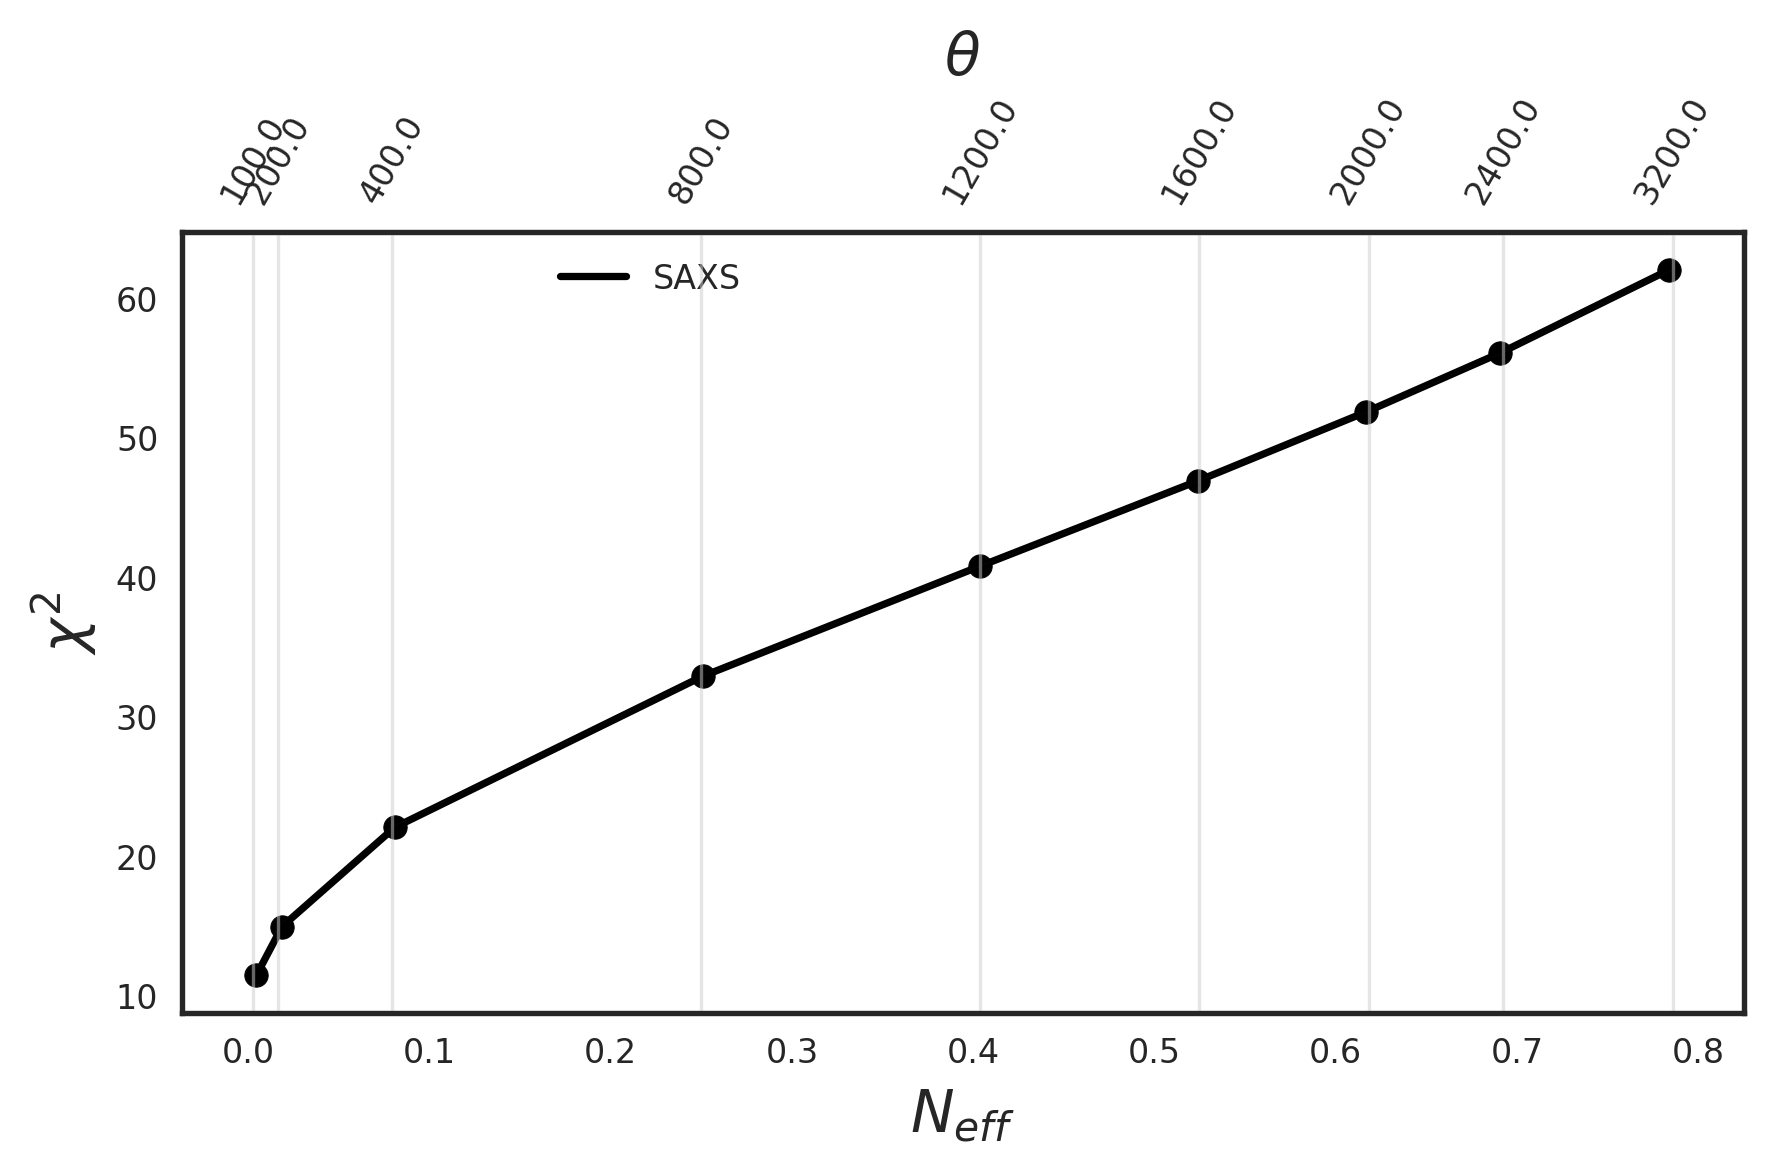

# theta: 800
# CHI2_re before minimization:      91.6411
# CHI2_re after minimization:       32.8794
# Fraction of effective frames:      0.2507


In [4]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws5/BME/ub_pws5_Rg_1ns.dat',usecols=1)
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws5_q07.dat'

### initialize reweighting class


rew = bme.Reweight()
### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [100.,200.,400.,800.,1200.,1600.,2000,2400.,3200]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS 
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [100,200,400,800,1200,1600,2000,2400,3200]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_ub_pws5_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=800)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

ubpws5_chi2_before = chi2_before
ubpws5_chi2_after = chi2_after


In [6]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=800

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws5q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws5q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()


# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 2.7678e-02
# Warning: expt average             0.003913=3.9033e-02 is larger than maximum value in simulation 2.7548e-02
# Warning: expt average             0.004188=3.1386e-02 is larger than maximum value in simulation 2.7418e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 2.7287e-02
# Warning: expt average             0.005014=3.6776e-02 is larger than maximum value in simulation 2.7026e-02
# Warning: expt average             0.005289=3.1753e-02 is larger than maximum value in simulation 2.6895e-02
# Warning: expt average             0.005565=3.1278e-02 is larger than maximum value in simulation 2.6764e-02
# Warning: expt average             0.005840=2.7301e-02 is larger than maximum value in simulation 2.6632e-02
# Warning: expt average             0.006115=2.9021e-02 is larger than maximum value in simulation 2.6500e-02
# Warning:

/home/raul/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/raul/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


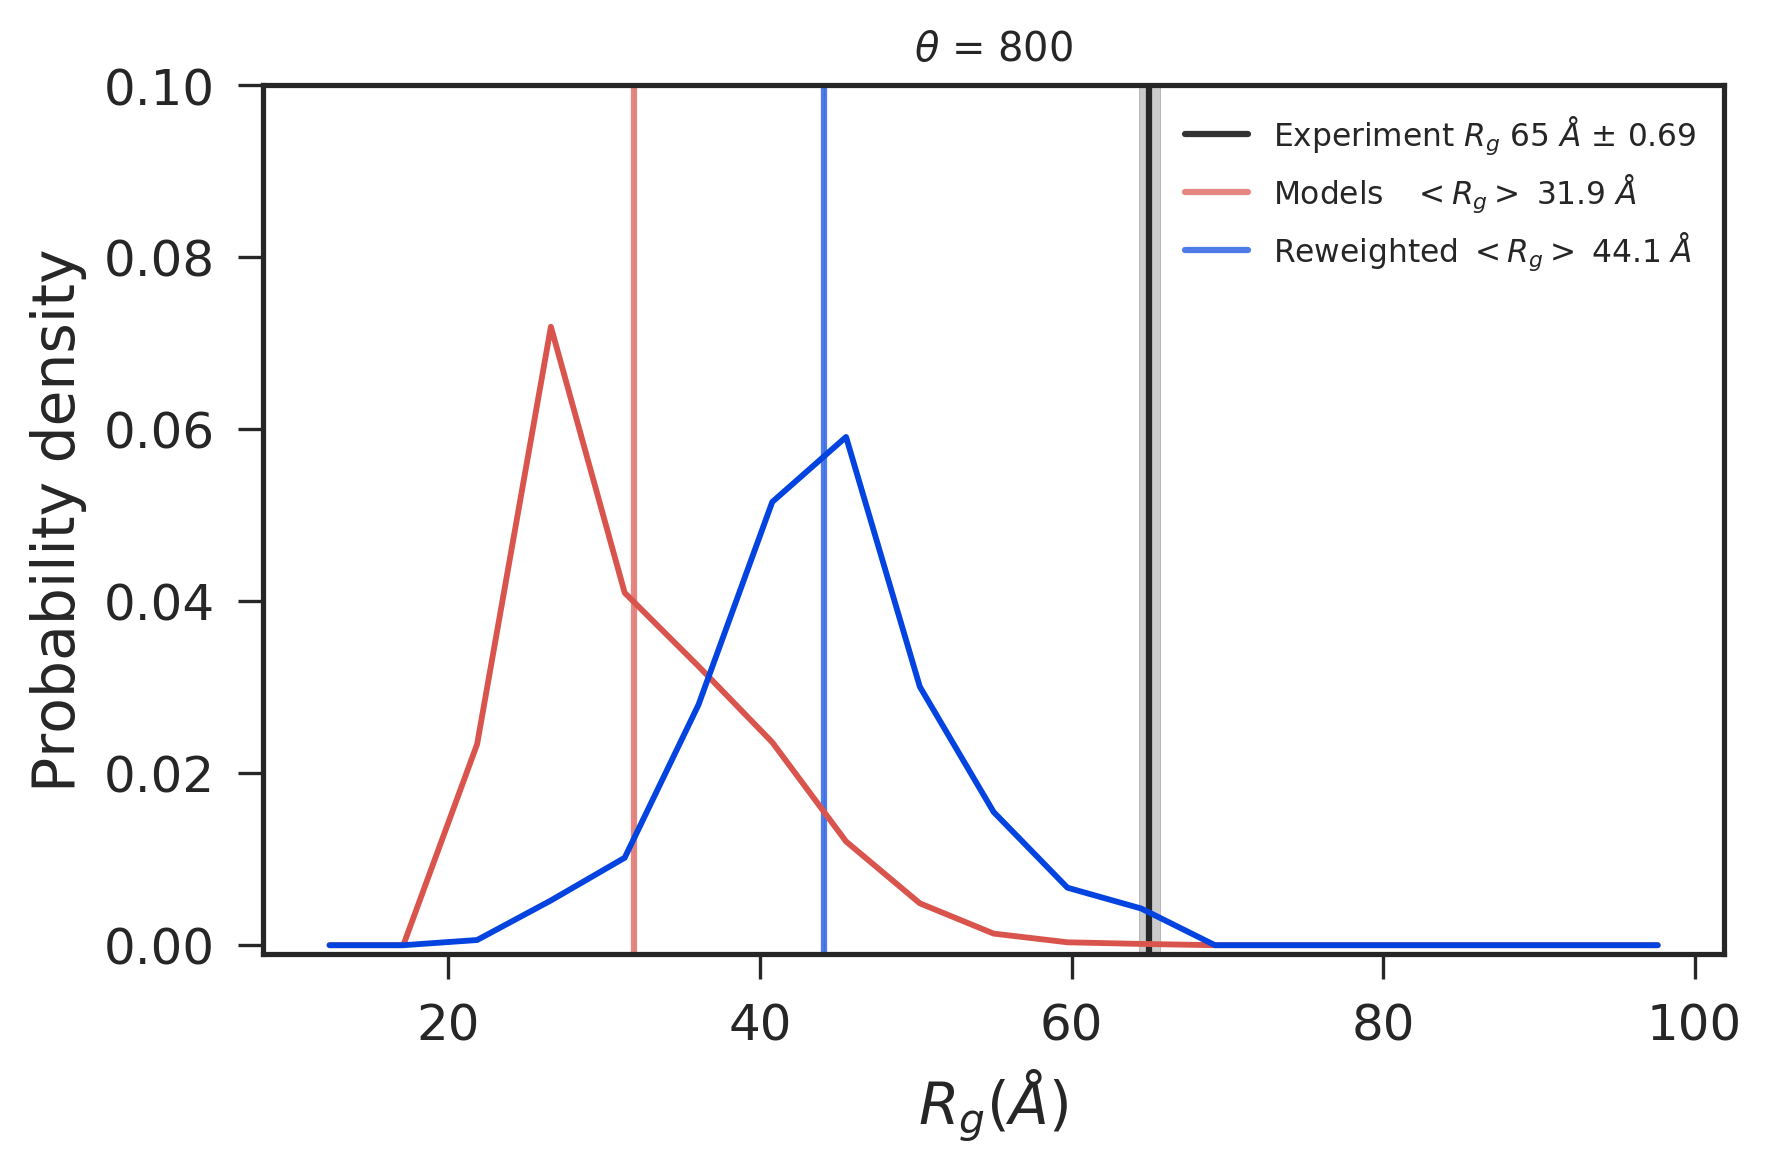

In [7]:
## Rg histograms

## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,100,20)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws5q07_{}_weights.dat'.format(j), usecols=1)
    Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
    
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65.0+0.69, alpha=0.2, color=c1)

plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )

ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(-0.001,0.10)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_ub_pws5_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

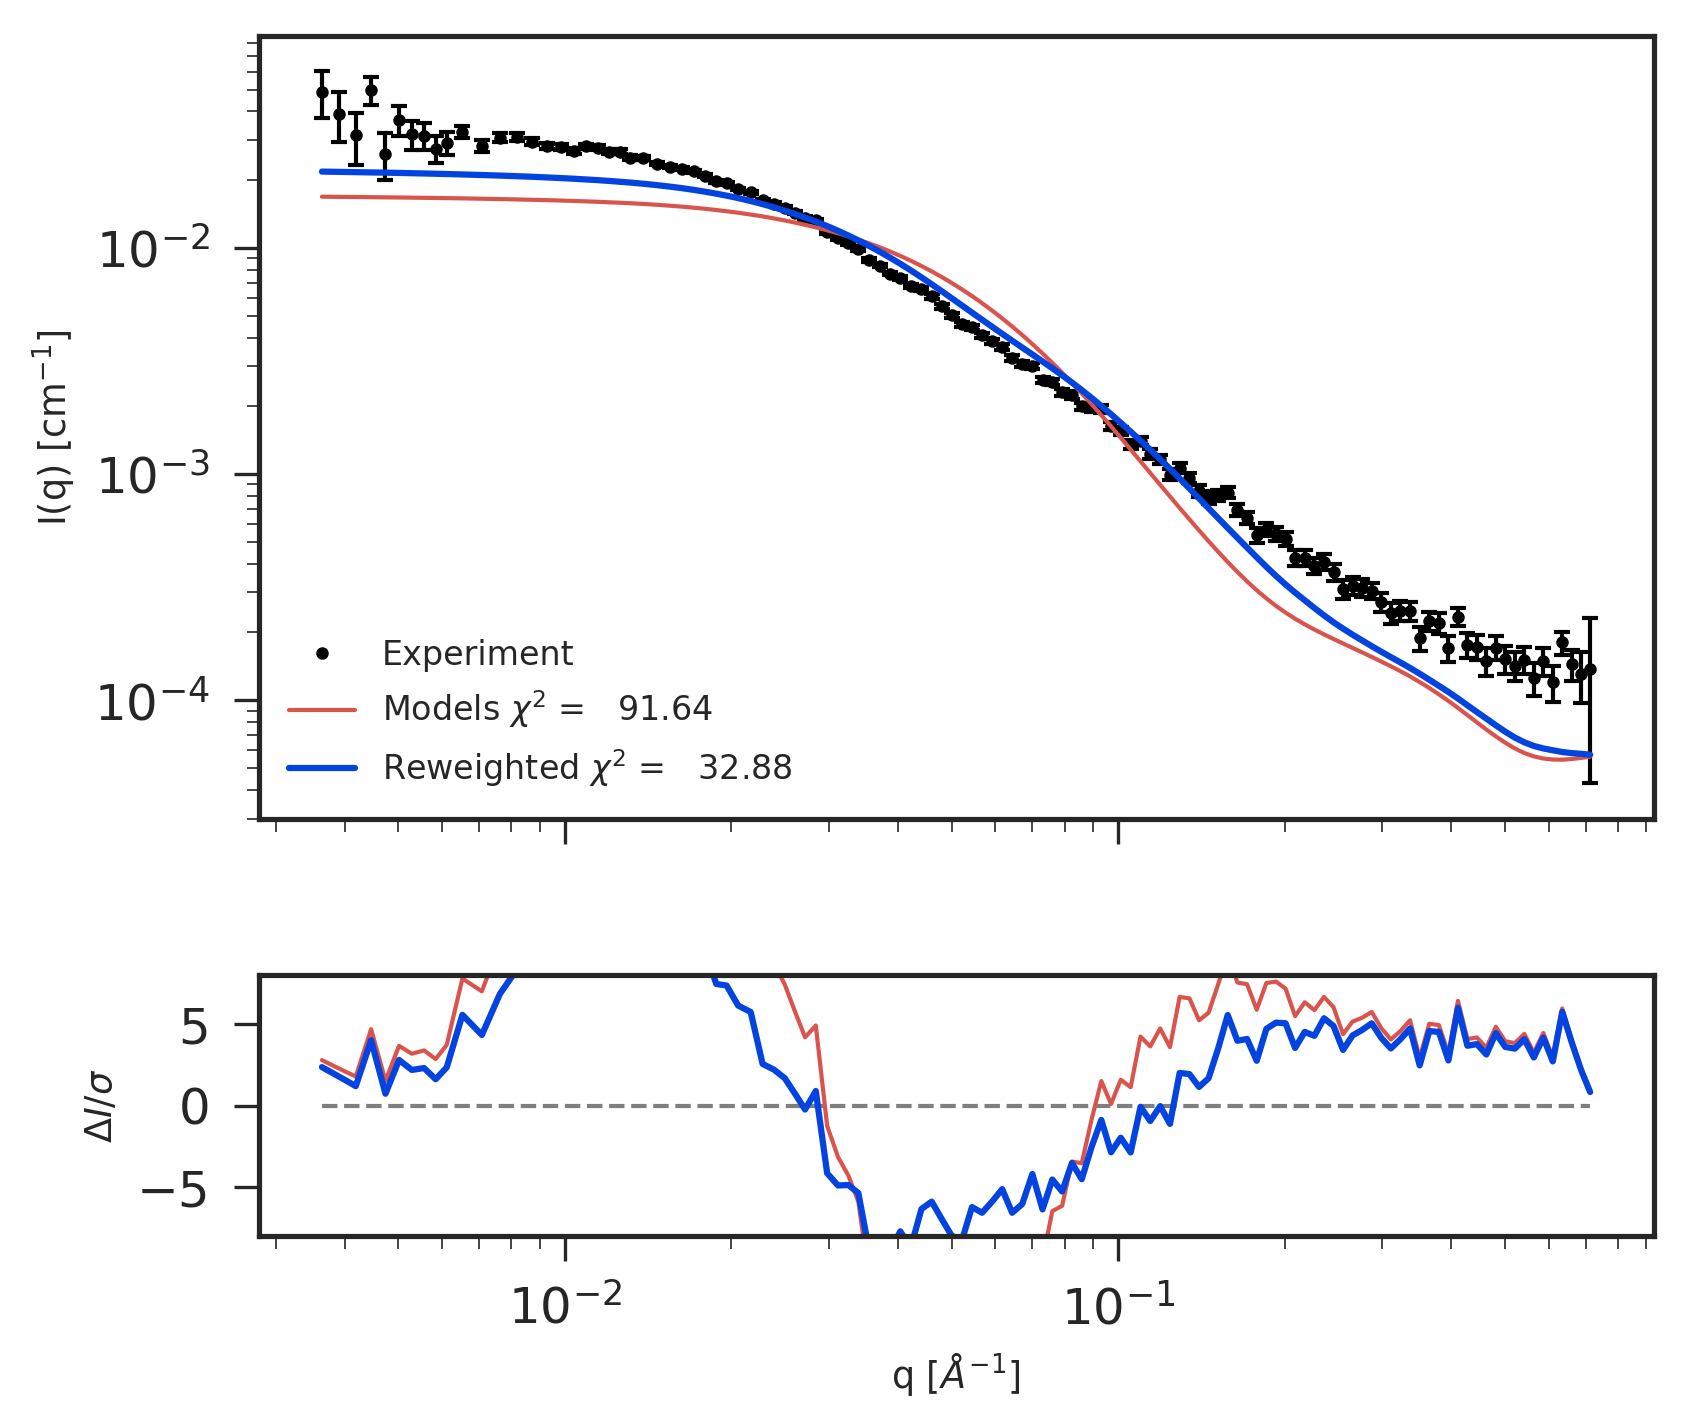

In [8]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws5q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_ub_pws5_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()


### UB_pws6

# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 4.7854e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.6515e-02
# Warning: expt average             0.365043=2.2400e-04 is larger than maximum value in simulation 2.1613e-04
# Warning: expt average             0.379907=2.2000e-04 is larger than maximum value in simulation 2.1344e-04
# Warning: expt average             0.411286=2.3400e-04 is larger than maximum value in simulation 1.7693e-04
# Warning: expt average             0.427801=1.7600e-04 is larger than maximum value in simulation 1.6795e-04
# Warning: expt average             0.445004=1.7200e-04 is larger than maximum value in simulation 1.5997e-04
# Warning: expt average             0.481475=1.7100e-04 is larger than maximum value in simulation 1.4338e-04
# Warning: expt average             0.500880=1.5200e-04 is larger than maximum value in simulation 1.3298e-04
# Warning:

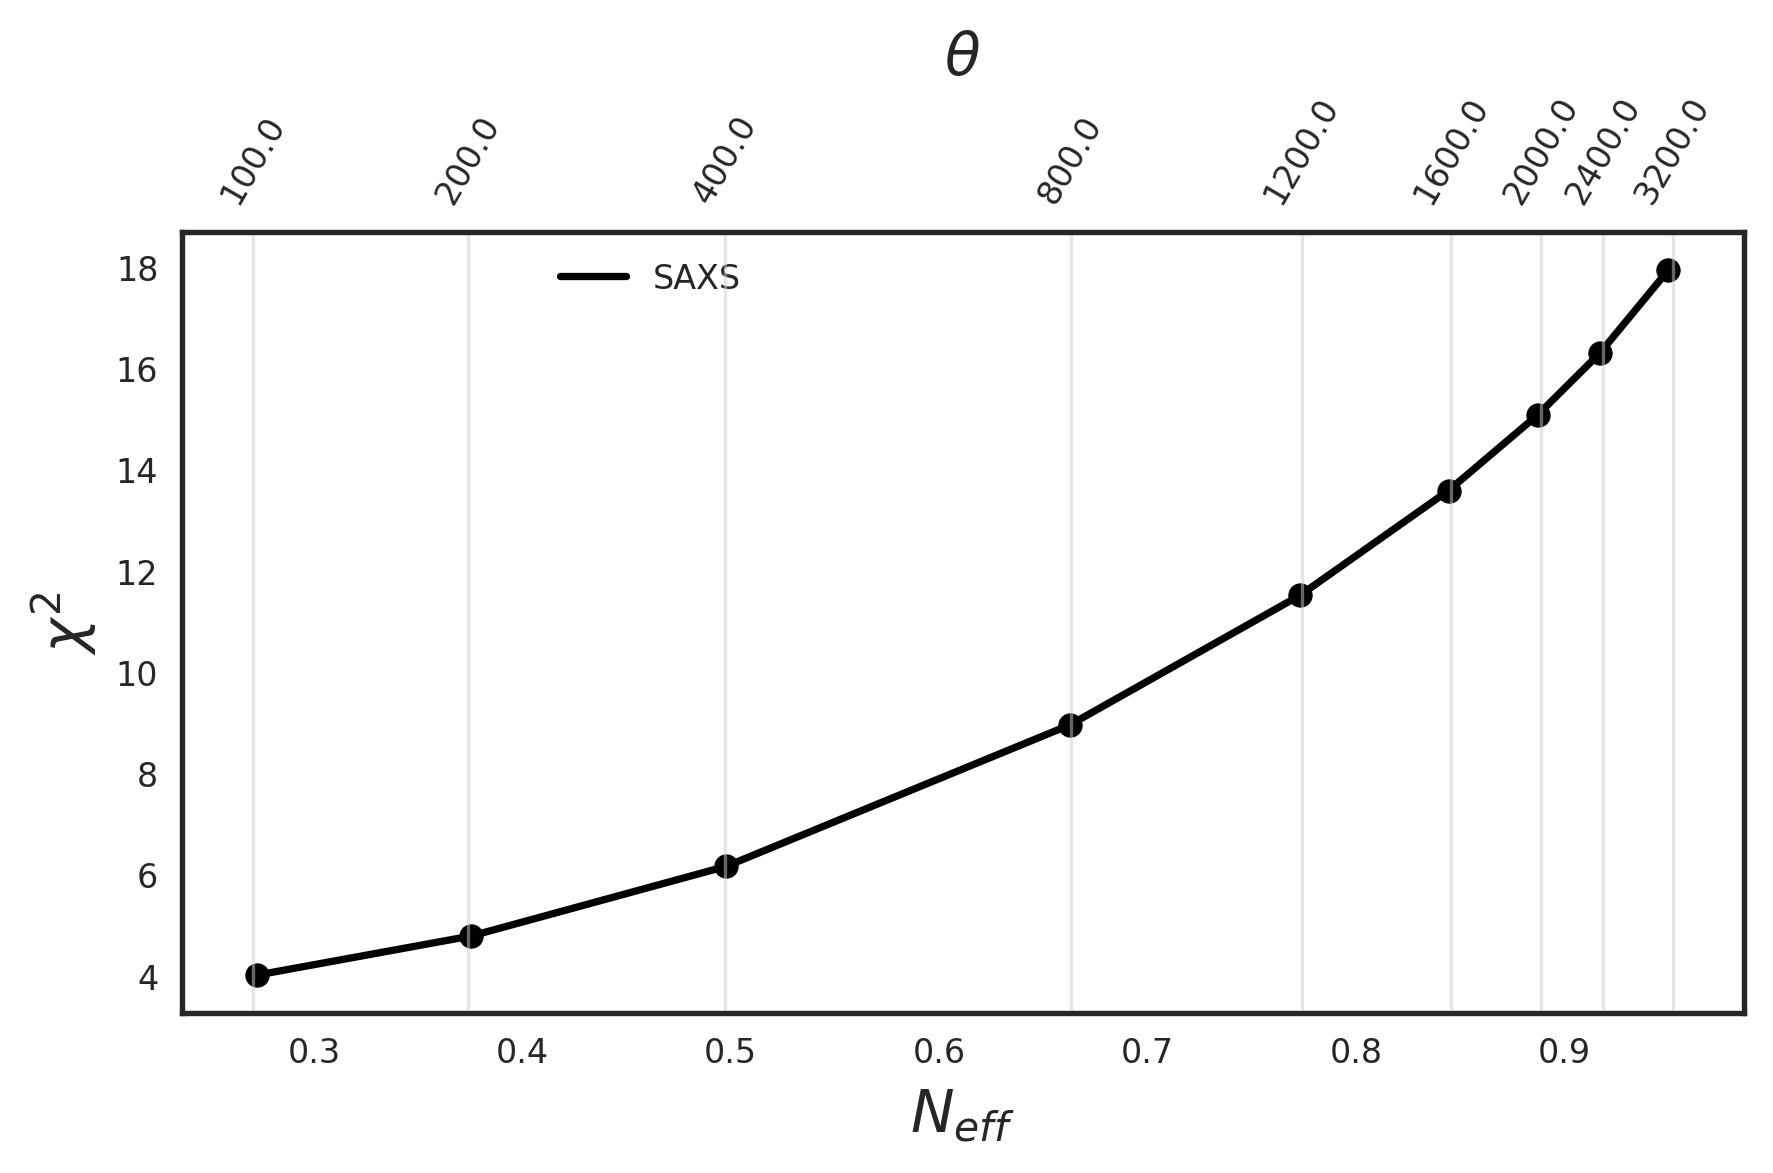

# theta: 800
# CHI2_re before minimization:      23.7194
# CHI2_re after minimization:        8.9611
# Fraction of effective frames:      0.6627


In [9]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws6/BME/ub_pws6_Rg_1ns.dat',usecols=1)
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws6_q07.dat'

### initialize reweighting class


rew = bme.Reweight()
### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [100.,200.,400.,800.,1200.,1600.,2000,2400.,3200]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS 
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [100,200,400,800,1200,1600,2000,2400,3200]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_ub_pws6_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=800)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

ubpws6_chi2_before = chi2_before
ubpws6_chi2_after = chi2_after

In [10]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=800

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws6q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws6q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 4.7854e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.6515e-02
# Warning: expt average             0.365043=2.2400e-04 is larger than maximum value in simulation 2.1613e-04
# Warning: expt average             0.379907=2.2000e-04 is larger than maximum value in simulation 2.1344e-04
# Warning: expt average             0.411286=2.3400e-04 is larger than maximum value in simulation 1.7693e-04
# Warning: expt average             0.427801=1.7600e-04 is larger than maximum value in simulation 1.6795e-04
# Warning: expt average             0.445004=1.7200e-04 is larger than maximum value in simulation 1.5997e-04
# Warning: expt average             0.481475=1.7100e-04 is larger than maximum value in simulation 1.4338e-04
# Warning: expt average             0.500880=1.5200e-04 is larger than maximum value in simulation 1.3298e-04
# Warning:

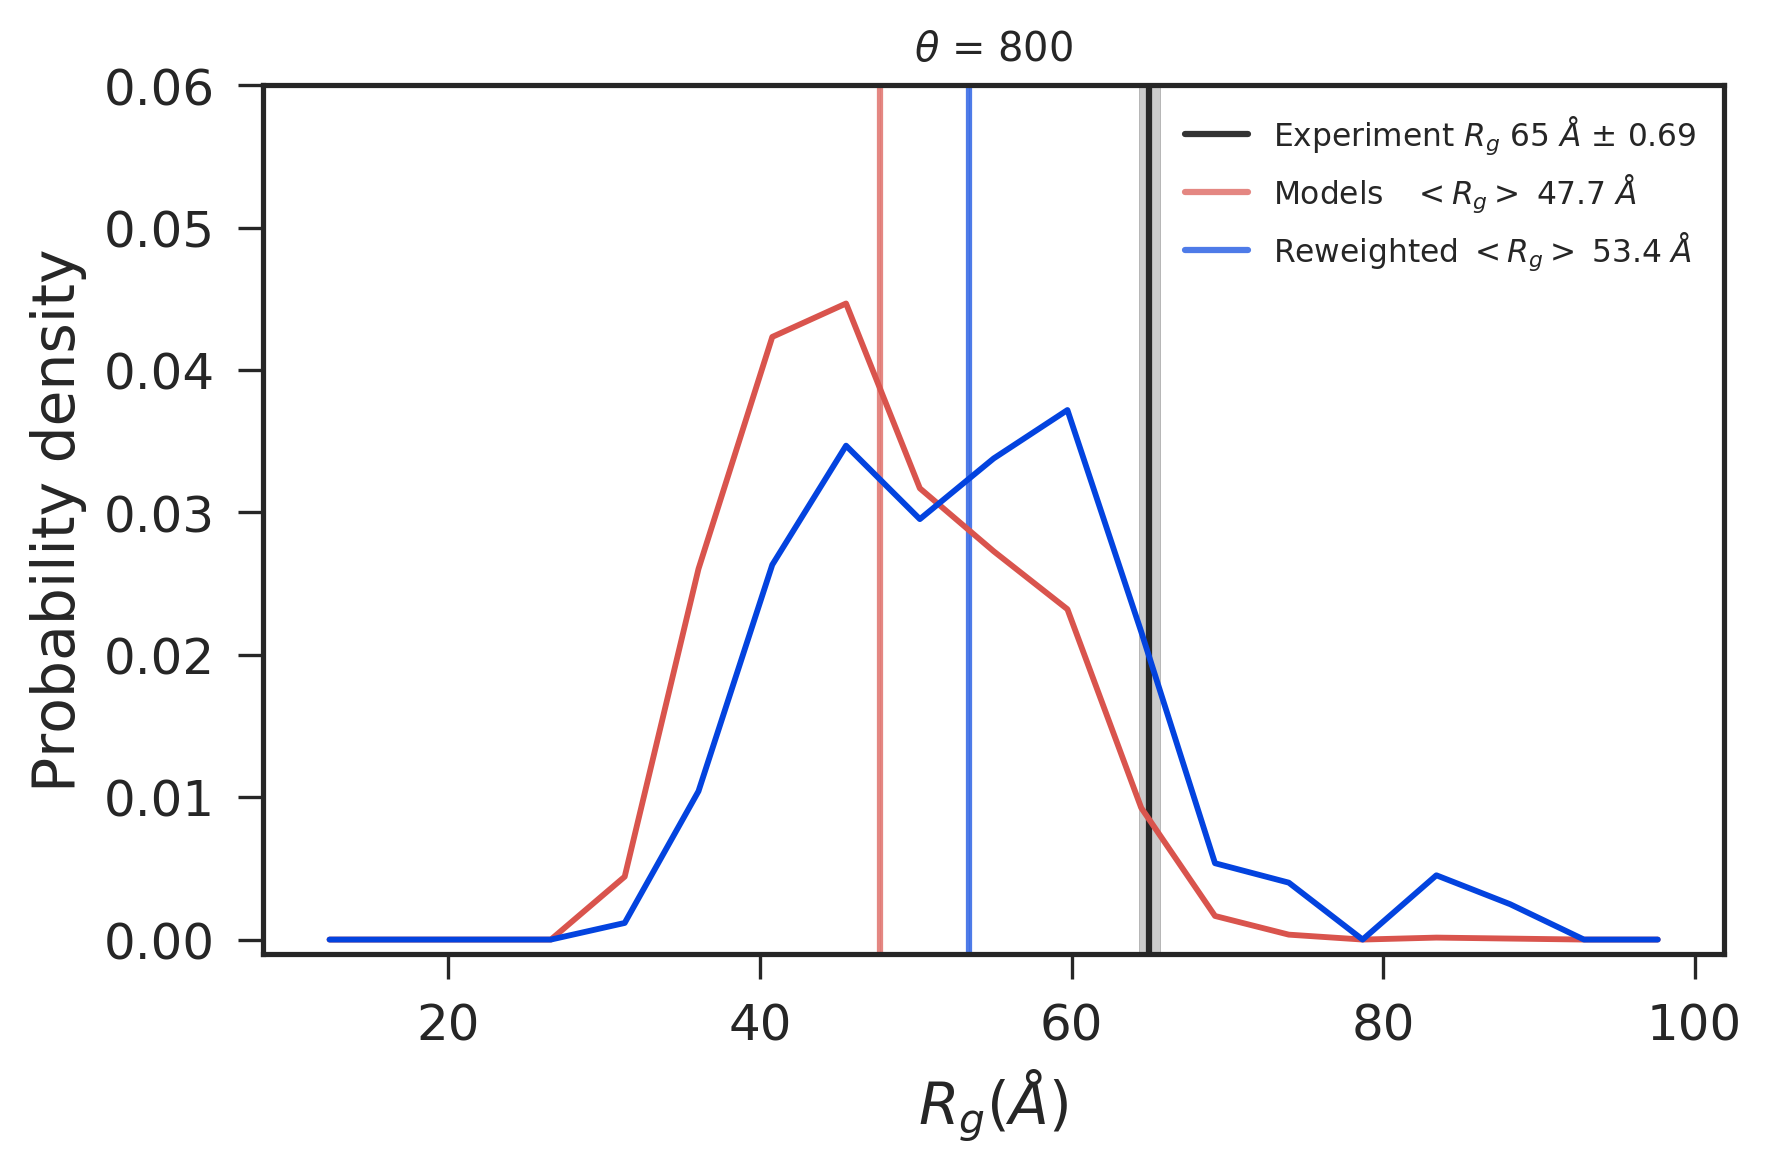

In [11]:
## Rg histograms

## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,100,20)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws6q07_{}_weights.dat'.format(j), usecols=1)
    Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
    
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65.0+0.69, alpha=0.2, color=c1)

plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )

ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(-0.001,0.06)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_ub_pws6_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

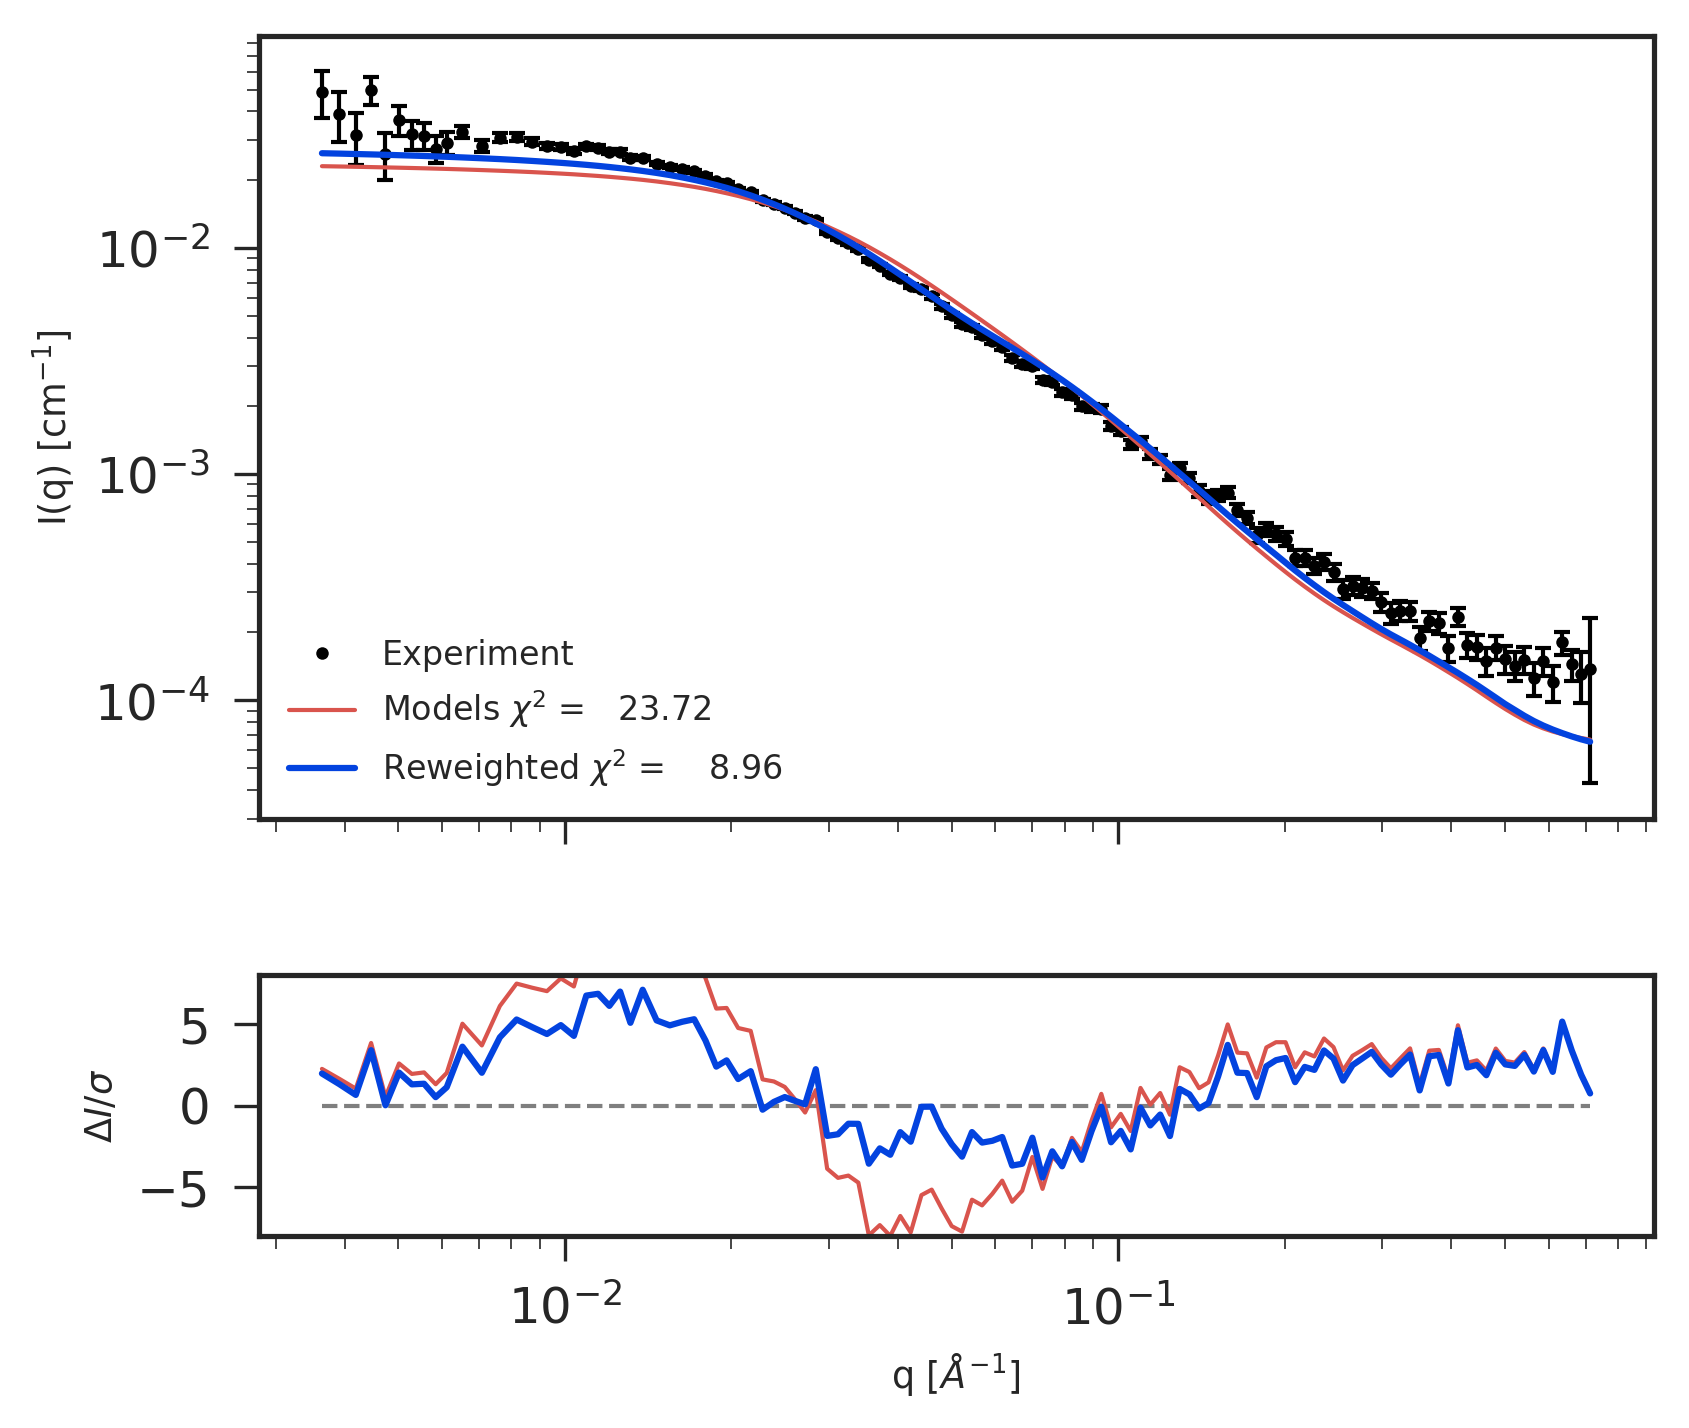

In [12]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws6q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_ub_pws6_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

### UB_pws8

# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 4.6300e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.5021e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.4406e-04
# Warning: expt average             0.660388=1.4400e-04 is larger than maximum value in simulation 1.3325e-04
# Warning: expt average             0.686950=1.3000e-04 is larger than maximum value in simulation 1.2989e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.2847e-04
# theta: 100.0
# theta: 200.0
# theta: 400.0
# theta: 800.0
# theta: 1200.0
# theta: 1600.0
# theta: 2000
# theta: 2400.0
# theta: 3200


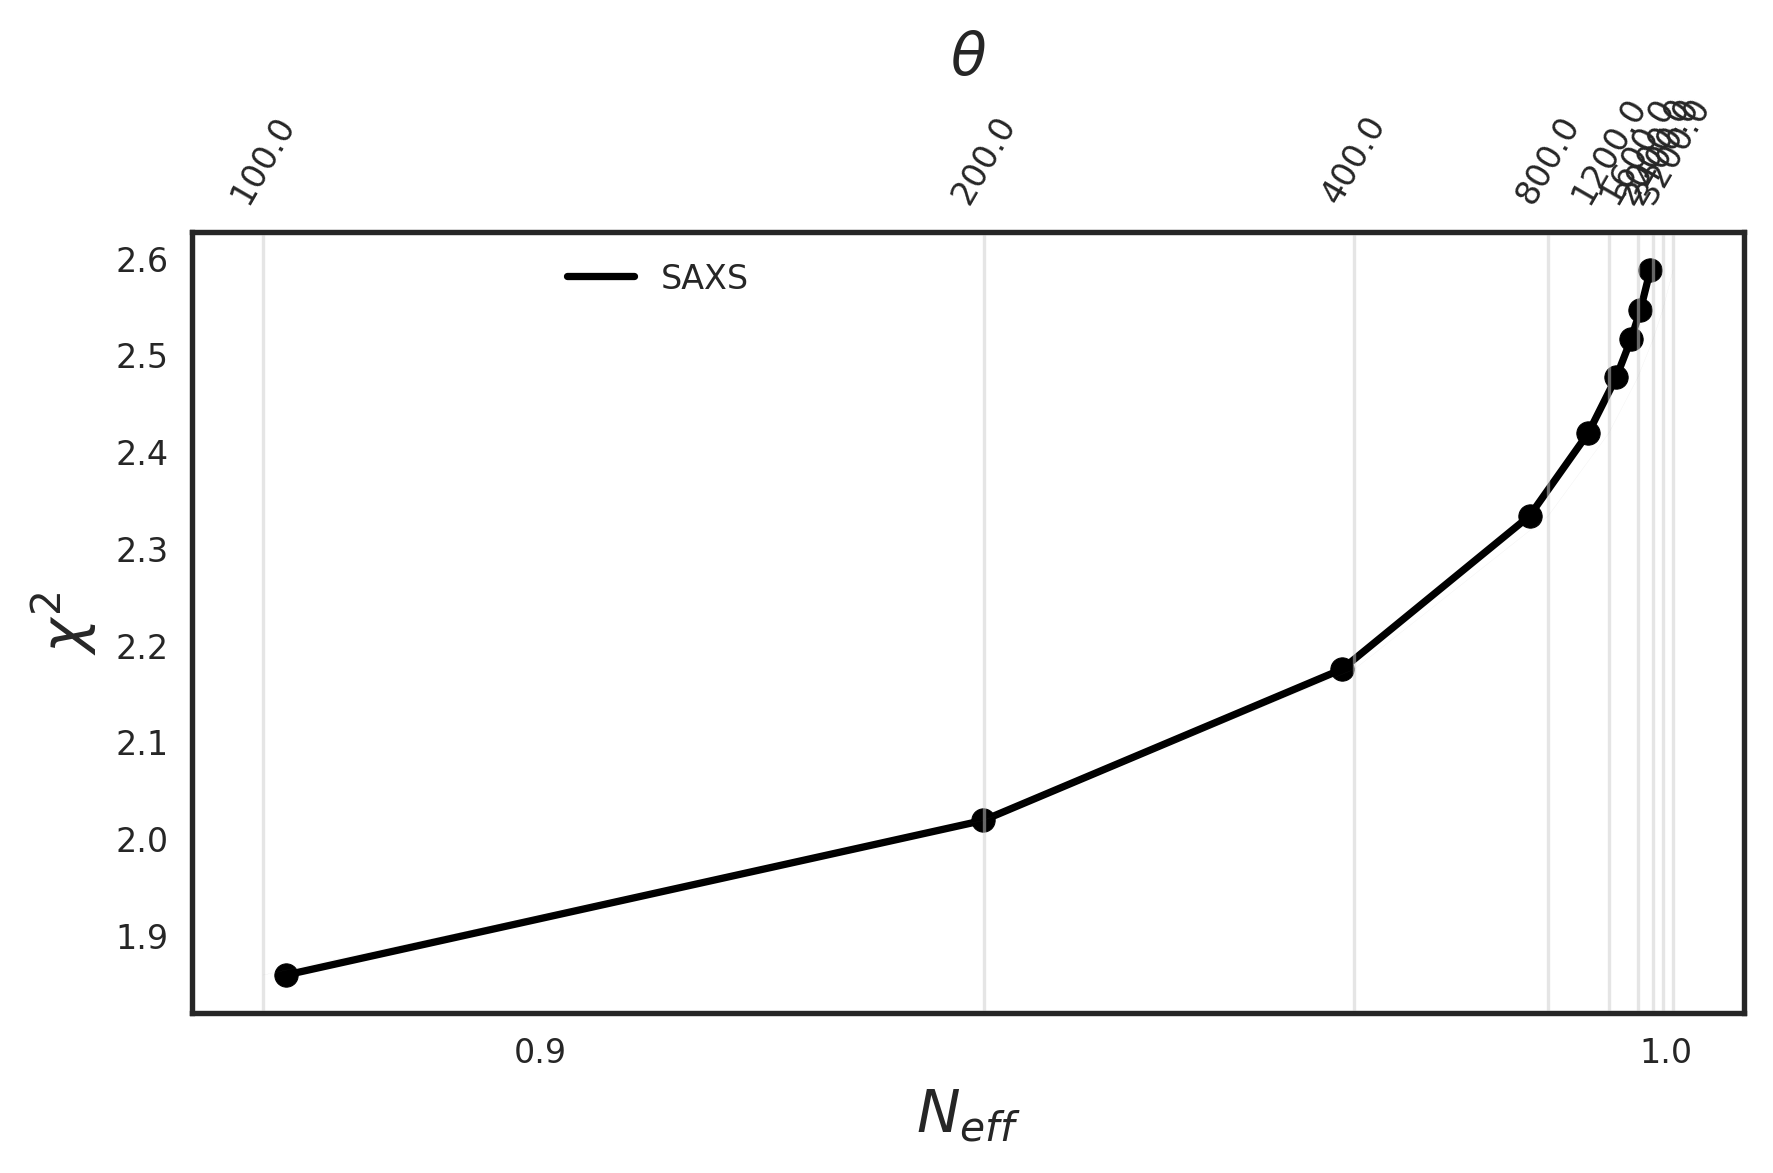

# theta: 800
# CHI2_re before minimization:       2.7474
# CHI2_re after minimization:        2.3334
# Fraction of effective frames:      0.9879


In [14]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws8/BME/ub_pws8_Rg_1ns.dat',usecols=1)
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws8_q07.dat'

### initialize reweighting class


rew = bme.Reweight()
### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [100.,200.,400.,800.,1200.,1600.,2000,2400.,3200]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS 
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [100,200,400,800,1200,1600,2000,2400,3200]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_ub_pws8_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=800)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

ubpws8_chi2_before = chi2_before
ubpws8_chi2_after = chi2_after

In [15]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=800

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws8q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws8q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 4.6300e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.5021e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.4406e-04
# Warning: expt average             0.660388=1.4400e-04 is larger than maximum value in simulation 1.3325e-04
# Warning: expt average             0.686950=1.3000e-04 is larger than maximum value in simulation 1.2989e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.2847e-04
# theta: 800


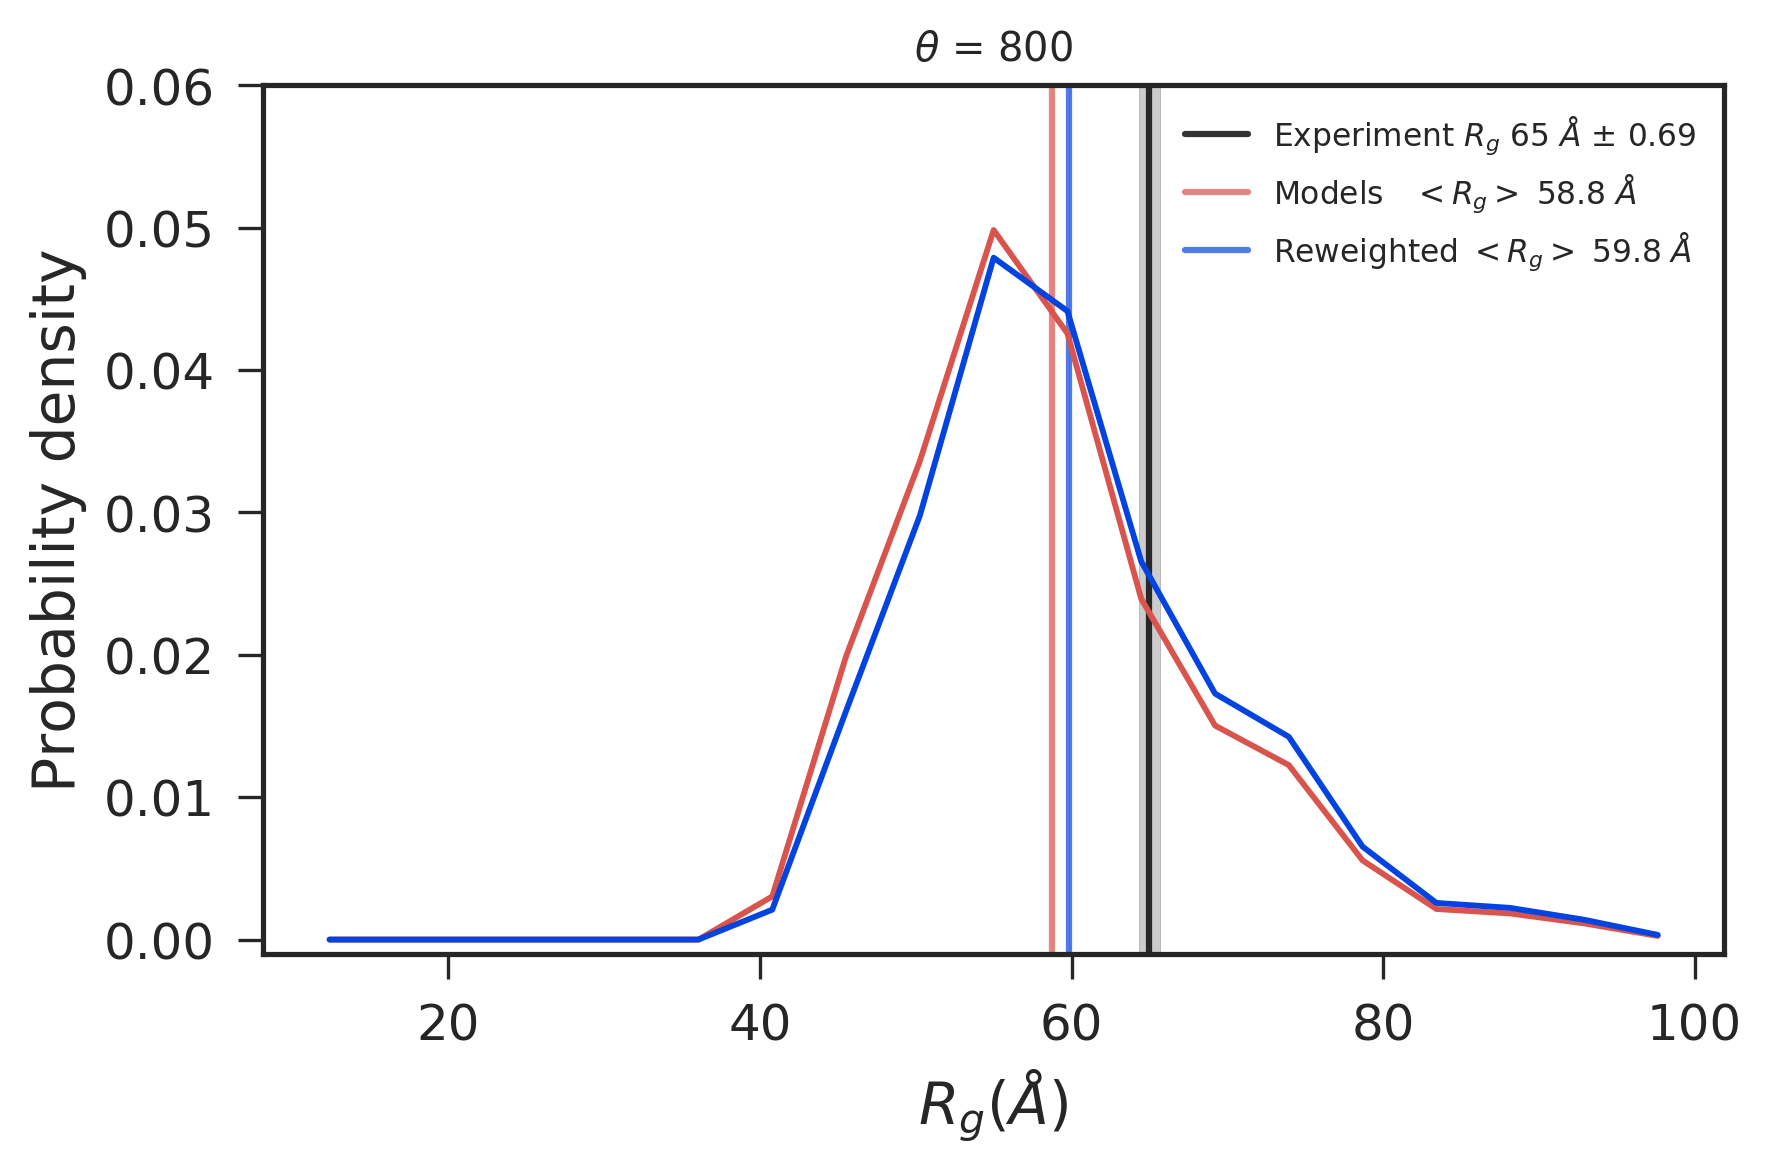

In [16]:
## Rg histograms

## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,100,20)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws8q07_{}_weights.dat'.format(j), usecols=1)
    Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
    
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65.0+0.69, alpha=0.2, color=c1)

plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )

ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(-0.001,0.06)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_ub_pws8_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

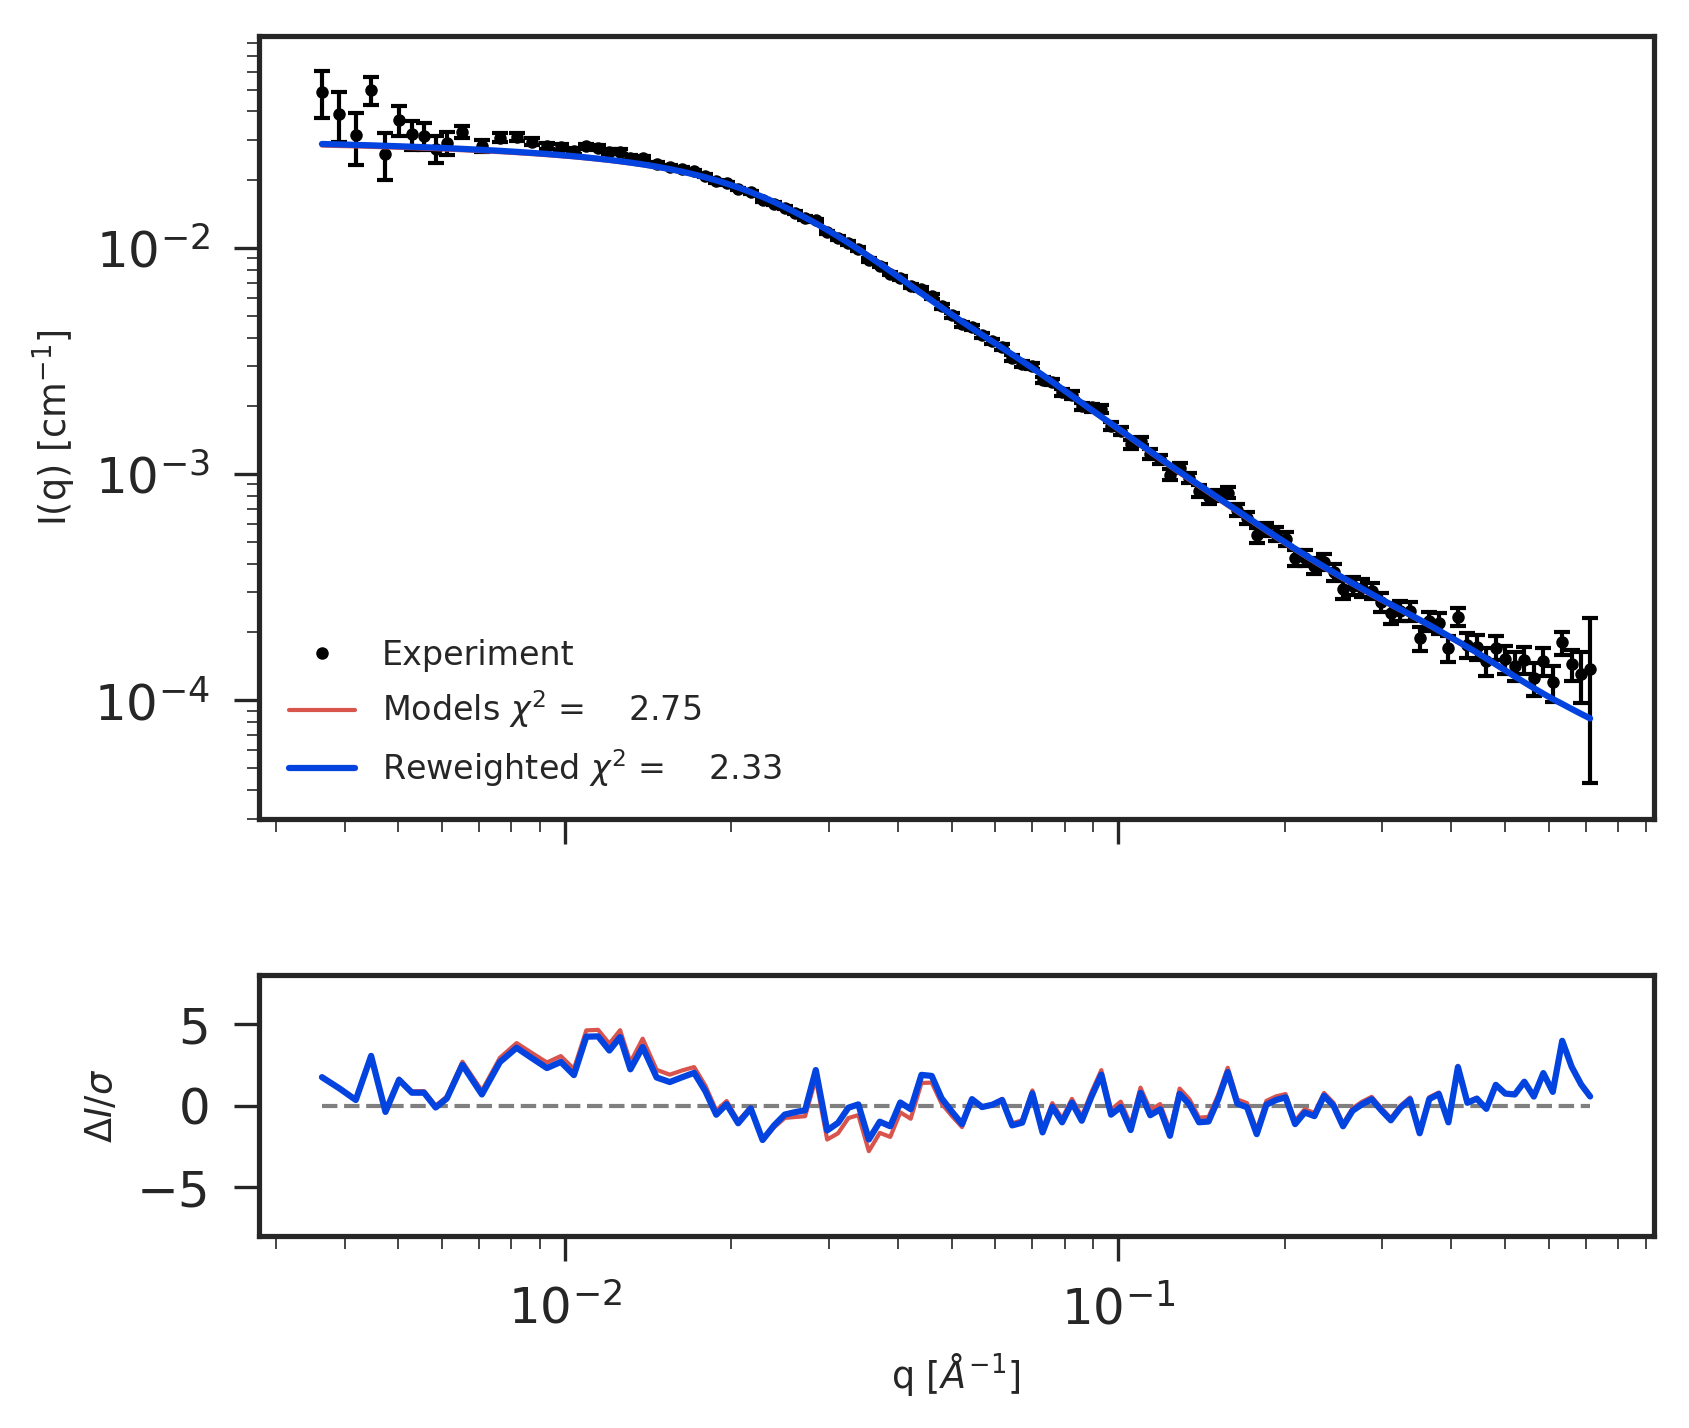

In [17]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws8q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_ub_pws8_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

### UB_pws10

# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 4.6442e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.5144e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.6421e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.3411e-04
# theta: 100.0
# theta: 200.0
# theta: 400.0
# theta: 800.0
# theta: 1200.0
# theta: 1600.0
# theta: 2000
# theta: 2400.0
# theta: 3200


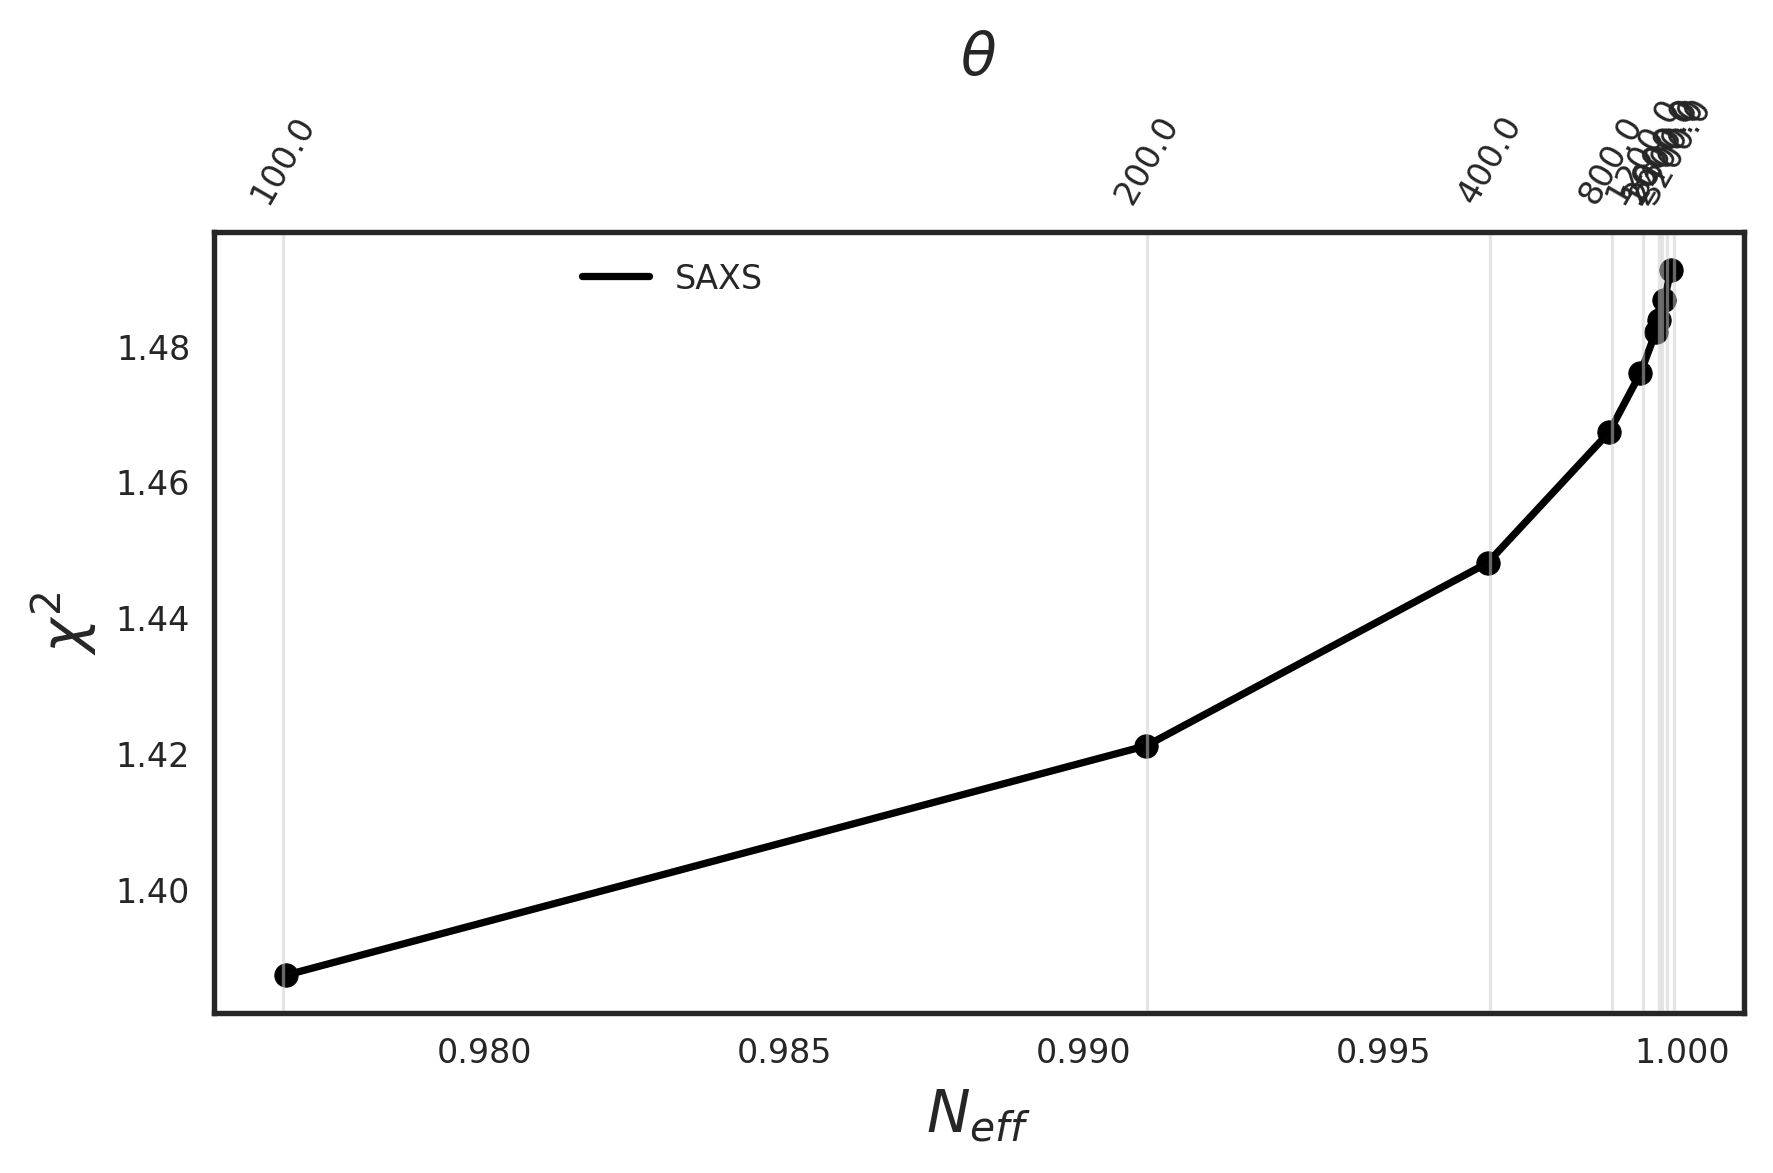

# theta: 800
# CHI2_re before minimization:       1.5110
# CHI2_re after minimization:        1.4673
# Fraction of effective frames:      0.9988


In [18]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/ub_pws10_Rg_1ns.dat',usecols=1)
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws10_q07.dat'

### initialize reweighting class


rew = bme.Reweight()
### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [100.,200.,400.,800.,1200.,1600.,2000,2400.,3200]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS 
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
#ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%4.3f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [100,200,400,800,1200,1600,2000,2400,3200]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_ub_pws10_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=800)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

ubpws10_chi2_before = chi2_before
ubpws10_chi2_after = chi2_after

In [19]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=800

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 4.6442e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.5144e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.6421e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.3411e-04
# theta: 800


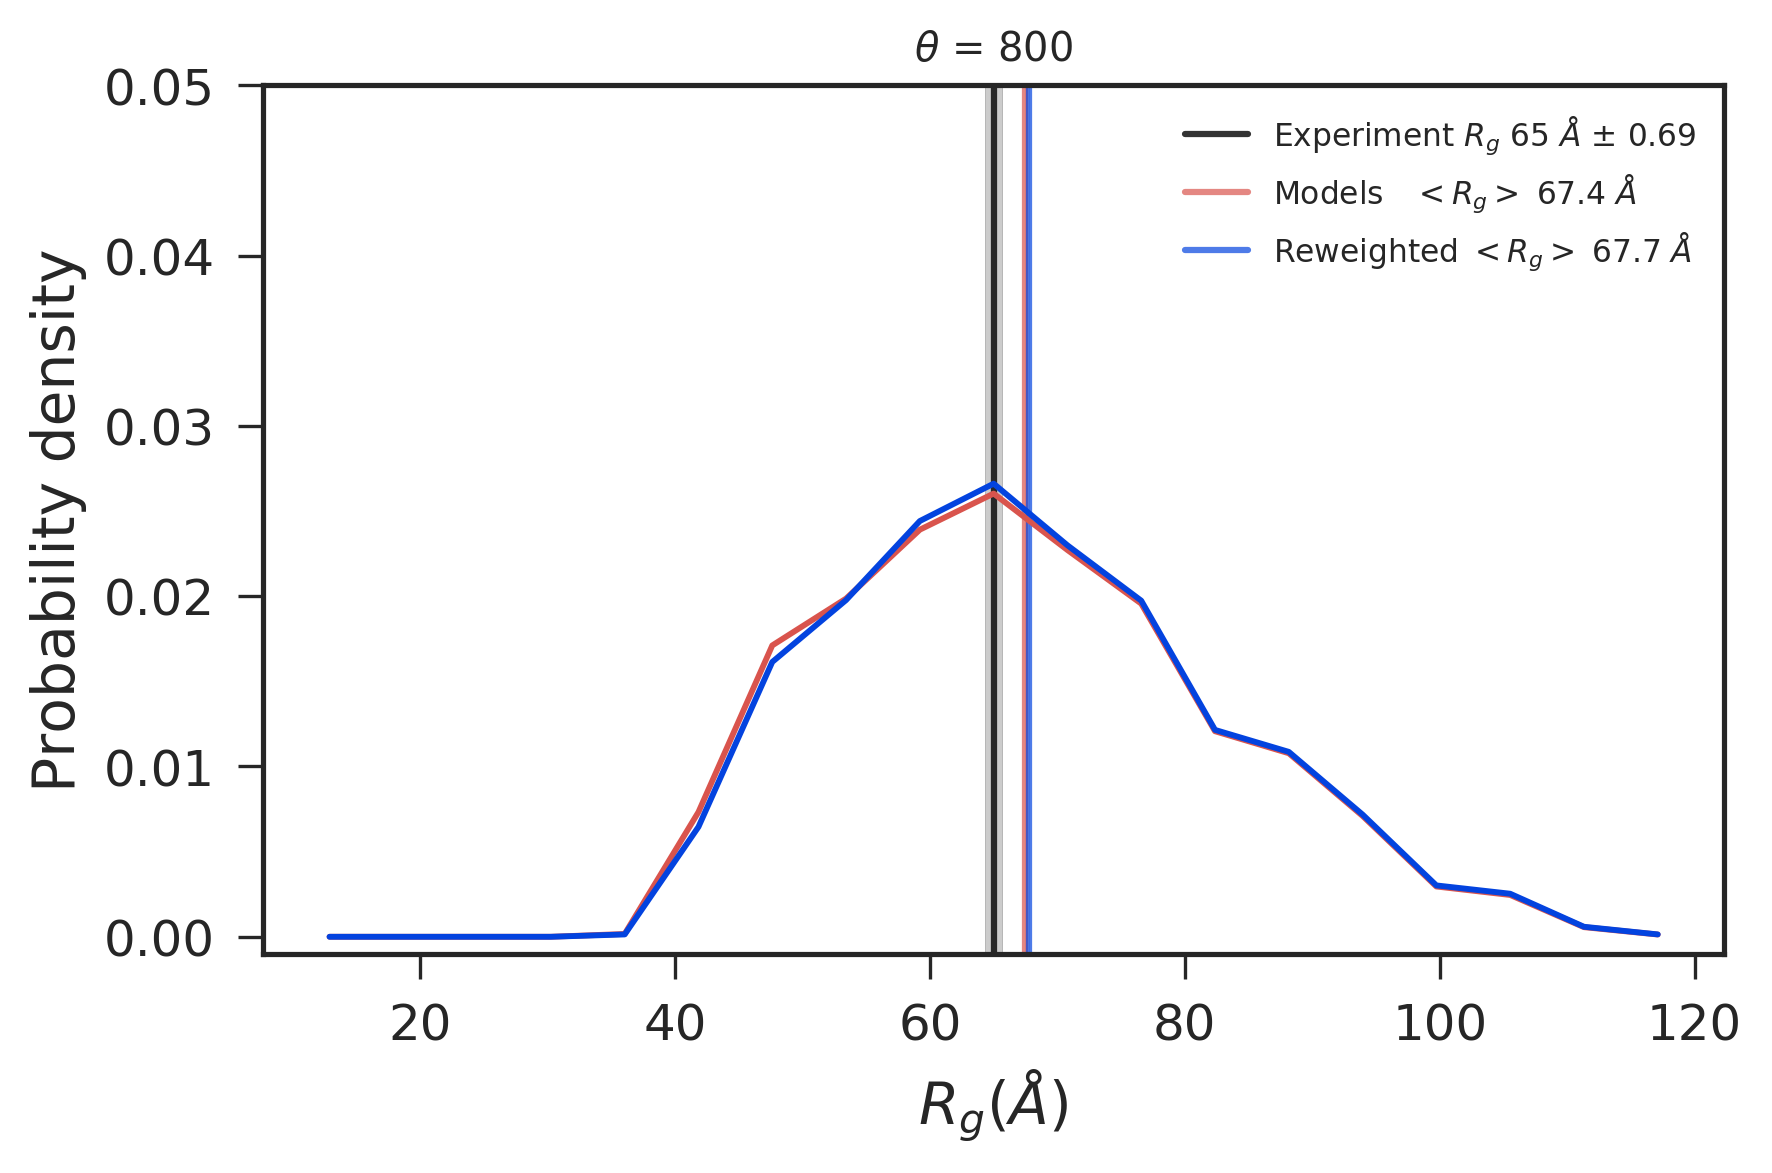

In [21]:
## Rg histograms

## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,120,20)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10q07_{}_weights.dat'.format(j), usecols=1)
    Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
    
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65.0+0.69, alpha=0.2, color=c1)

plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )

ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(-0.001,0.05)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_ub_pws10_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

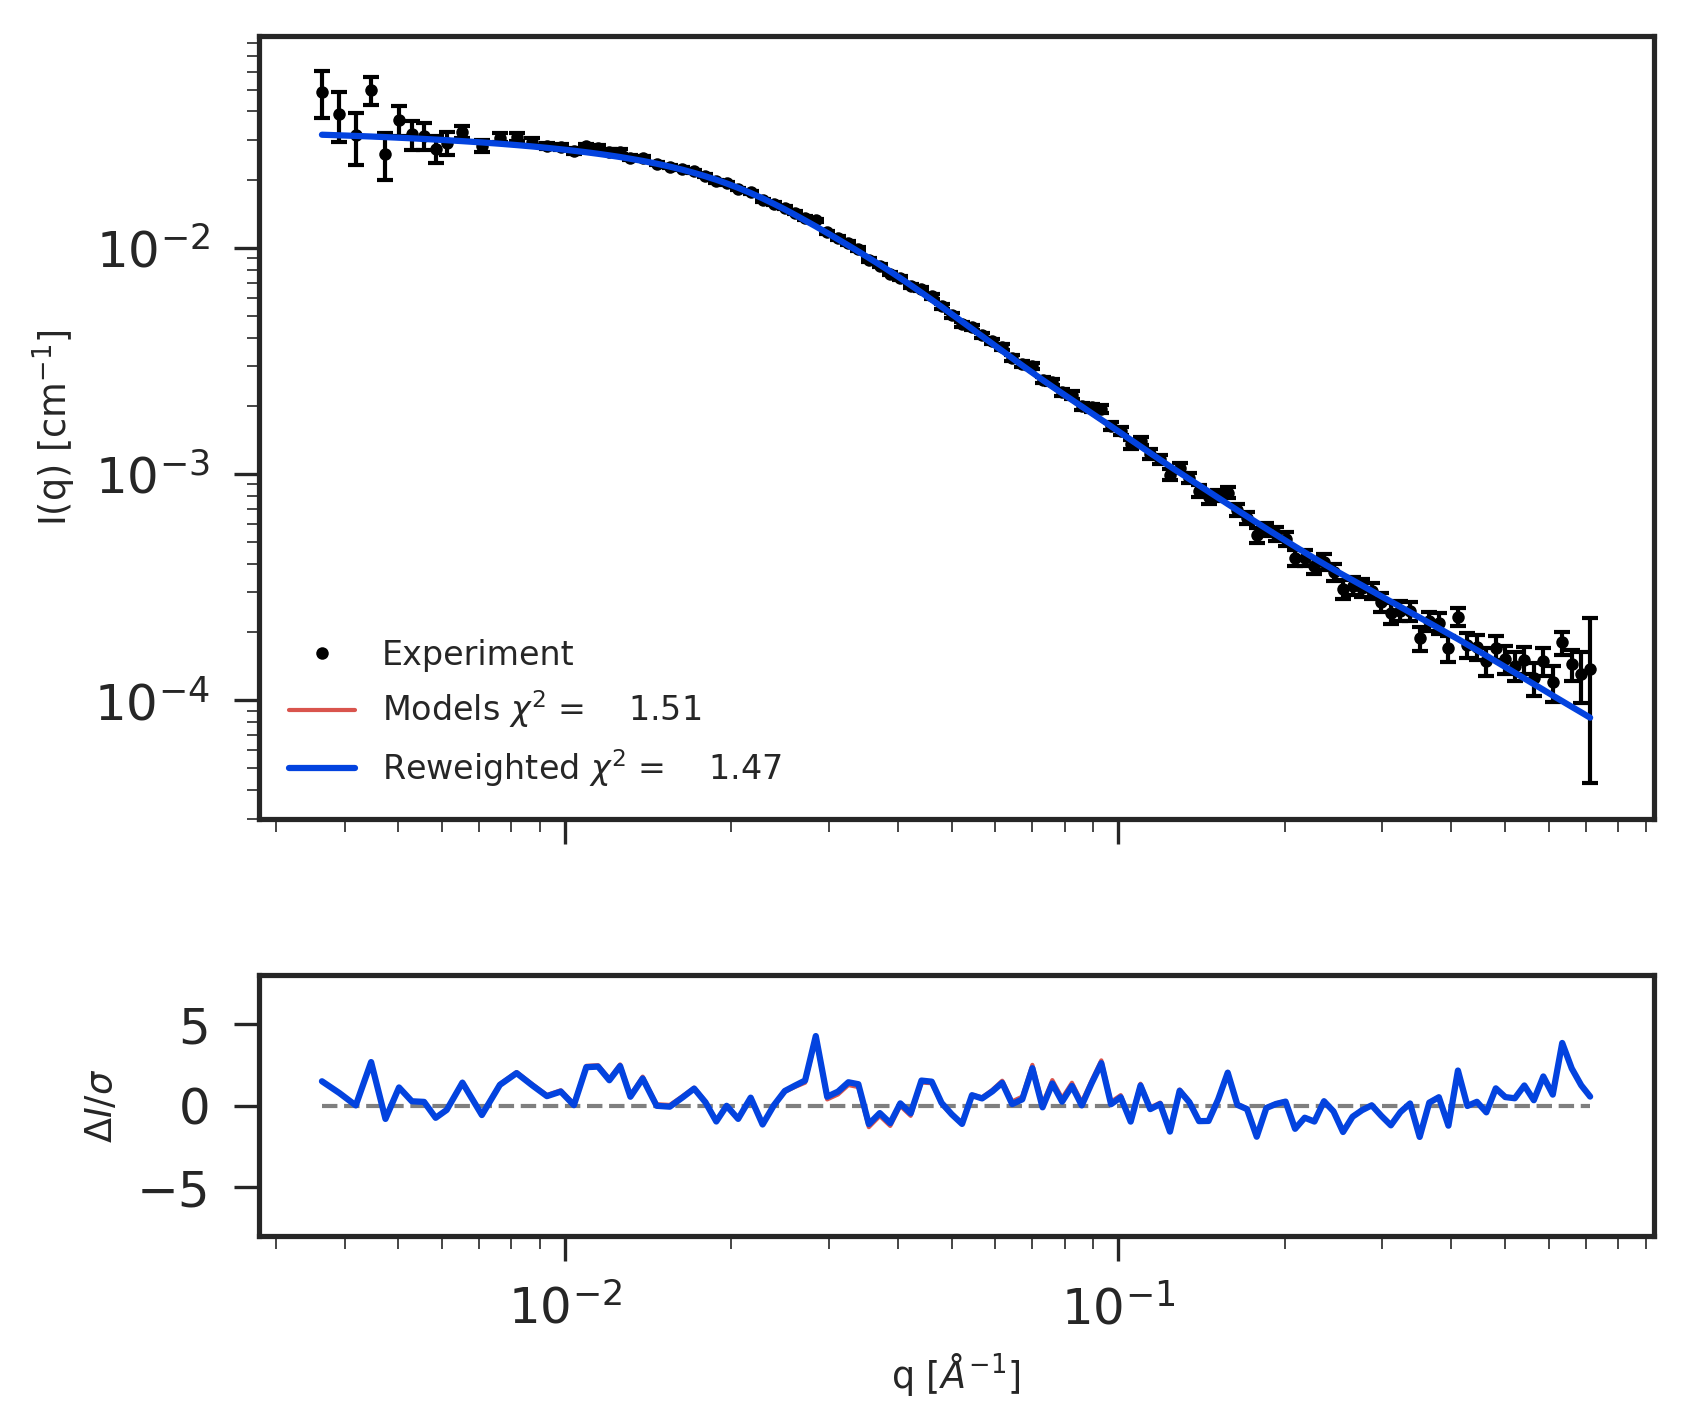

In [22]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_ub_pws10_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

## UBpws10 -- q 0.7

# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 4.6442e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.5144e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.6421e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.3411e-04
# theta: 400.0
# theta: 800.0
# theta: 1200.0
# theta: 1600.0
# theta: 2000
# theta: 2400.0
# theta: 3200


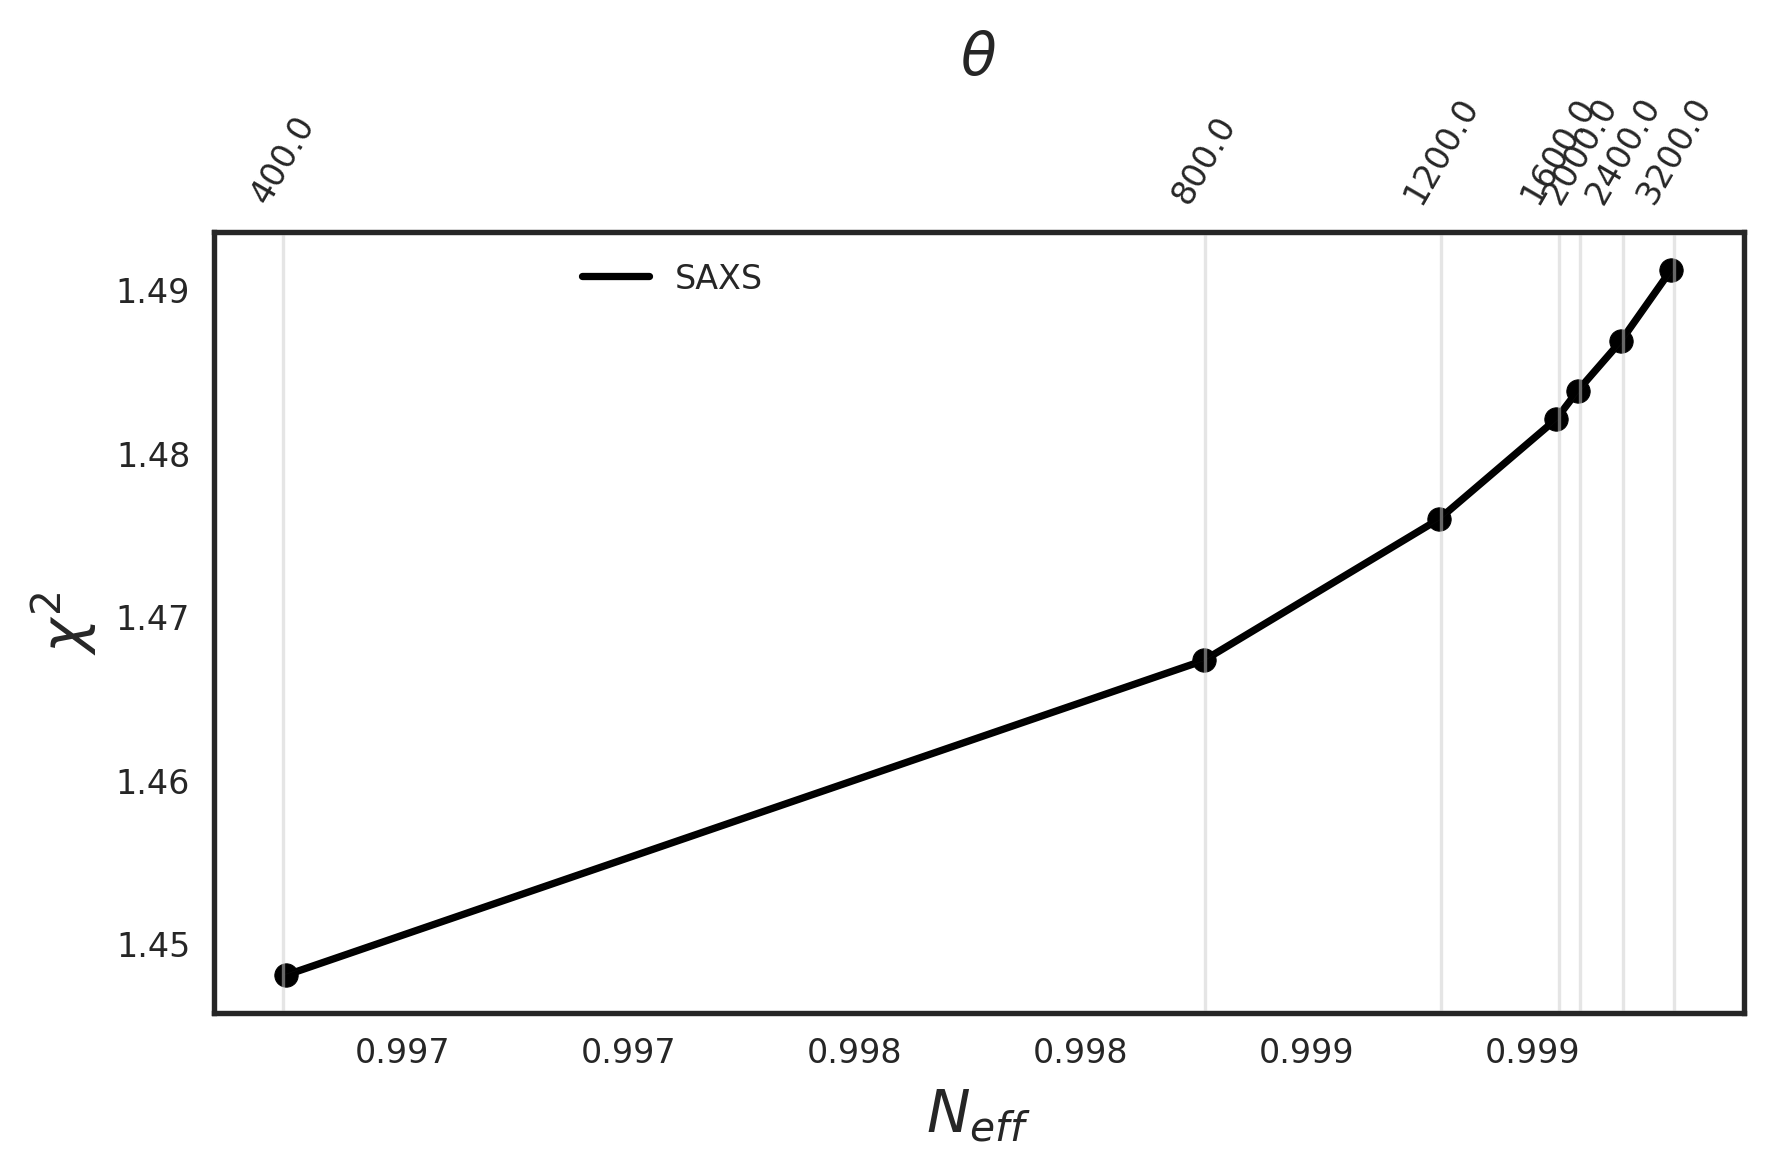

# theta: 800
# CHI2_re before minimization:       1.5110
# CHI2_re after minimization:        1.4673
# Fraction of effective frames:      0.9988


In [29]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/ub_pws10_Rg_1ns.dat',usecols=1)
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
#exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07_qmin_ABGRCM.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws10_q07.dat'

### initialize reweighting class


rew = bme.Reweight()
### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [400.,800.,1200.,1600.,2000,2400.,3200]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS 
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
#ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%4.3f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [400,800,1200,1600,2000,2400,3200]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_ub_pws10_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=800)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

ubpws10_chi2_before = chi2_before
ubpws10_chi2_after = chi2_after

In [30]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =5
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=800

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 4.6442e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.5144e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.4824e-04
# Warning: expt average             0.660388=1.4400e-04 is larger than maximum value in simulation 1.4291e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.2717e-04
# theta: 800
# Warning: expt average             0.003638=4.8717e-02 is larger than maximum value in simulation 4.1721e-02
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.0359e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.4864e-04
# Warning: expt average             0.660388=1.4400e-04 is larger than maximum value in simulation 1.3816e-

IndexError: index 5209 is out of bounds for axis 0 with size 5209

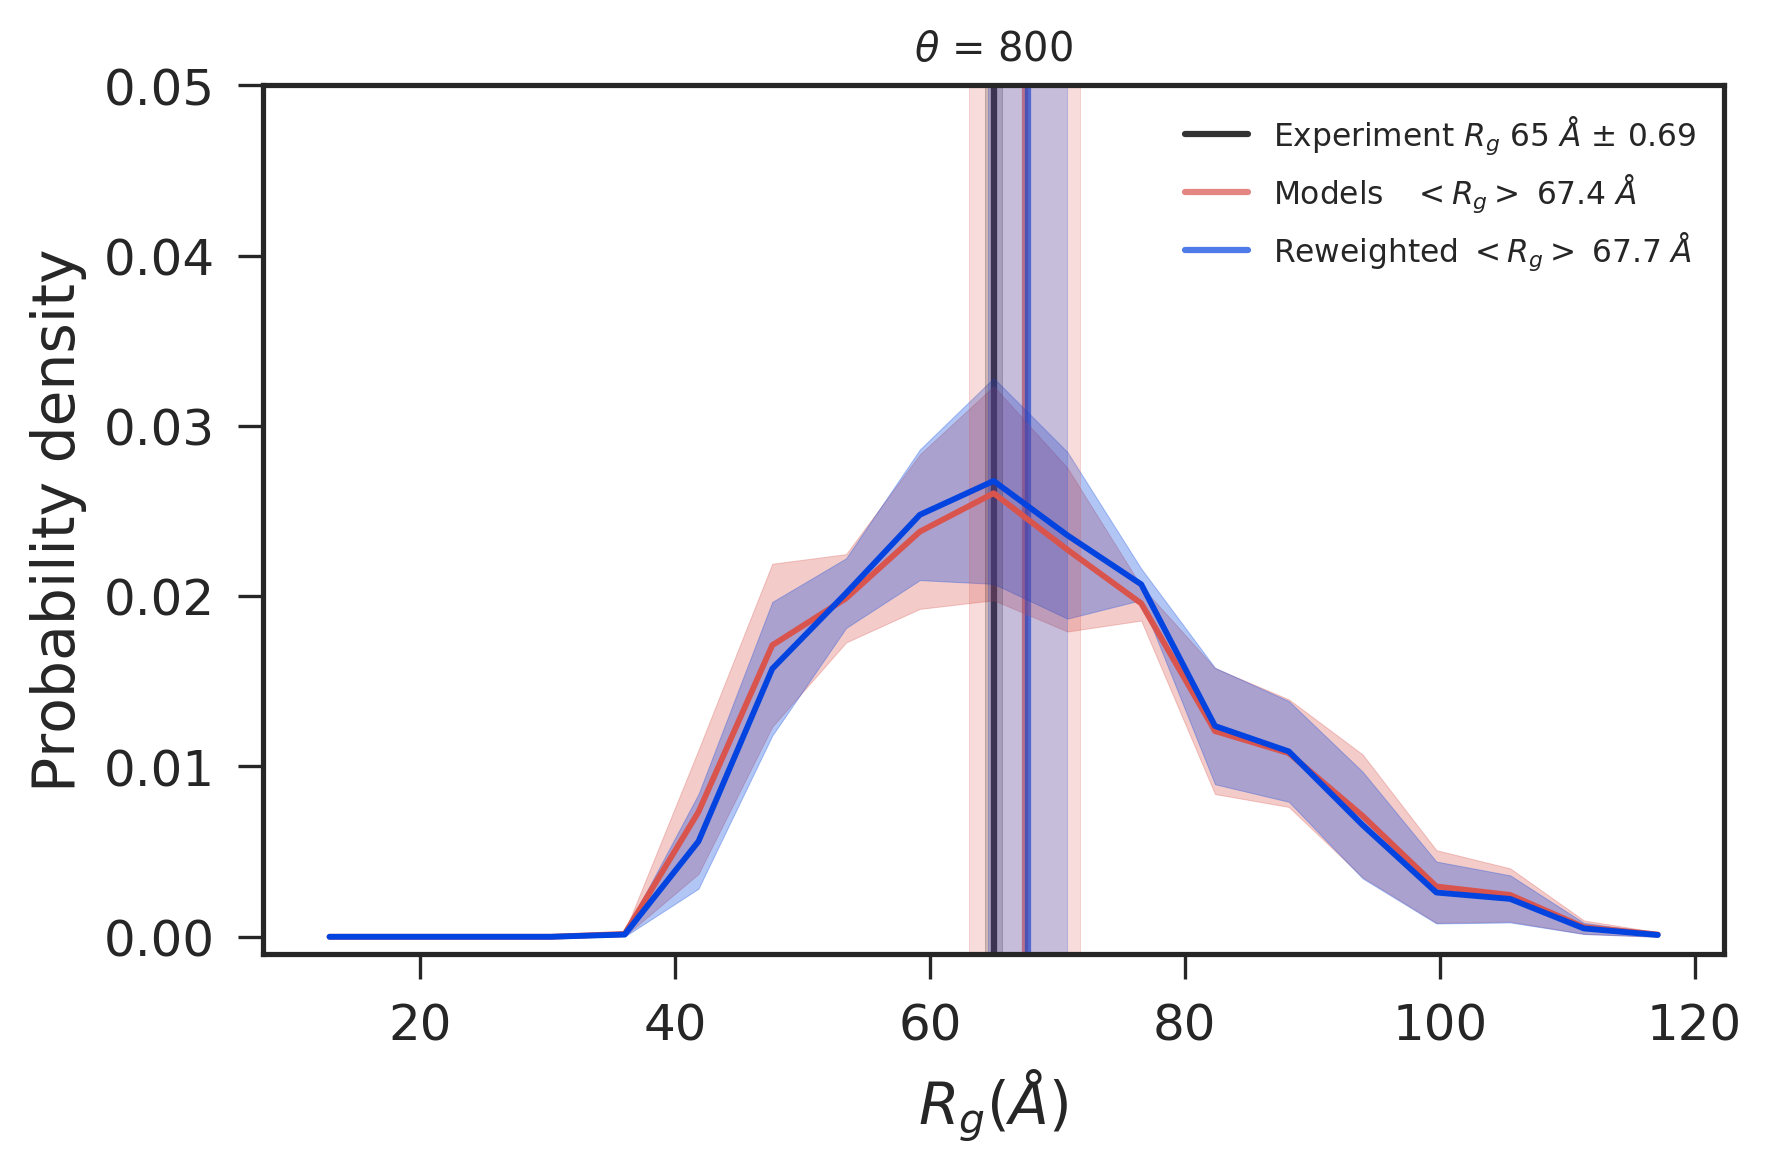

In [31]:
## Rg histograms

## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,120,20)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_{}_weights.dat'.format(j), usecols=1)
    Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
    
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65.0+0.69, alpha=0.2, color=c1)

plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )

ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(-0.001,0.05)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_ub_pws10_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

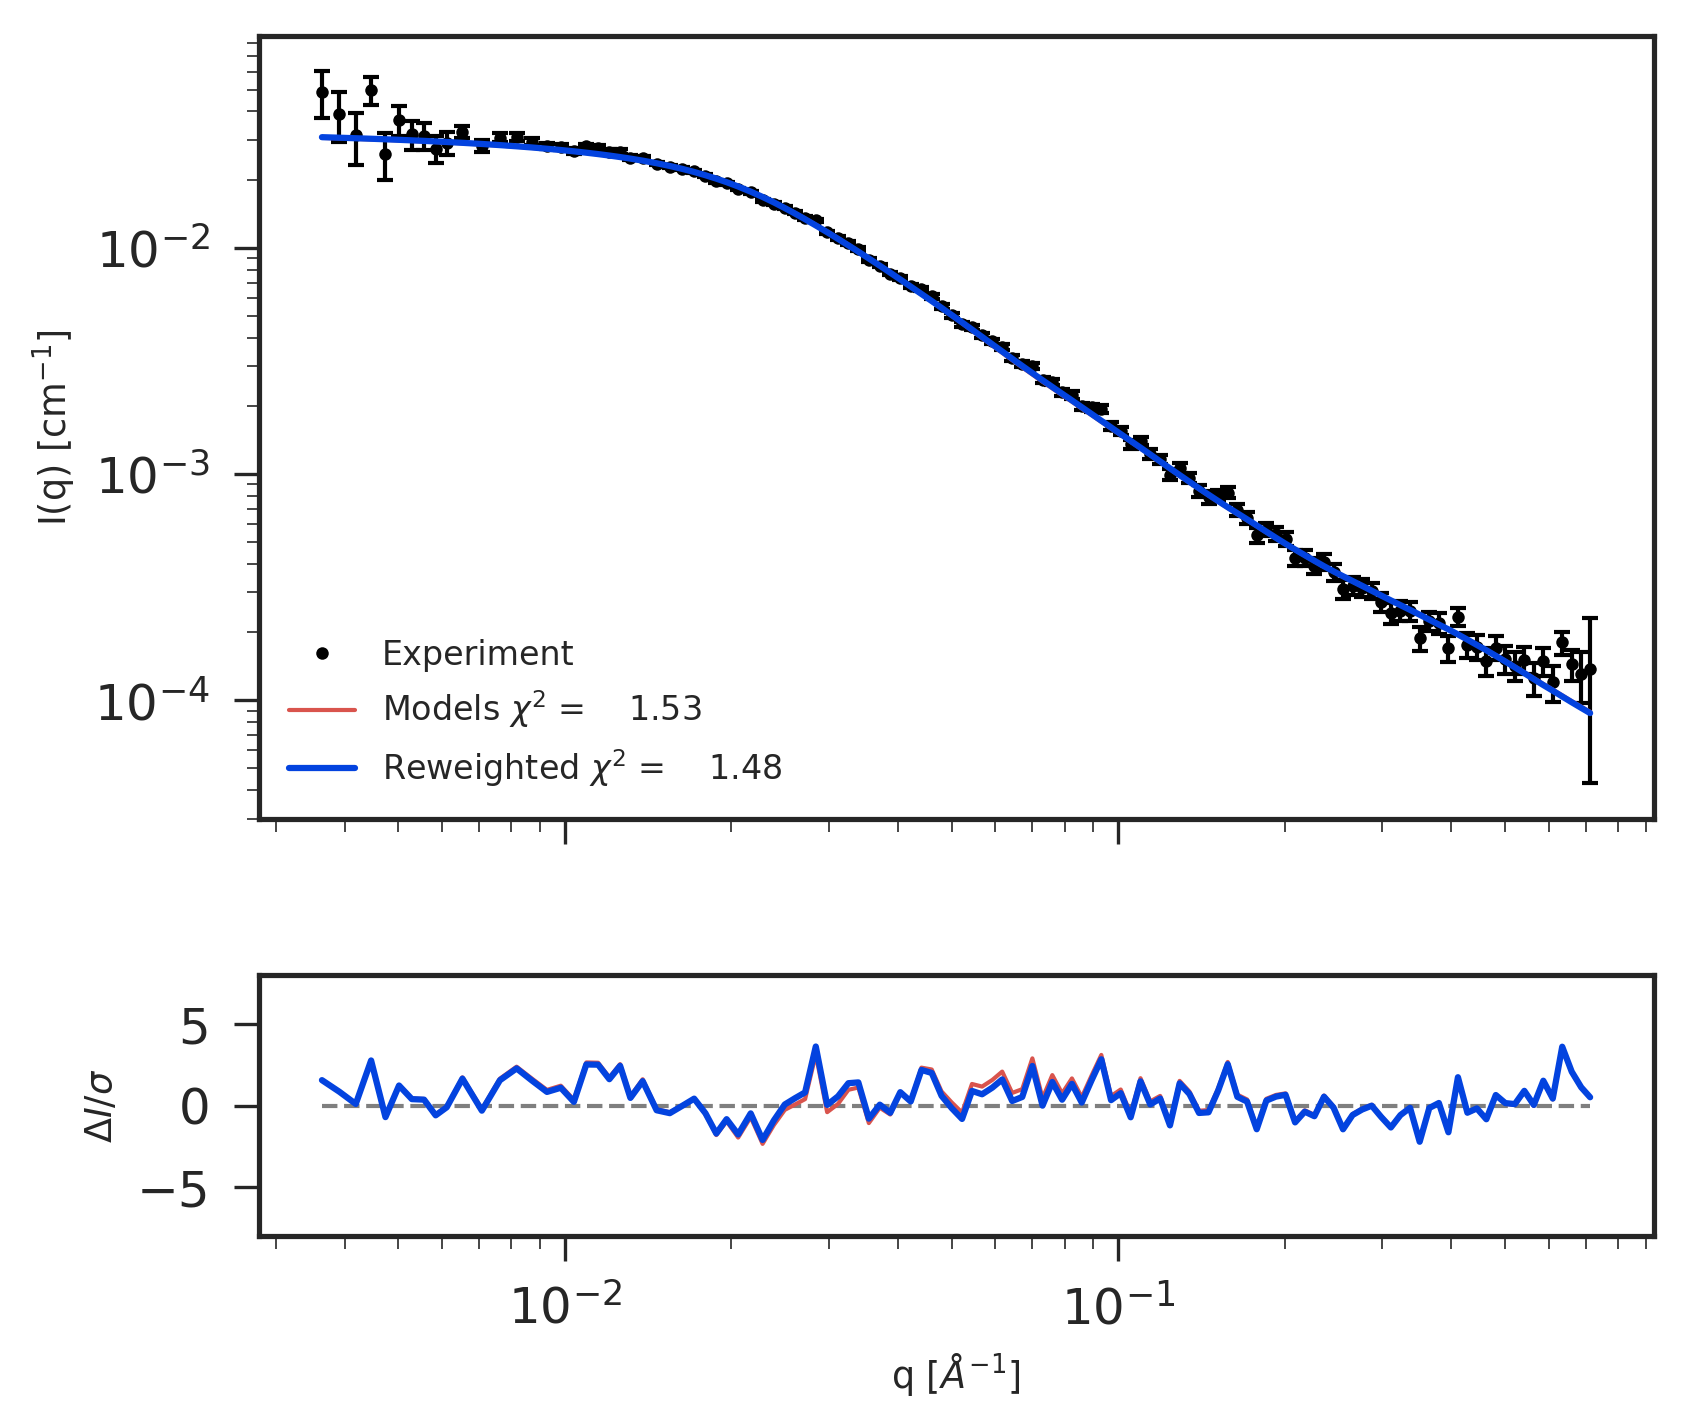

In [37]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_3_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_ub_pws10_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.6421e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.3411e-04
# theta: 400.0
# theta: 800.0
# theta: 1200.0
# theta: 1600.0
# theta: 2000
# theta: 2400.0
# theta: 3200


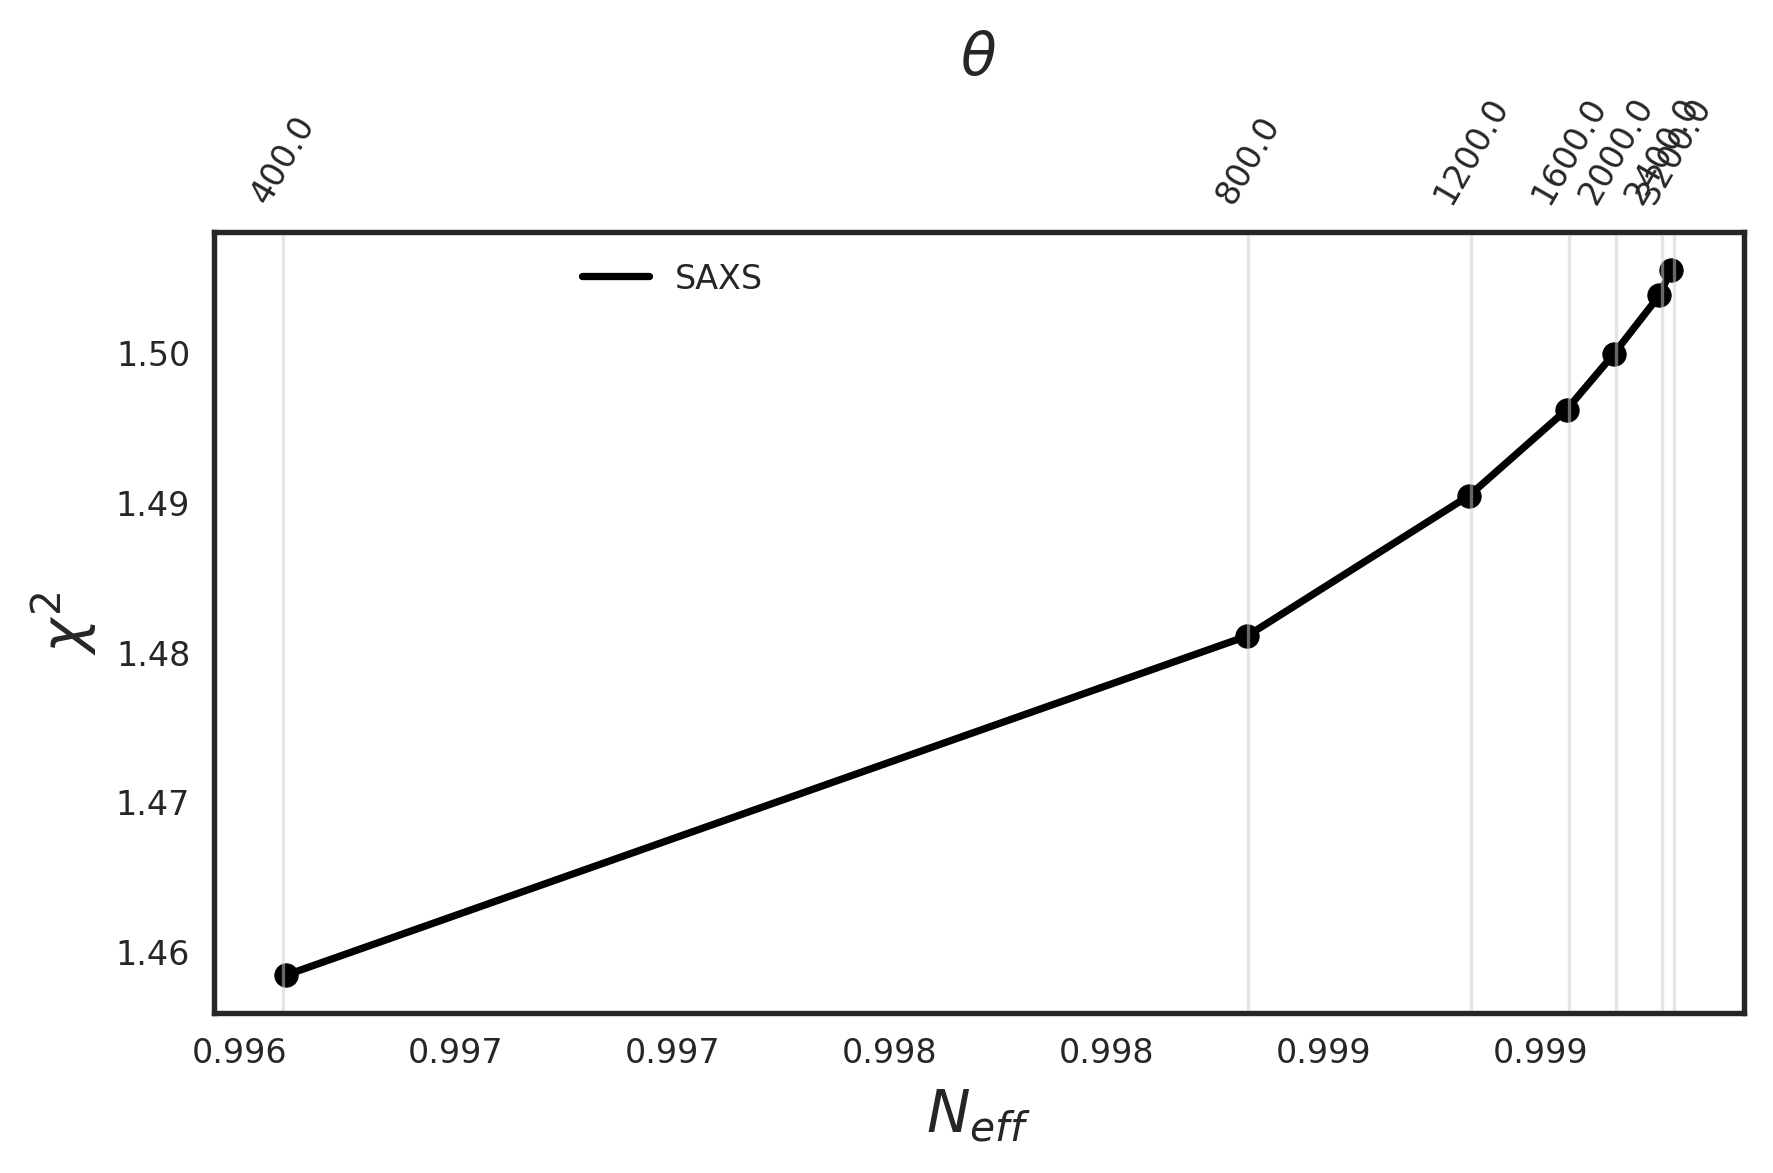

# theta: 800
# CHI2_re before minimization:       1.5262
# CHI2_re after minimization:        1.4811
# Fraction of effective frames:      0.9988


In [33]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/ub_pws10_Rg_1ns.dat',usecols=1)
#print(Rg)
RgExp =65
RgExpe =0.69

#exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07_qmin_ABGRCM.dat'
#calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws10_q07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/ub_pws10_q07_qminABGRCM.dat'

### initialize reweighting class


rew = bme.Reweight()
### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [400.,800.,1200.,1600.,2000,2400.,3200]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS 
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
#ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%4.3f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [400,800,1200,1600,2000,2400,3200]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_ub_pws10_Theta_Neff_1p14_q07_qminABGRCM.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=800)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

ubpws10_chi2_before = chi2_before
ubpws10_chi2_after = chi2_after

In [34]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =5
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=800

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_qminABGRCM_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_qminABGRCM_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.4824e-04
# Warning: expt average             0.660388=1.4400e-04 is larger than maximum value in simulation 1.4291e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.2717e-04
# theta: 800
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.4864e-04
# Warning: expt average             0.660388=1.4400e-04 is larger than maximum value in simulation 1.3816e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.2697e-04
# theta: 800
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.4798e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.3237e-04
# theta: 800
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum va

IndexError: index 5209 is out of bounds for axis 0 with size 5209

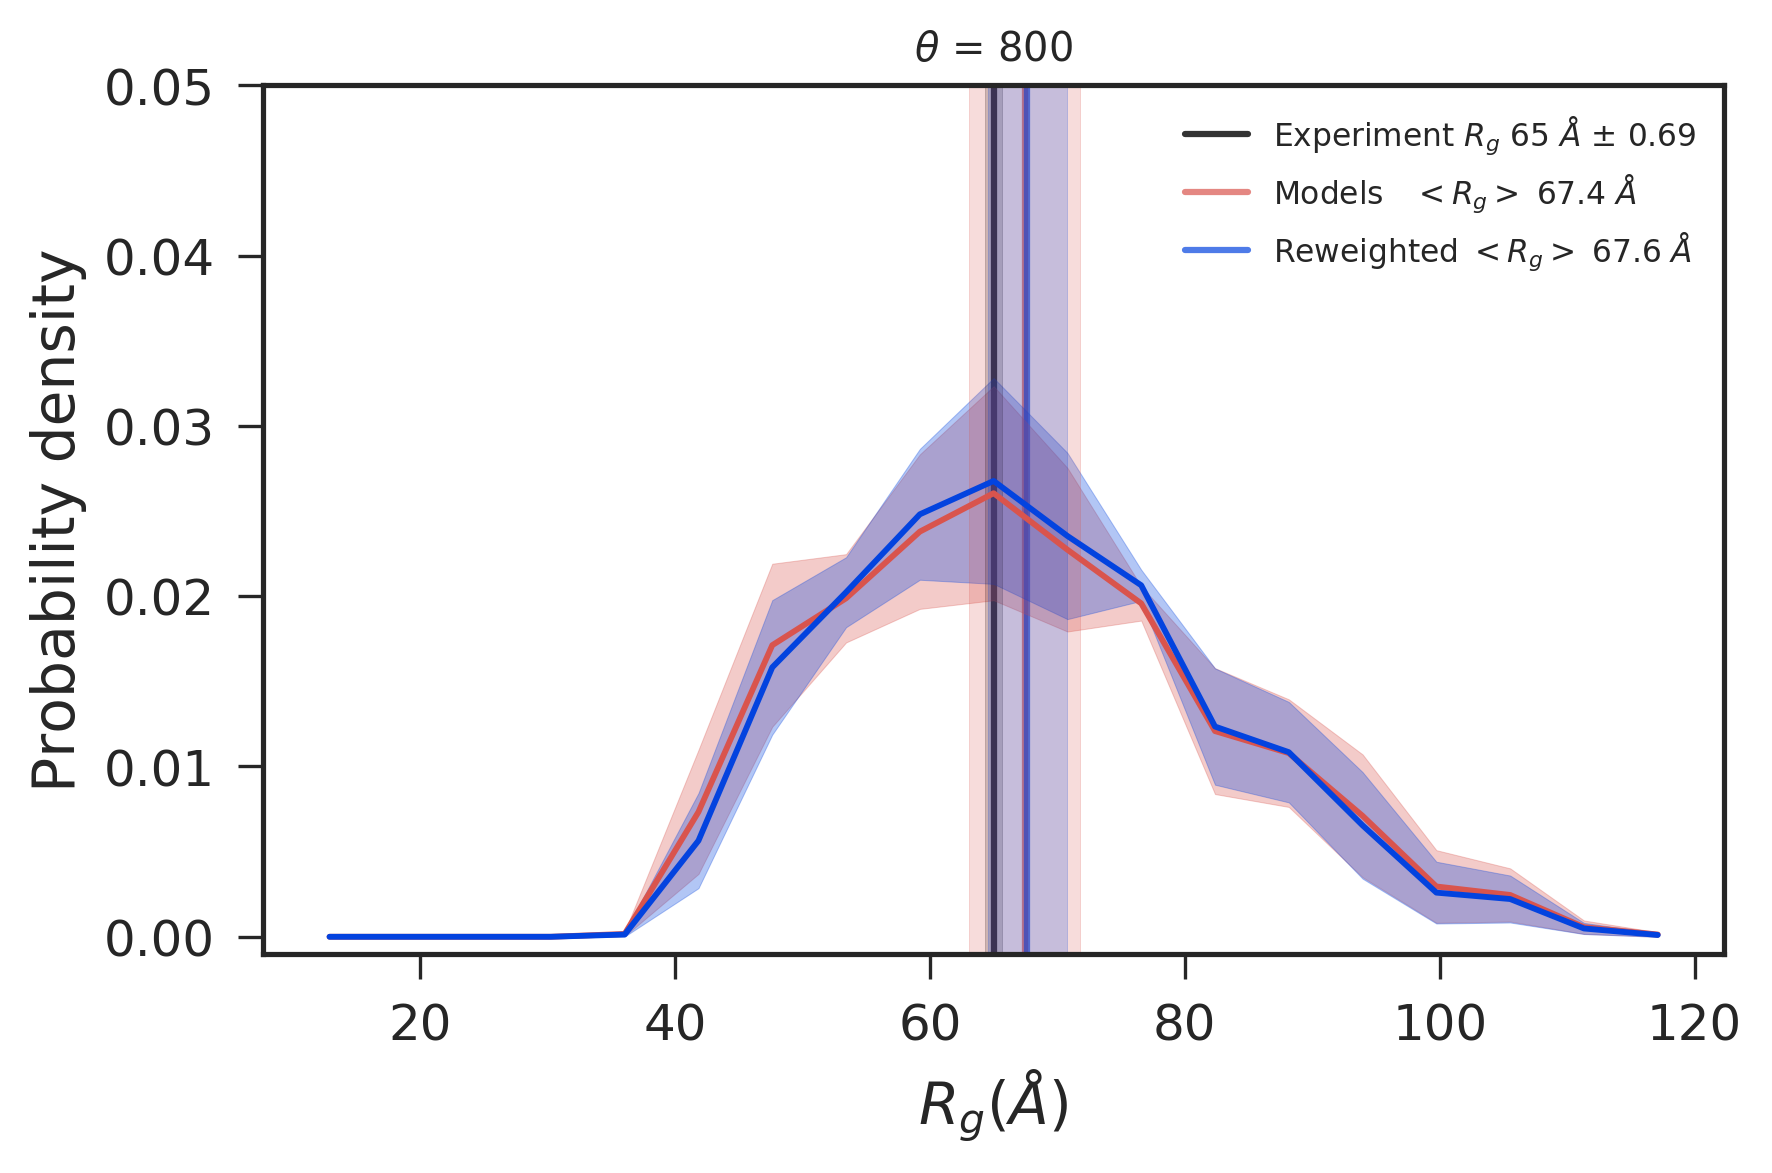

In [38]:
## Rg histograms

## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,120,20)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_qminABGRCM_{}_weights.dat'.format(j), usecols=1)
    Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
    
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65.0+0.69, alpha=0.2, color=c1)

plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )

ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(-0.001,0.05)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_ub_pws10_Th800_1p14_q07_qminABGRCM_.pdf', format = 'pdf', dpi=300)
plt.show()

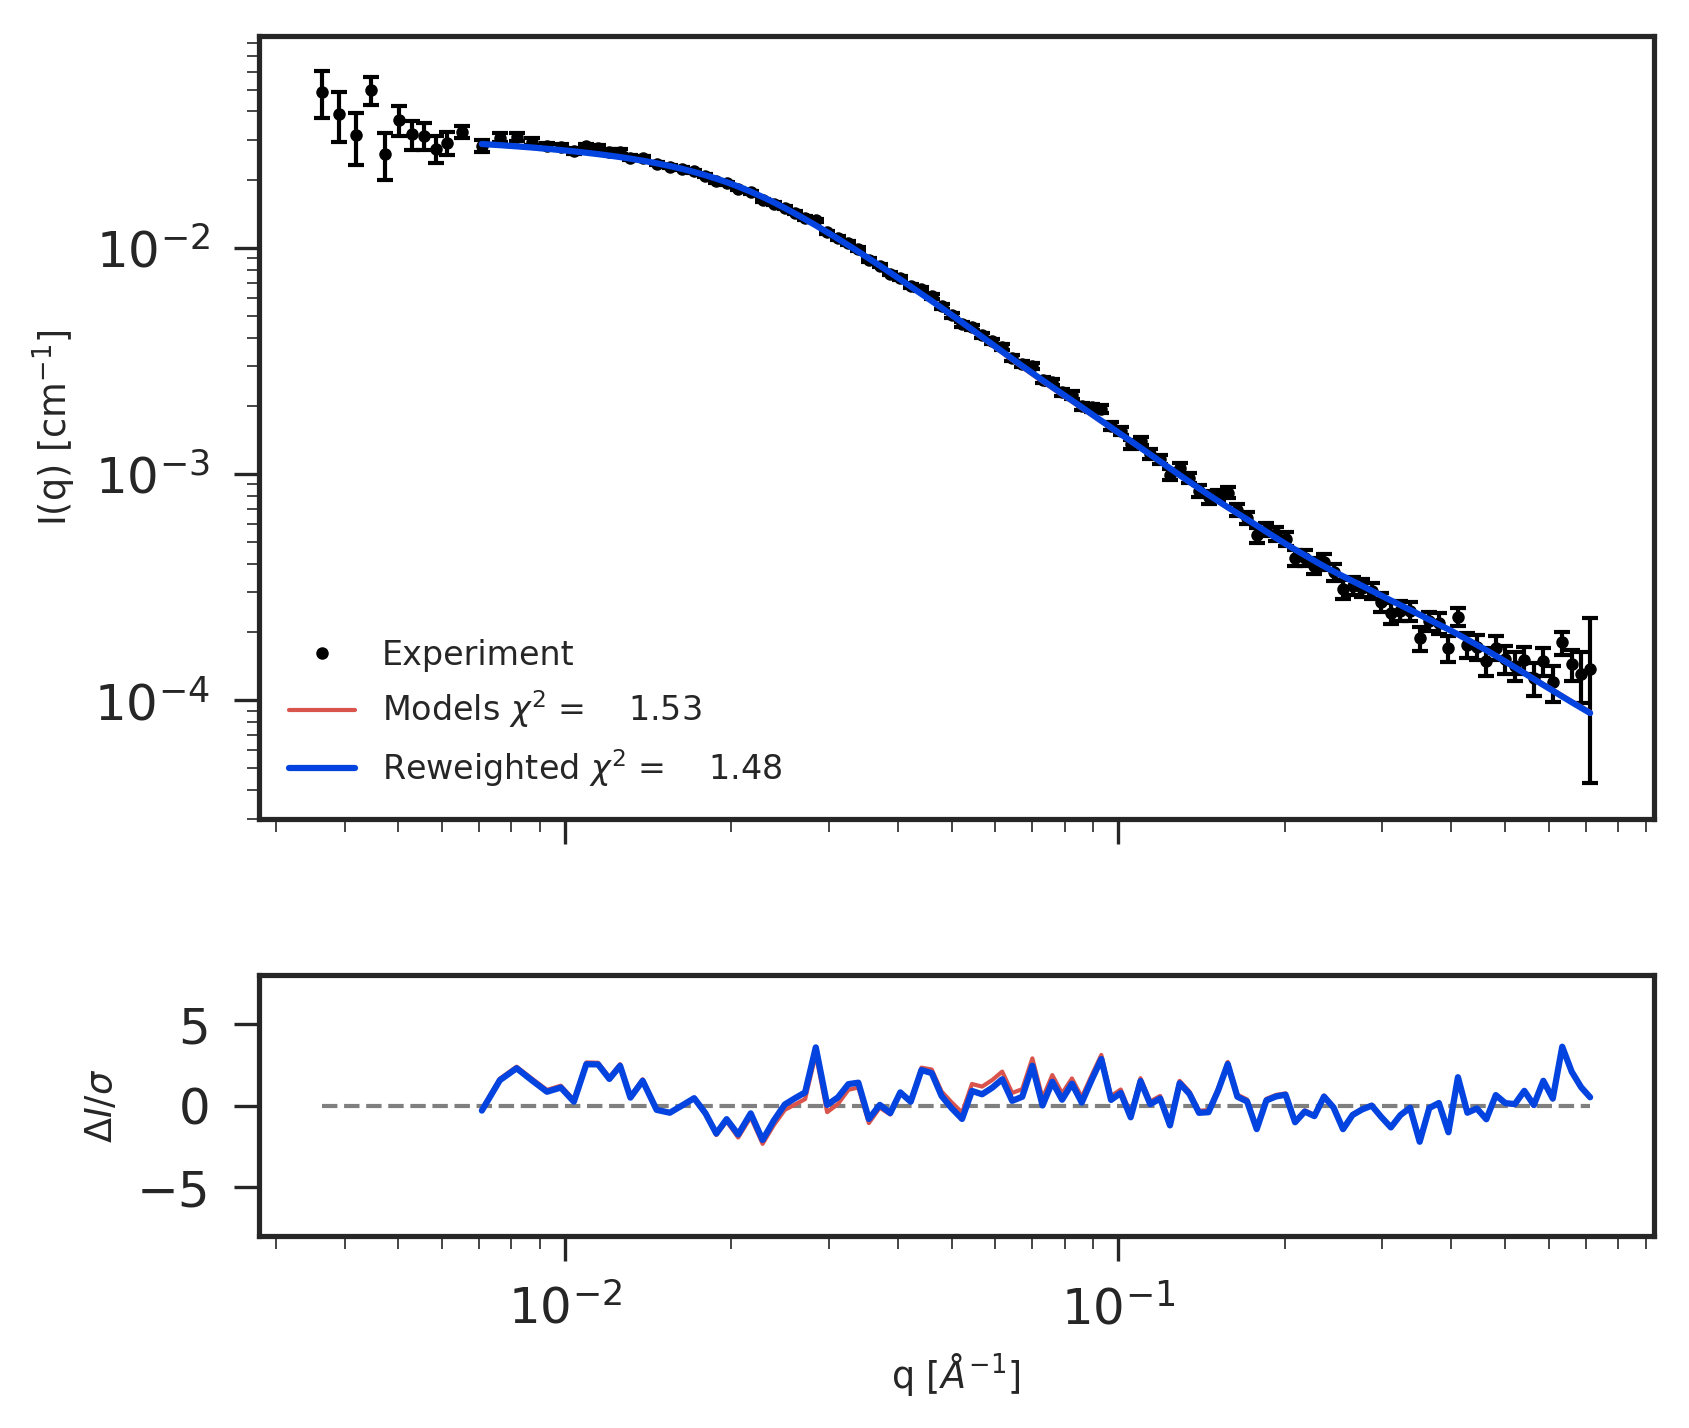

In [39]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/ubpws10_q07_qminABGRCM_3_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_ub_pws10_Th800_1p14_q07_qminABGRCM_f.pdf', format = 'pdf', dpi=300)
plt.show()

## BME MD_Rg pws 10 - 15

### MD_Rg pws 10

# Set non-uniform initial weights from file. Sum= 1547.61185089 10115
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.6749e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.4770e-04
# Warning: expt average             0.660388=1.4400e-04 is larger than maximum value in simulation 1.4003e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.3296e-04
# theta: 50.0
# theta: 200.0
# theta: 400.0
# theta: 800.0
# theta: 1600.0
# theta: 3200.0
# theta: 5000


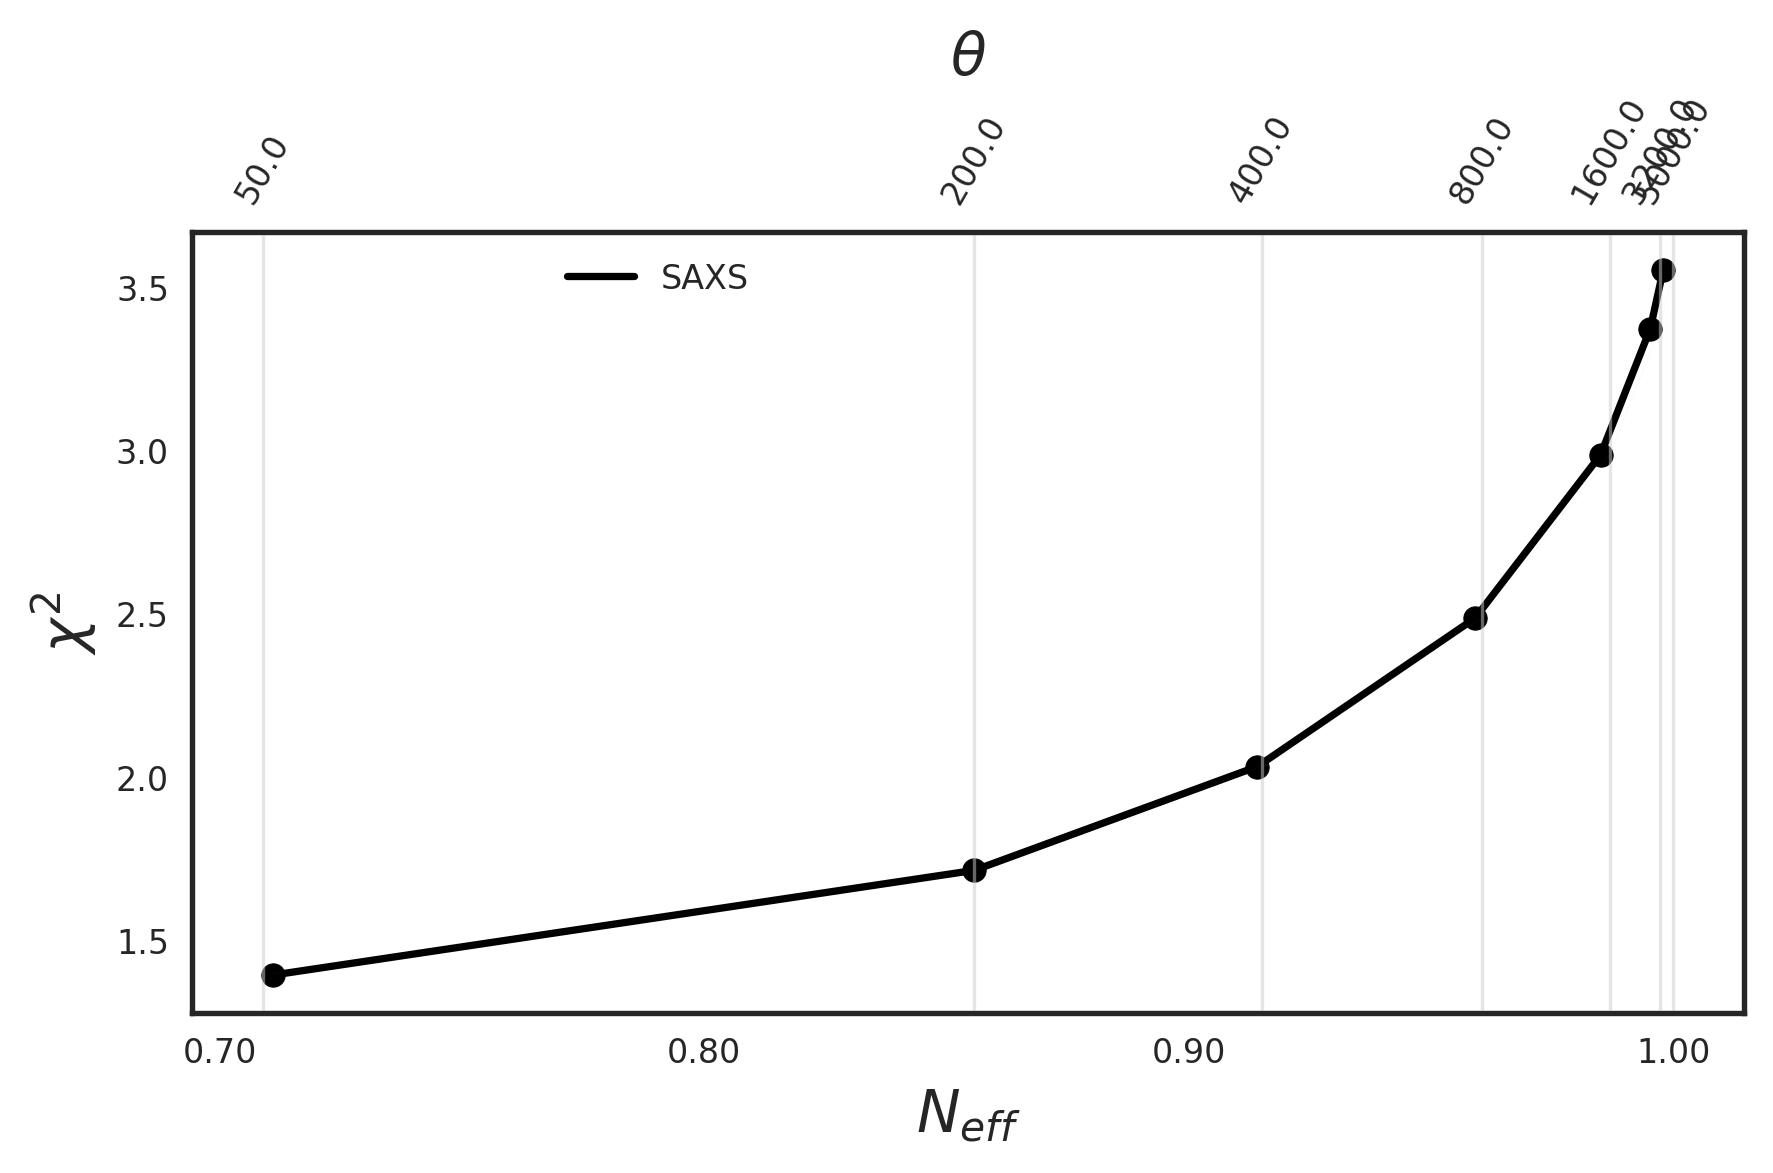

# theta: 800
# CHI2_re before minimization:       3.9408
# CHI2_re after minimization:        2.4867
# Fraction of effective frames:      0.9590


In [23]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws10/bm/BME/Rg_pws10_1ns.dat')
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws10_q07.dat'

### initialize reweighting class

#rew = bme.Reweight()

# initialize reweighting class with weights                                                                                                                                
w0 =np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws10/bm/BME/pws10_weights.dat')
rew = bme.Reweight(w0=list(w0))

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [50.,200.,400.,800.,1600.,3200.,5000]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS and Rh
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.2f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [50,200,400,800,1600,3200,5000]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_RgMetaD_pws10_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=800)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

mdpws10_chi2_before = chi2_before
mdpws10_chi2_after = chi2_after

In [24]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=800

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws10q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws10q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.6749e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.4770e-04
# Warning: expt average             0.660388=1.4400e-04 is larger than maximum value in simulation 1.4003e-04
# Warning: expt average             0.712962=1.3700e-04 is larger than maximum value in simulation 1.3296e-04
# theta: 800


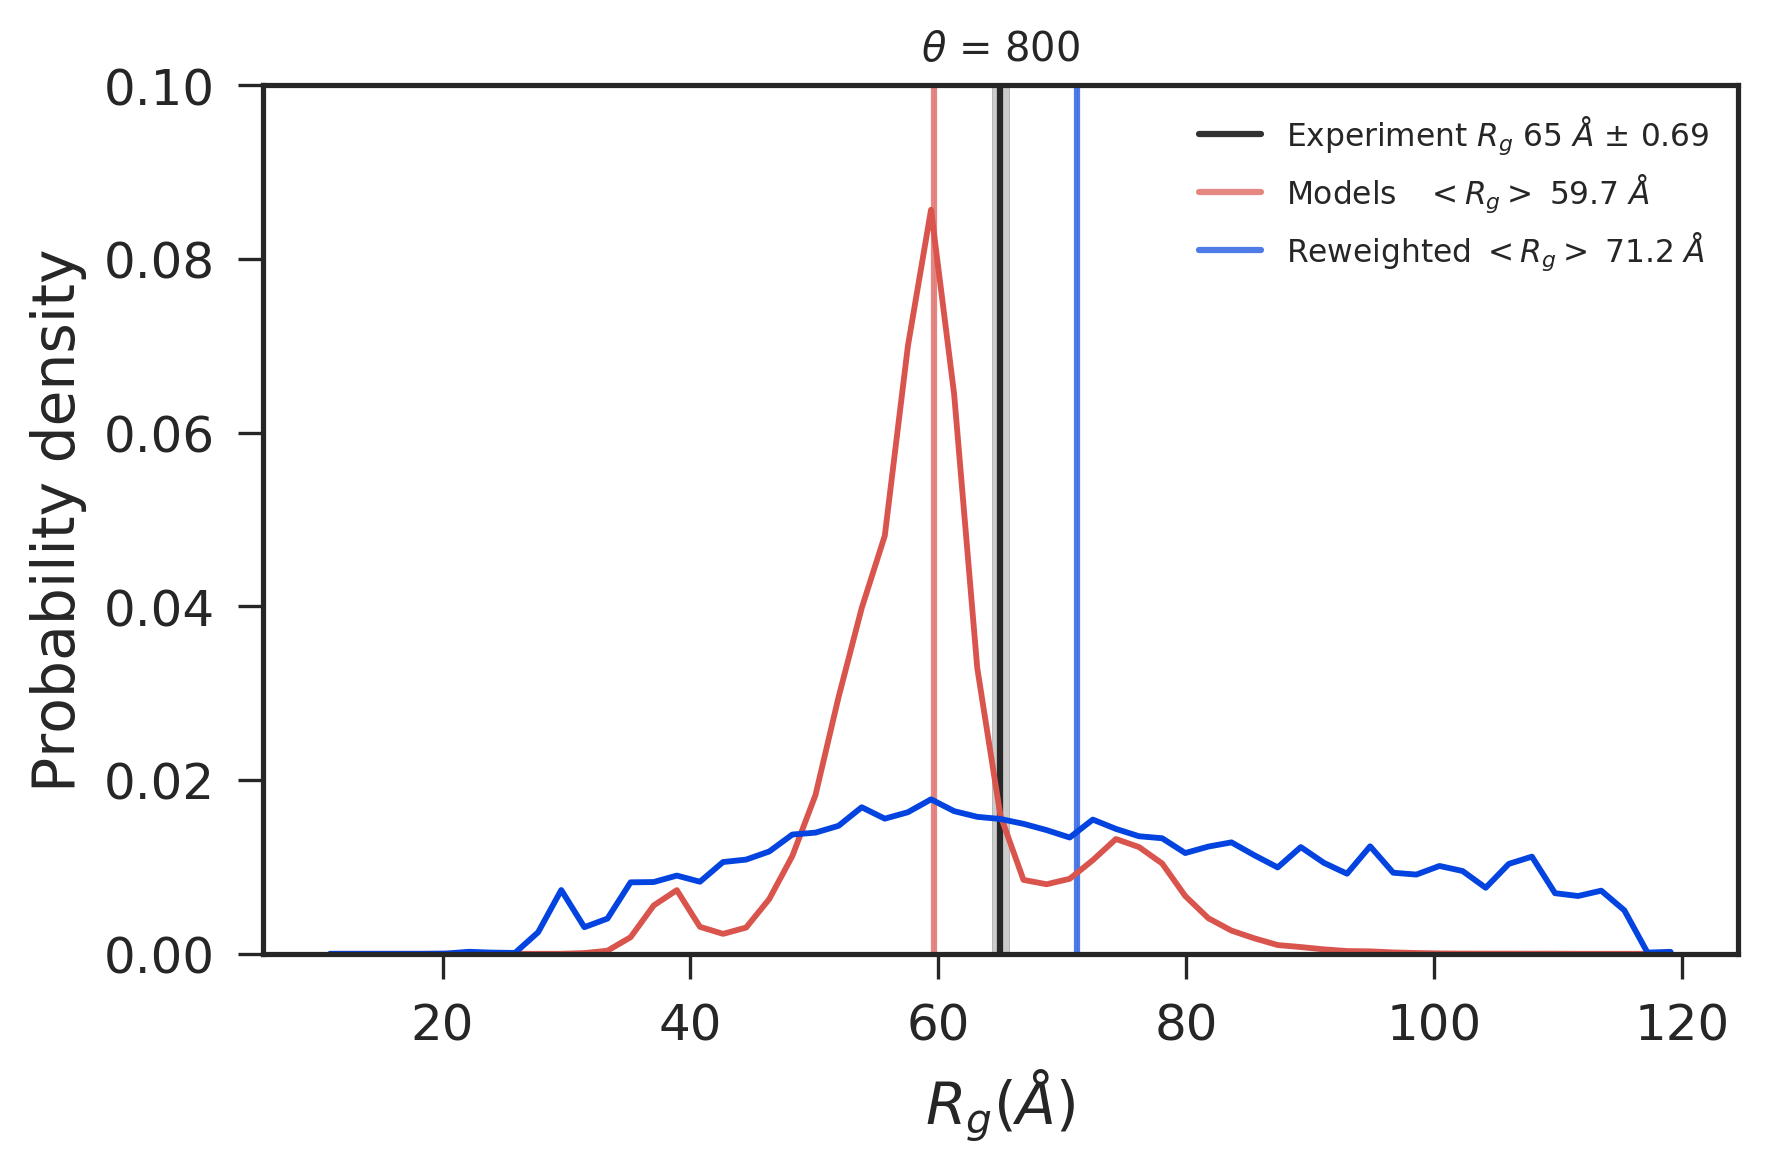

In [25]:
## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
#ax.xaxis.set_minor_formatter(ticker.NullFormatter())

#starty, end = ax.get_ylim()
#startx, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(starty, end, 1))
#ax.xaxis.set_ticks(np.arange(startx, end, 5))

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,120,60)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws10q07_{}_weights.dat'.format(j), usecols=1)
    weights2=np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws10/bm/BME/pws10_weights.dat')
    w=weights2[j*binsize:(j+1)*binsize]
    #print (w)
    Rgb =np.average(data[j*binsize:(j+1)*binsize],weights=w)
    #Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    #Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    Rga =np.average(data[j*binsize:(j+1)*binsize],weights=weights)
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=w)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65+0.69, alpha=0.2, color=c1)
#ax.axvspan(RhExp-1.1,21.5+1.1, alpha=0.2, color=c1)
plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )
#plt.axvline(RhExp,ls='--',color=c1,alpha=0.8,lw=1.5,
            #zorder=0,label='Experiment $R_h$  21.5 $\AA$ $\pm$ 1.1' )
ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(0,0.1)
#plt.grid(alpha=0.2)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_RgMetaD_pws10_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

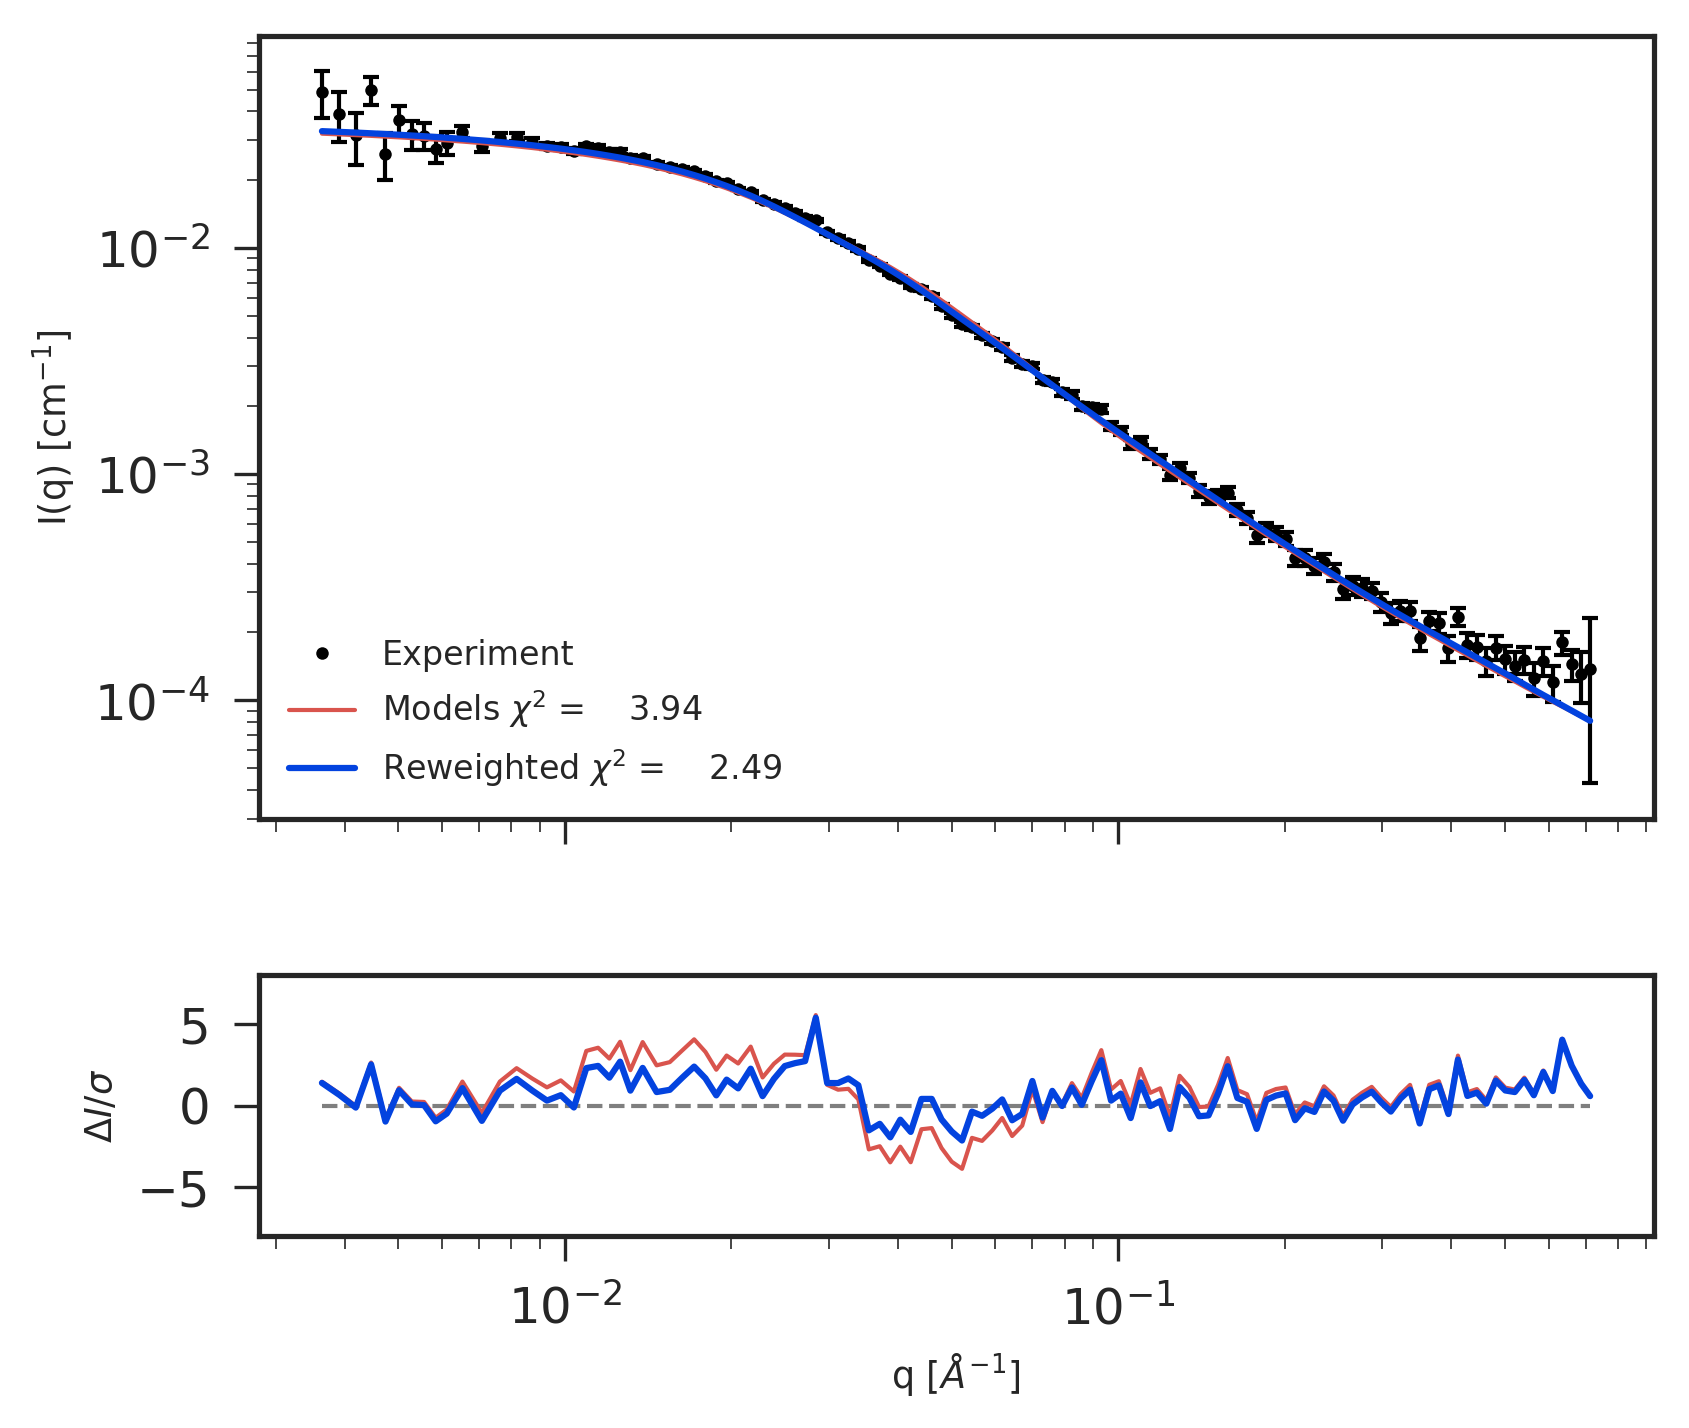

In [26]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws10q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_RgMetaD_pws10_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

### MD_Rg pws 11

# Set non-uniform initial weights from file. Sum= 1803.76602369 10107
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.7321e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.5385e-04
# theta: 50.0
# theta: 200.0
# theta: 400.0
# theta: 800.0
# theta: 1200.0
# theta: 1600.0
# theta: 5000


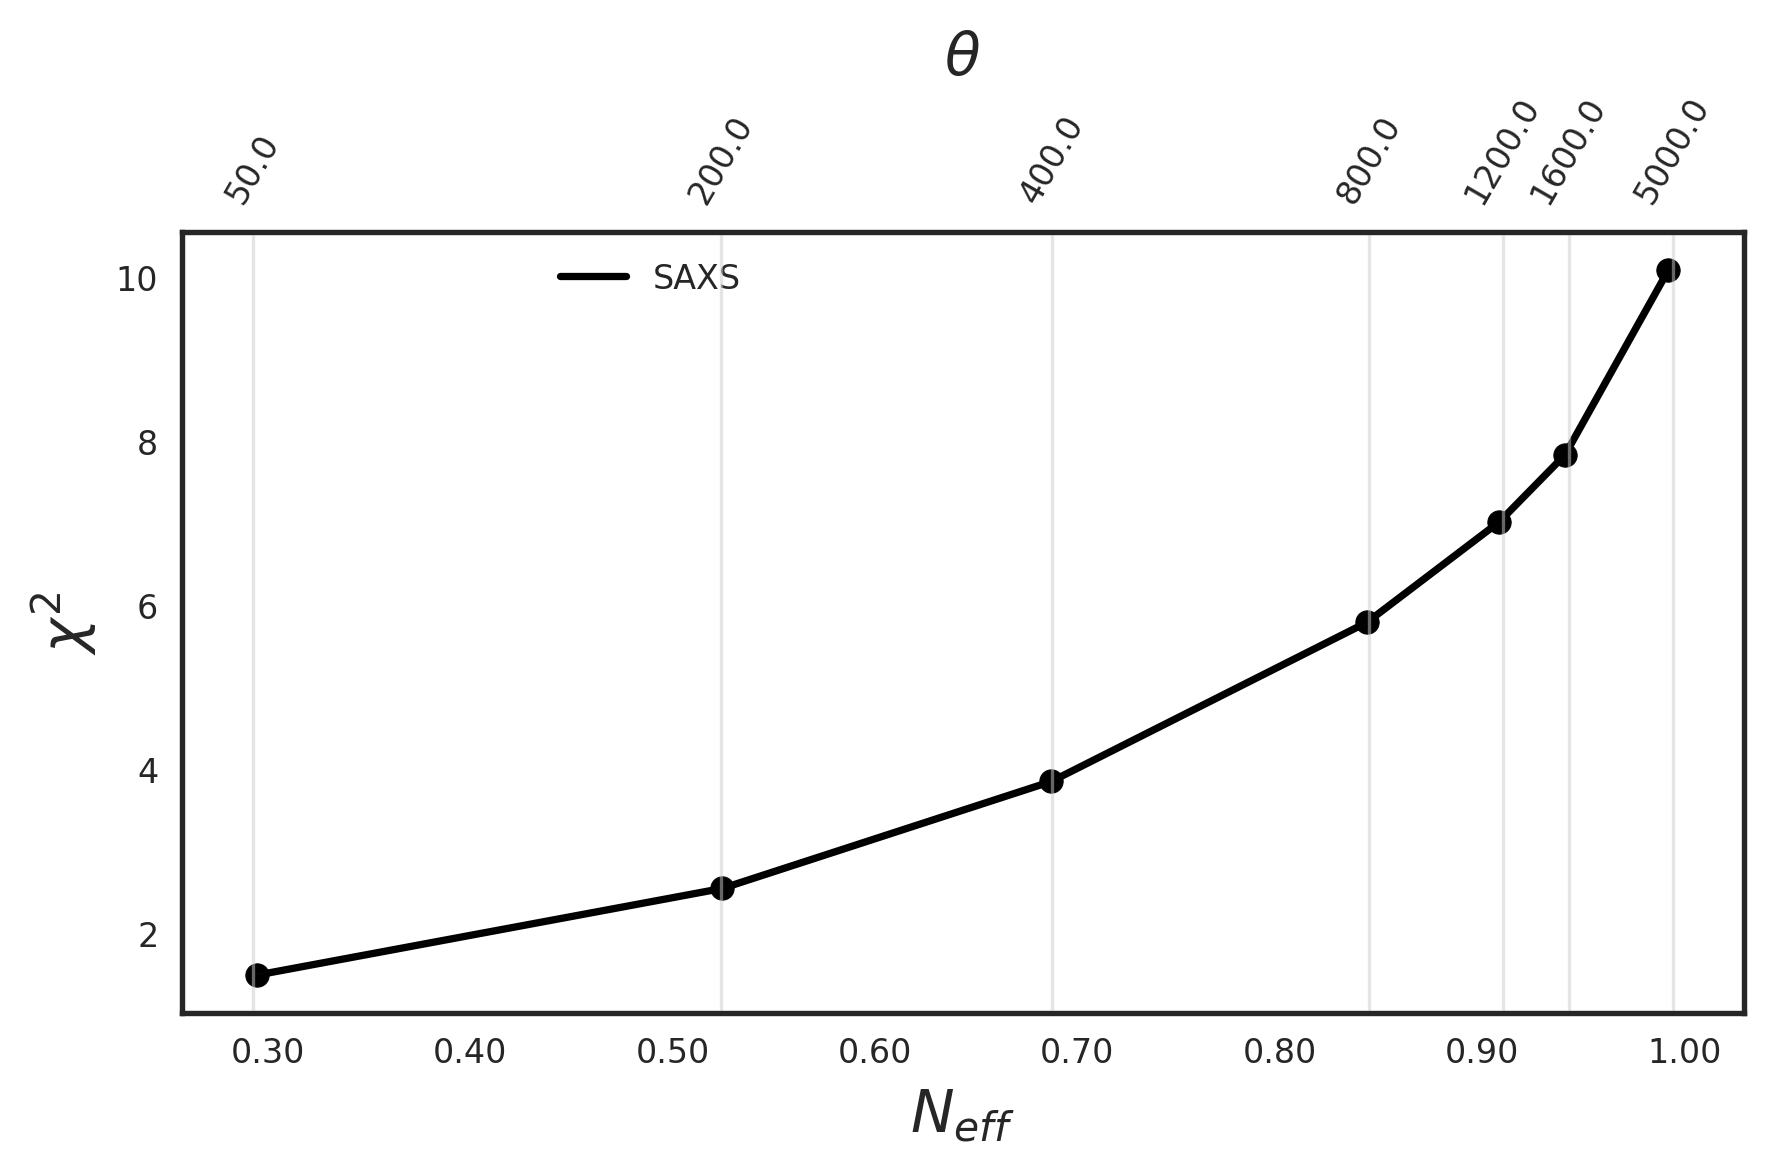

# theta: 1200
# CHI2_re before minimization:      11.4746
# CHI2_re after minimization:        7.0224
# Fraction of effective frames:      0.9087


In [27]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws11/bm/BME/Rg_pws11_1ns.dat')
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws11_q07.dat'

### initialize reweighting class

#rew = bme.Reweight()

# initialize reweighting class with weights                                                                                                                                
w0 =np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws11/bm/BME/pws11_weights.dat')
rew = bme.Reweight(w0=list(w0))

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [50.,200.,400.,800.,1200.,1600.,5000]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS and Rh
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.2f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [50,200,400,800,1200,1600,5000]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_RgMetaD_pws11_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=1200)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

mdpws11_chi2_before = chi2_before
mdpws11_chi2_after = chi2_after

In [28]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=1200

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws11q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws11q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.7321e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.5385e-04
# theta: 1200


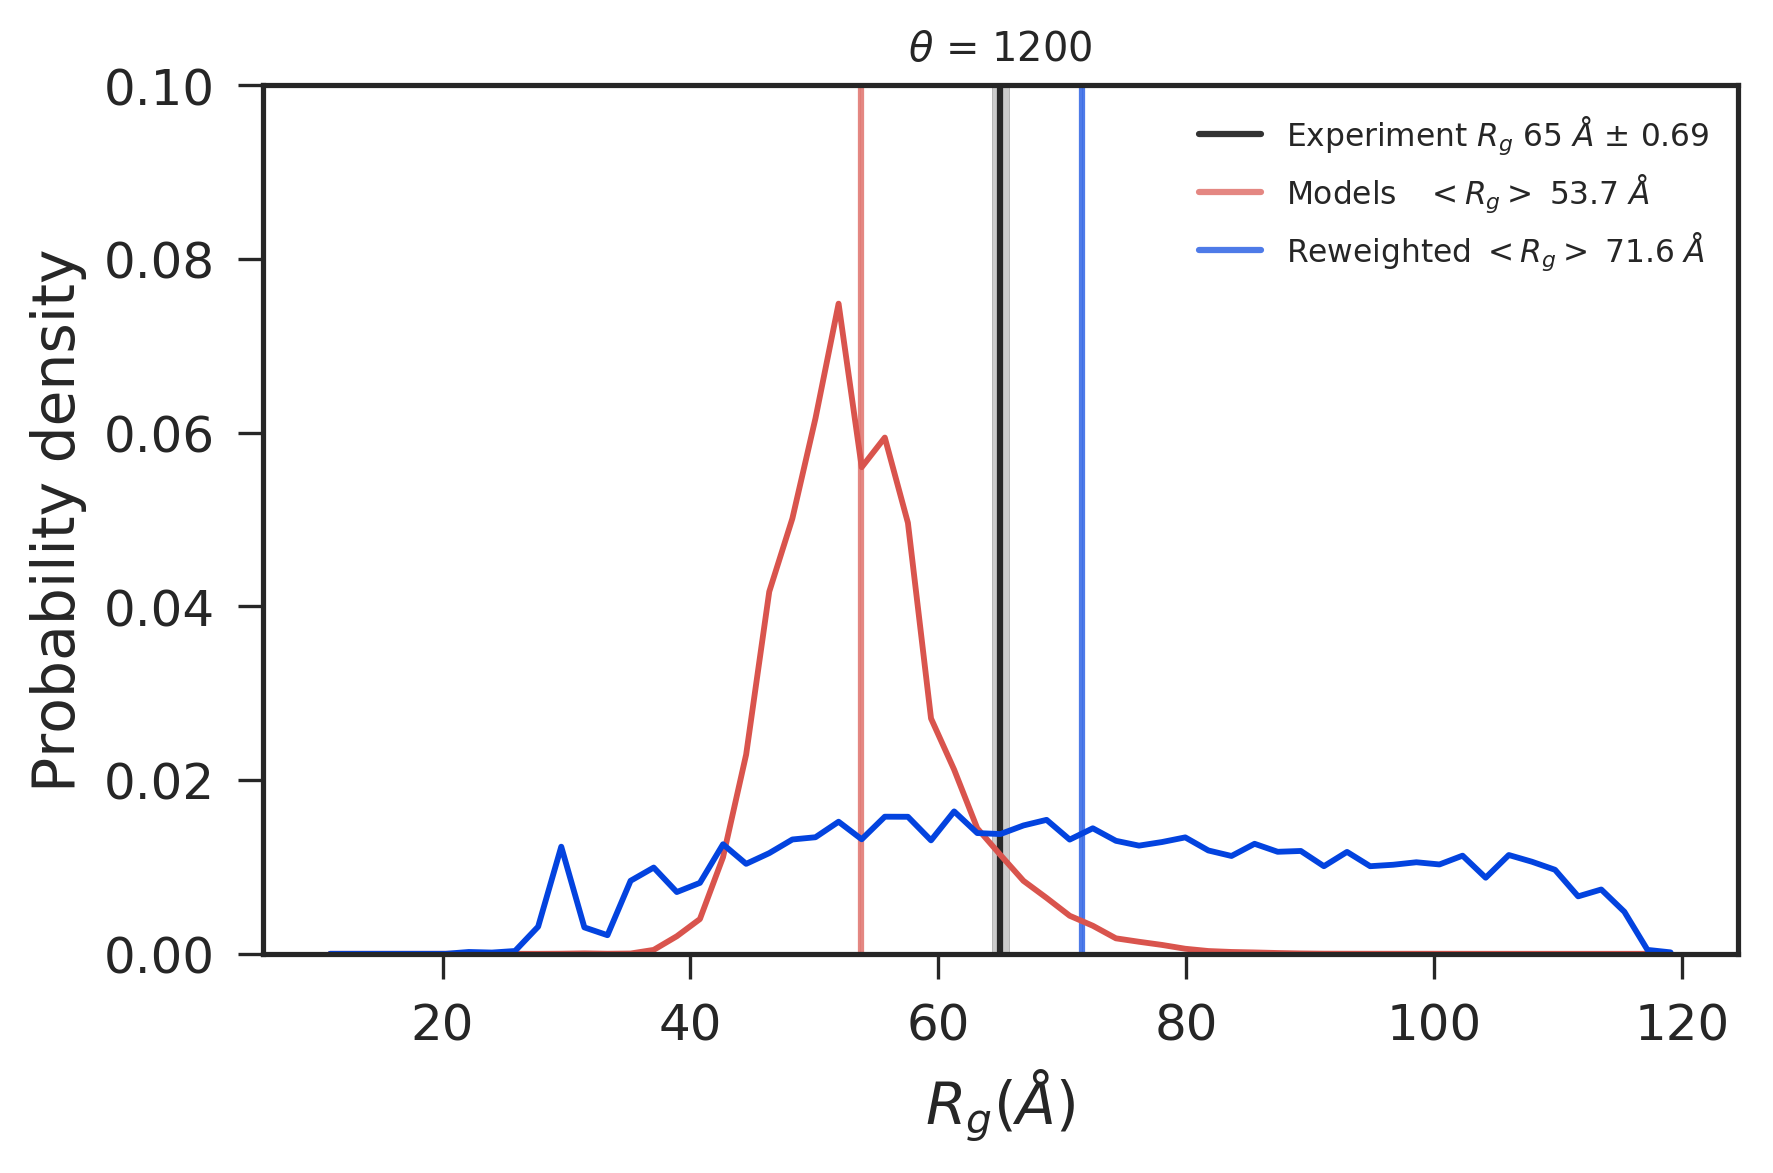

In [29]:
## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
#ax.xaxis.set_minor_formatter(ticker.NullFormatter())

#starty, end = ax.get_ylim()
#startx, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(starty, end, 1))
#ax.xaxis.set_ticks(np.arange(startx, end, 5))

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,120,60)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws11q07_{}_weights.dat'.format(j), usecols=1)
    weights2=np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws11/bm/BME/pws11_weights.dat')
    w=weights2[j*binsize:(j+1)*binsize]
    #print (w)
    Rgb =np.average(data[j*binsize:(j+1)*binsize],weights=w)
    #Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    #Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    Rga =np.average(data[j*binsize:(j+1)*binsize],weights=weights)
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=w)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65+0.69, alpha=0.2, color=c1)
#ax.axvspan(RhExp-1.1,21.5+1.1, alpha=0.2, color=c1)
plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )
#plt.axvline(RhExp,ls='--',color=c1,alpha=0.8,lw=1.5,
            #zorder=0,label='Experiment $R_h$  21.5 $\AA$ $\pm$ 1.1' )
ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(0,0.1)
#plt.grid(alpha=0.2)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_RgMetaD_pws11_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

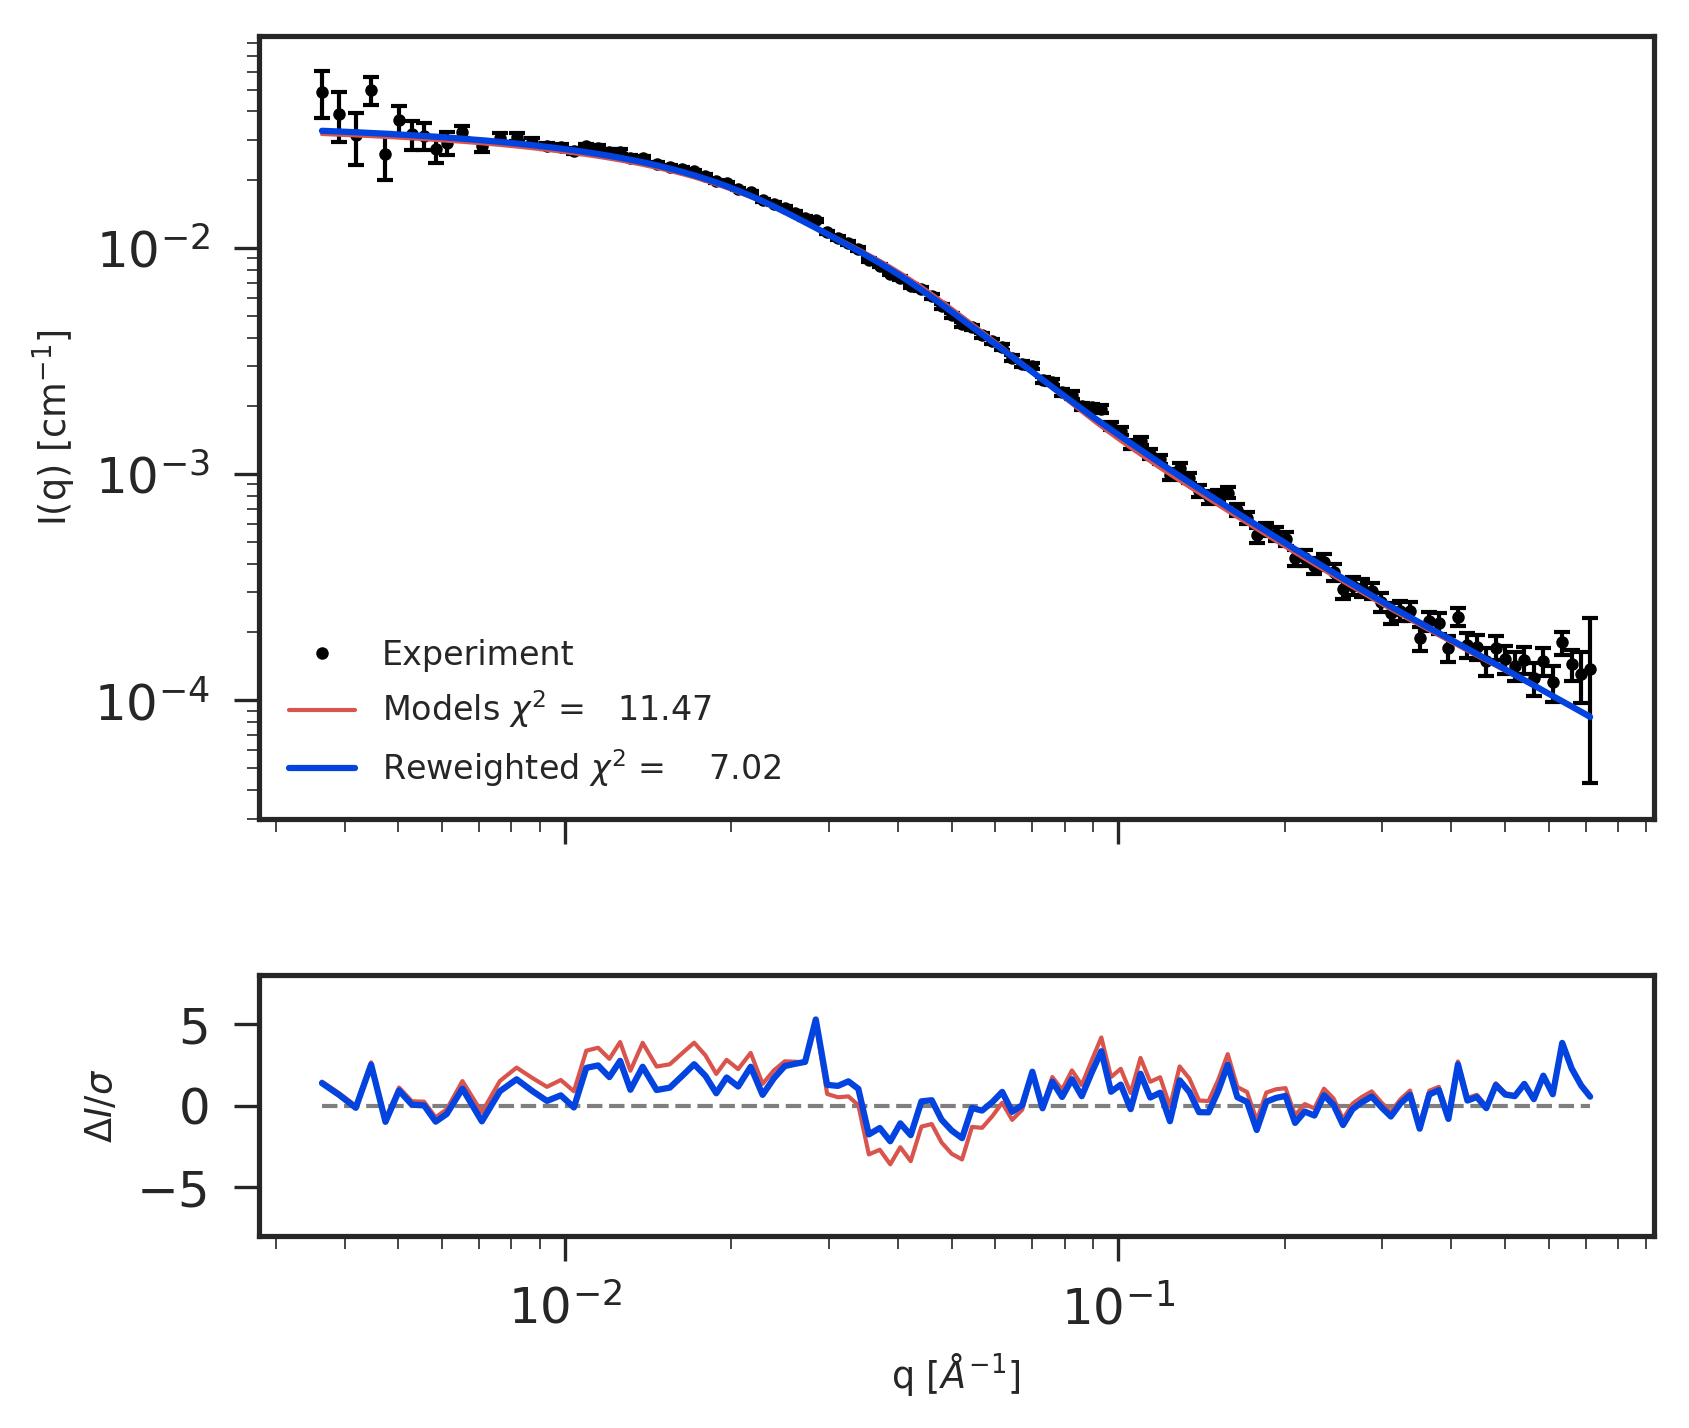

In [30]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws11q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_RgMetaD_pws11_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

### MD_Rg pws 12

# Set non-uniform initial weights from file. Sum= 3877.40851703 10092
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.9550e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.6375e-04
# theta: 50.0
# theta: 200.0
# theta: 400.0
# theta: 800.0
# theta: 1200.0
# theta: 1600.0
# theta: 5000


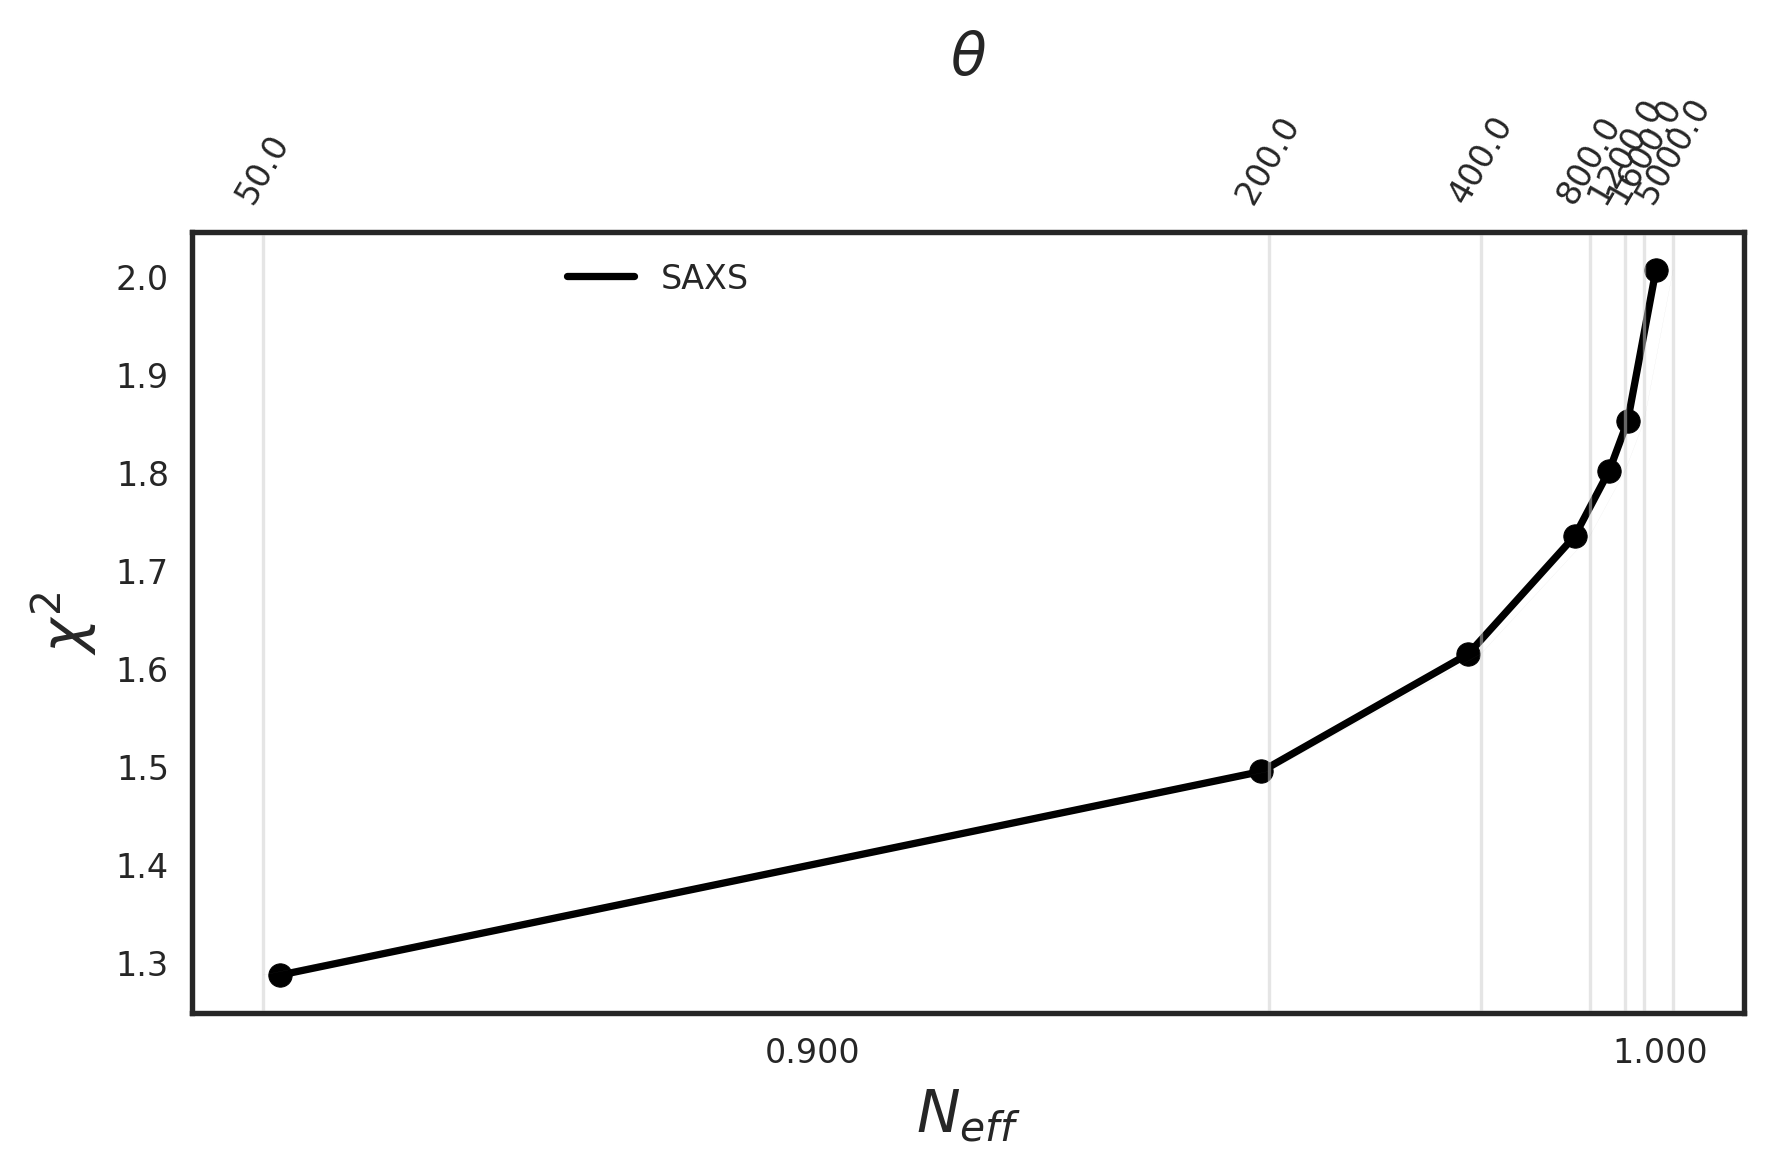

# theta: 800
# CHI2_re before minimization:       2.1035
# CHI2_re after minimization:        1.7349
# Fraction of effective frames:      0.9899


In [31]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws12/bm/BME/Rg_pws12_1ns.dat')
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws12_q07.dat'

### initialize reweighting class

#rew = bme.Reweight()

# initialize reweighting class with weights                                                                                                                                
w0 =np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws12/bm/BME/pws12_weights.dat')
rew = bme.Reweight(w0=list(w0))

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [50.,200.,400.,800.,1200.,1600.,5000]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS and Rh
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.3f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [50,200,400,800,1200,1600,5000]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_RgMetaD_pws12_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=800)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

mdpws12_chi2_before = chi2_before
mdpws12_chi2_after = chi2_after

In [32]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=1200

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws12q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws12q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.9550e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.6375e-04
# theta: 1200


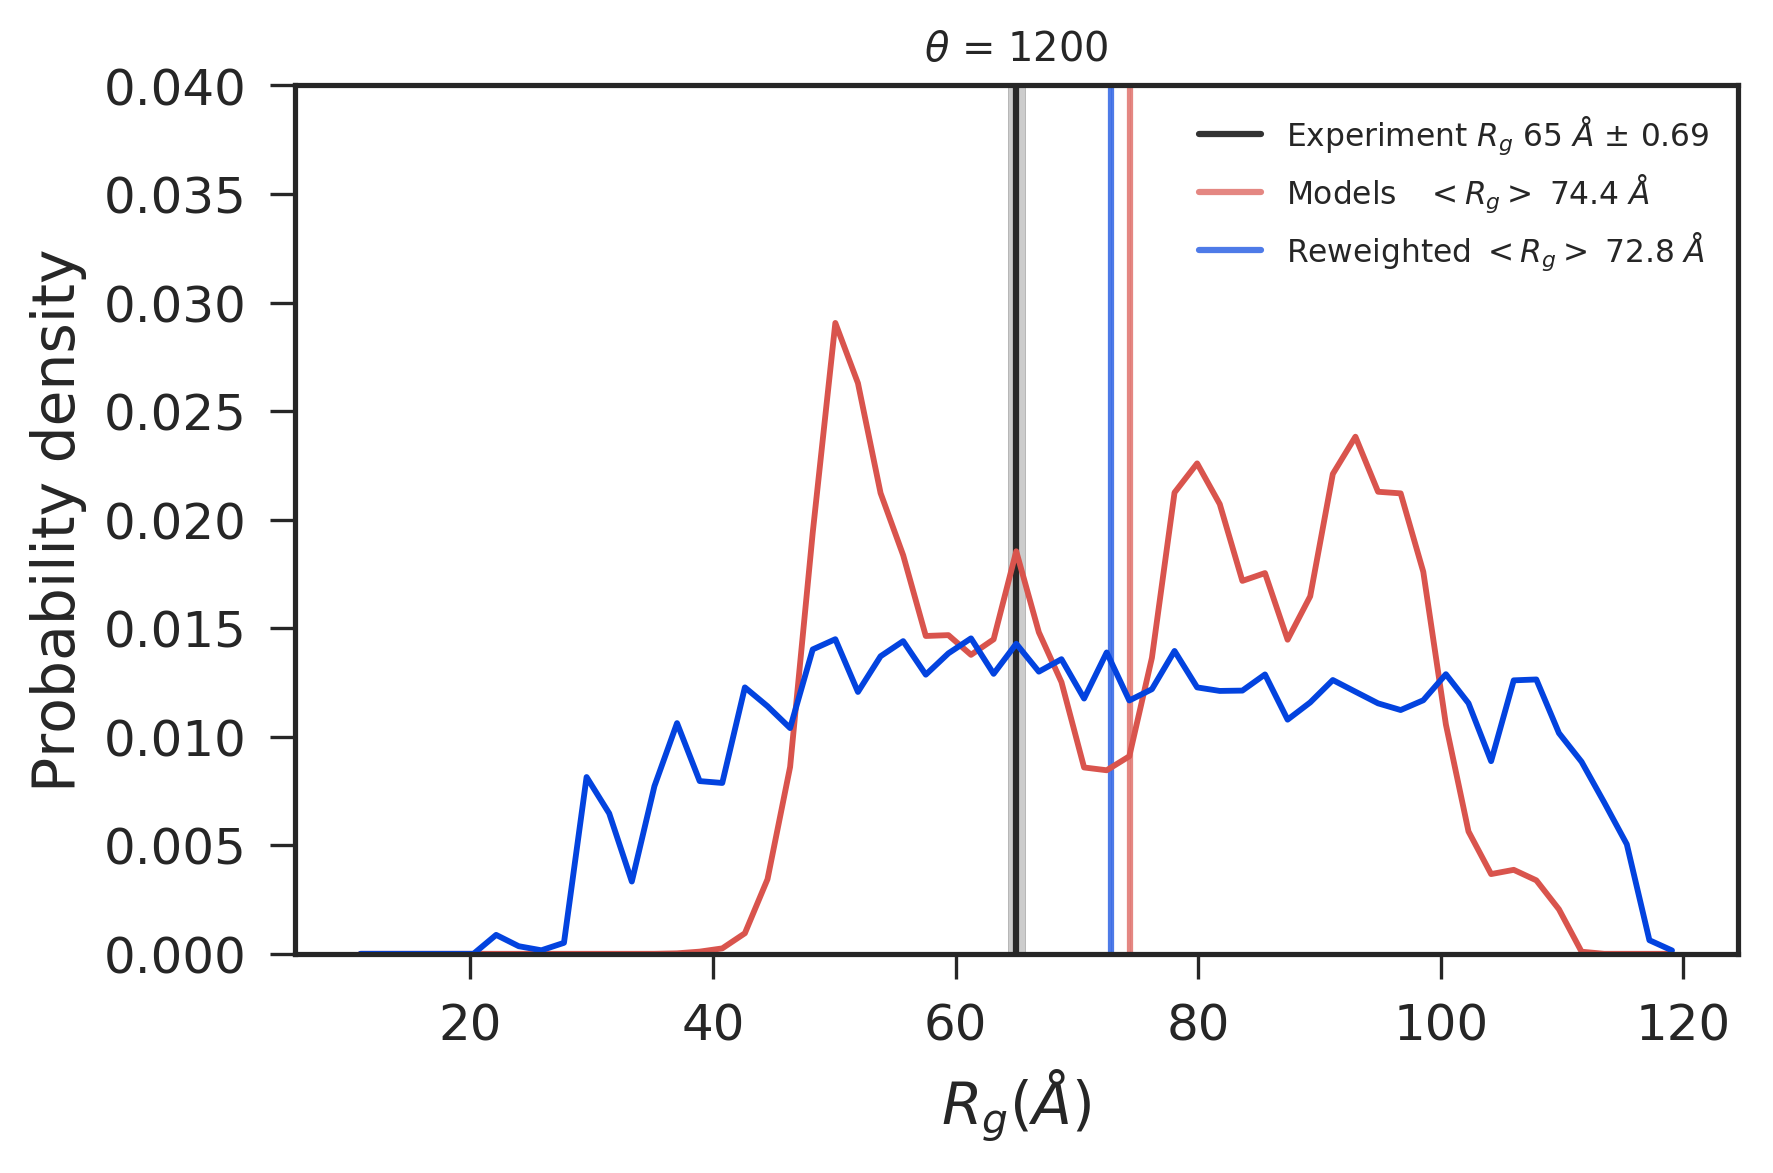

In [33]:
## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
#ax.xaxis.set_minor_formatter(ticker.NullFormatter())

#starty, end = ax.get_ylim()
#startx, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(starty, end, 1))
#ax.xaxis.set_ticks(np.arange(startx, end, 5))

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,120,60)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws12q07_{}_weights.dat'.format(j), usecols=1)
    weights2=np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws12/bm/BME/pws12_weights.dat')
    w=weights2[j*binsize:(j+1)*binsize]
    #print (w)
    Rgb =np.average(data[j*binsize:(j+1)*binsize],weights=w)
    #Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    #Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    Rga =np.average(data[j*binsize:(j+1)*binsize],weights=weights)
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=w)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65+0.69, alpha=0.2, color=c1)
#ax.axvspan(RhExp-1.1,21.5+1.1, alpha=0.2, color=c1)
plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )
#plt.axvline(RhExp,ls='--',color=c1,alpha=0.8,lw=1.5,
            #zorder=0,label='Experiment $R_h$  21.5 $\AA$ $\pm$ 1.1' )
ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(0,0.04)
#plt.grid(alpha=0.2)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_RgMetaD_pws12_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

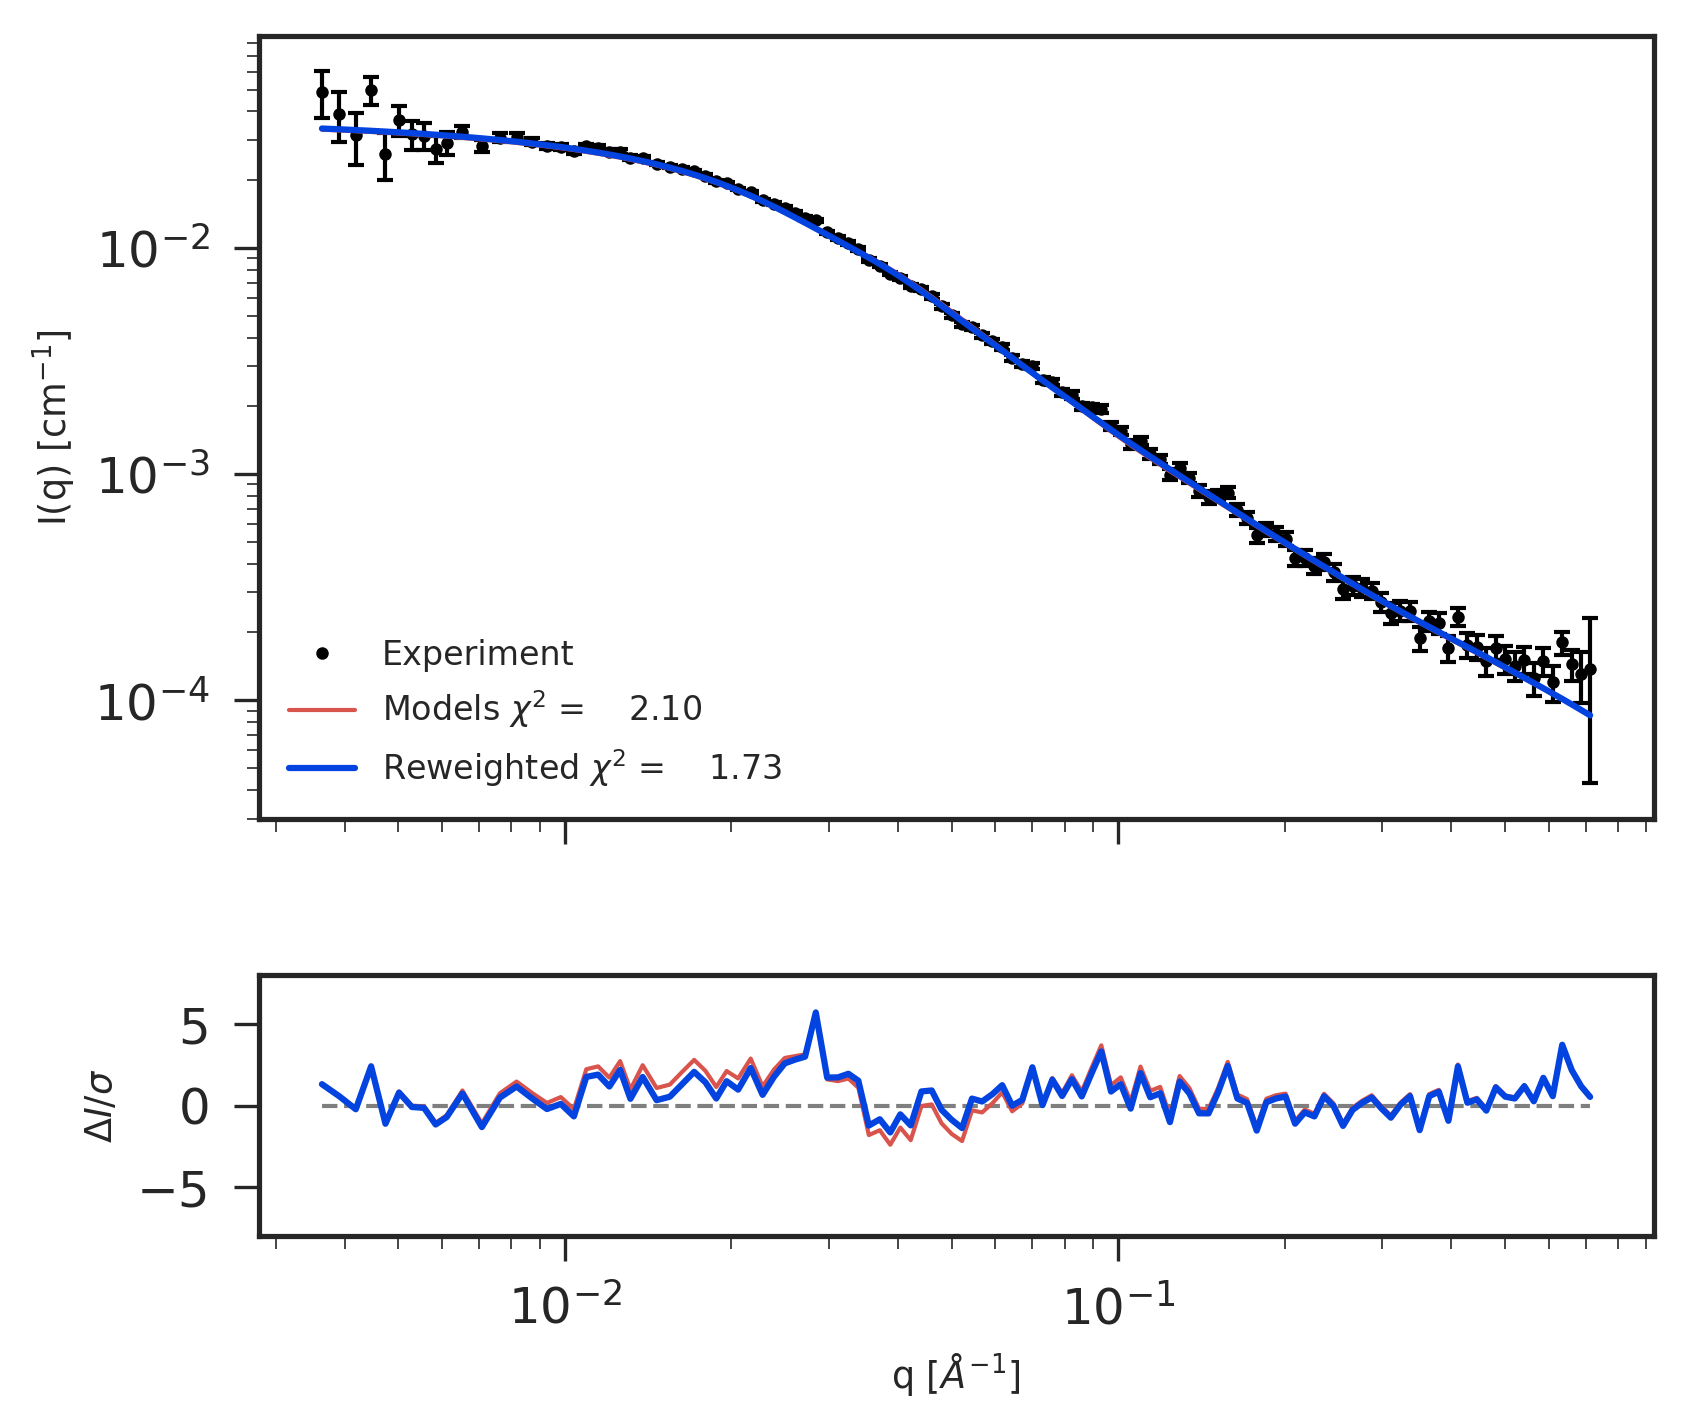

In [34]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws12q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_RgMetaD_pws12_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

### MD_Rg pws 13

# Set non-uniform initial weights from file. Sum= 1014.50063057 10091
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.7351e-04
# theta: 200.0
# theta: 400.0
# theta: 600.0
# theta: 800.0
# theta: 1200.0
# theta: 1600.0
# theta: 2400.0
# theta: 3200.0
# theta: 5000.0


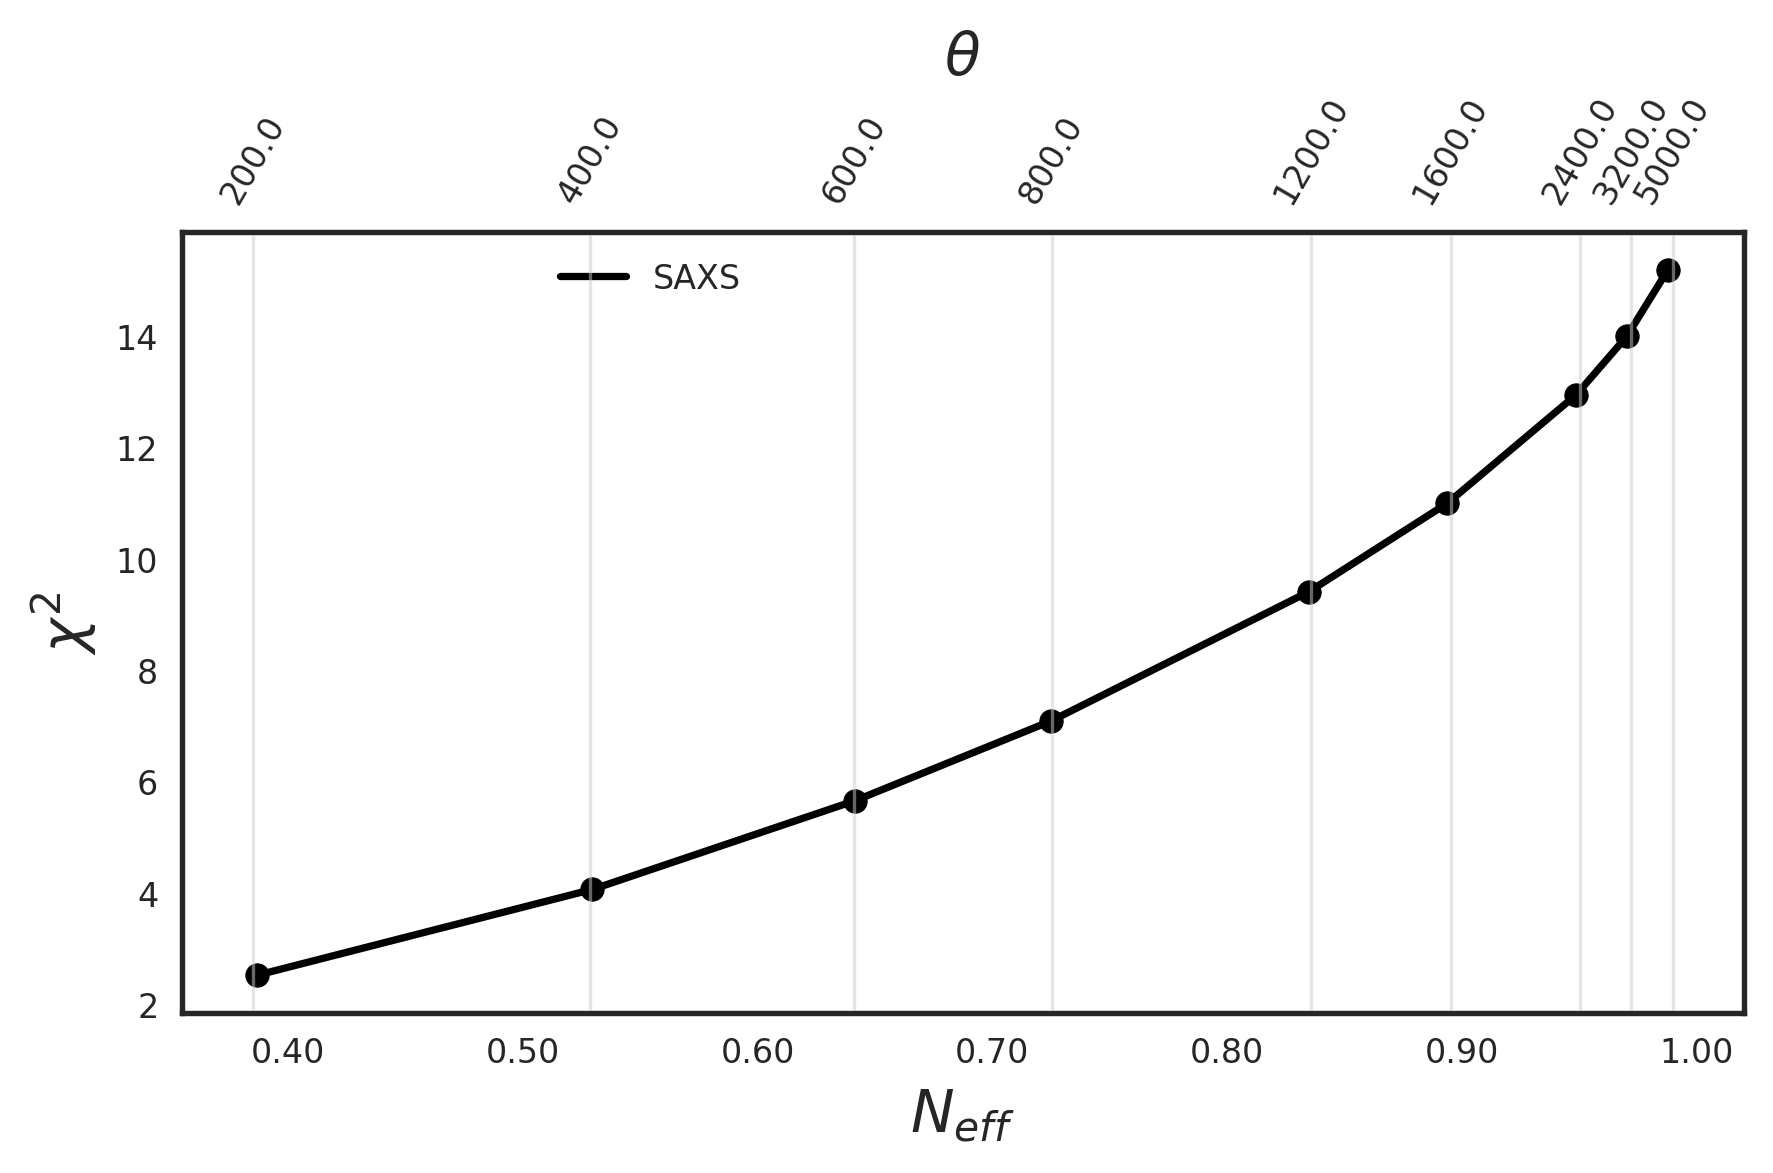

# theta: 1200
# CHI2_re before minimization:      17.2913
# CHI2_re after minimization:        9.4106
# Fraction of effective frames:      0.8348


In [35]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws13/BME/rgmd_pws13_Rg_1ns.dat',usecols=1)
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws13_q07.dat'

### initialize reweighting class

#rew = bme.Reweight()

# initialize reweighting class with weights                                                                                                                                
w0 =np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws13/BME/pws13_weights_1ns.dat')
rew = bme.Reweight(w0=list(w0))

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [200.,400.,600.,800.,1200.,1600.,2400.,3200.,5000.]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS and Rh
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.2f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [200,400,600,800,1200,1600,2400,3200,5000]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_RgMetaD_pws13_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=1200)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

mdpws13_chi2_before = chi2_before
mdpws13_chi2_after = chi2_after

In [36]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=1200

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws13q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws13q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.7351e-04
# theta: 1200


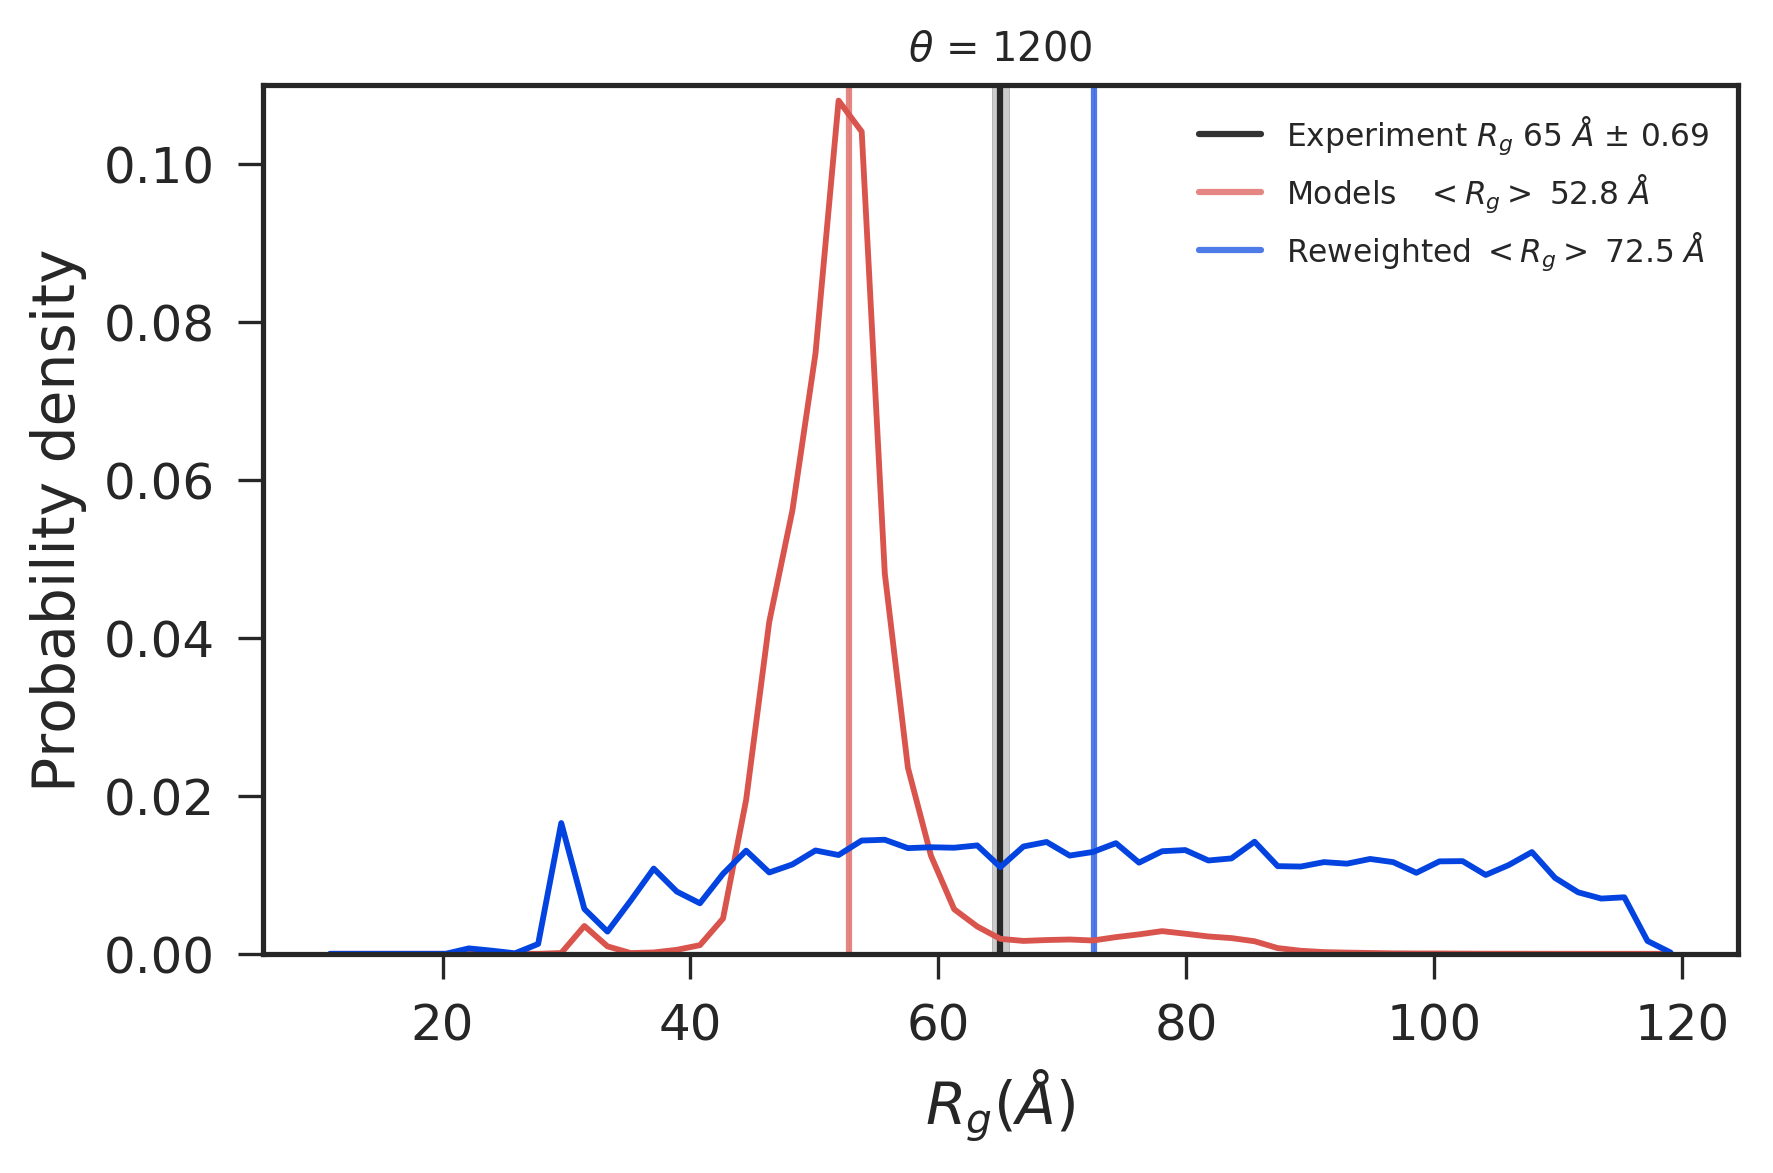

In [37]:
## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
#ax.xaxis.set_minor_formatter(ticker.NullFormatter())

#starty, end = ax.get_ylim()
#startx, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(starty, end, 1))
#ax.xaxis.set_ticks(np.arange(startx, end, 5))

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,120,60)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws13q07_{}_weights.dat'.format(j), usecols=1)
    weights2=np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws13/BME/pws13_weights_1ns.dat')
    w=weights2[j*binsize:(j+1)*binsize]
    #print (w)
    Rgb =np.average(data[j*binsize:(j+1)*binsize],weights=w)
    #Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    #Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    Rga =np.average(data[j*binsize:(j+1)*binsize],weights=weights)
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=w)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65+0.69, alpha=0.2, color=c1)
#ax.axvspan(RhExp-1.1,21.5+1.1, alpha=0.2, color=c1)
plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )

ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(0,0.11)
#plt.grid(alpha=0.2)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_RgMetaD_pws13_Th1200_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

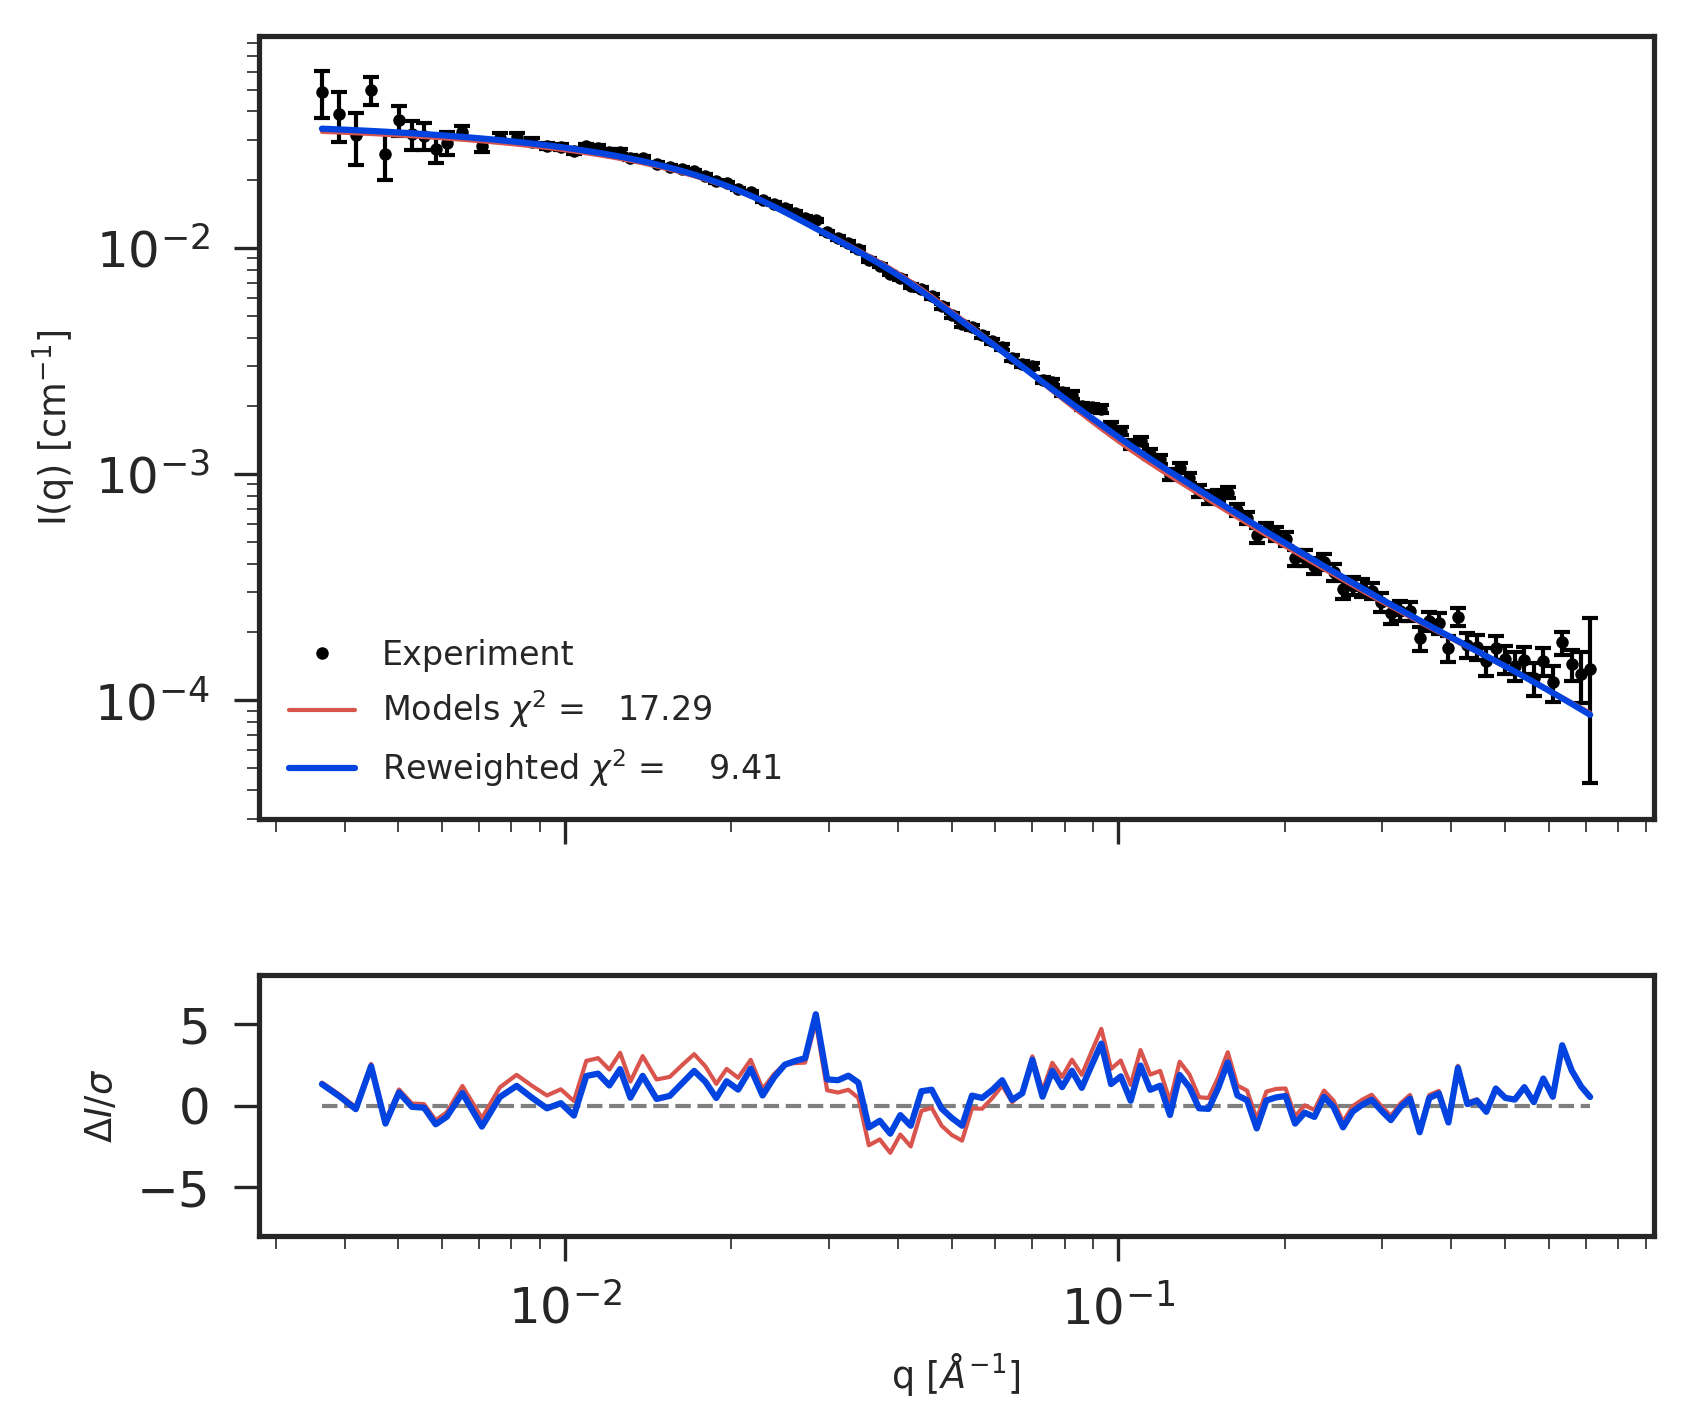

In [38]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws13q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_RgMetaD_pws13_Th1200_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

### MD_Rg pws 14

# Set non-uniform initial weights from file. Sum= 1841.11189853 9877
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.6427e-04
# theta: 50.0
# theta: 200.0
# theta: 400.0
# theta: 800.0
# theta: 1200.0
# theta: 1600.0
# theta: 5000


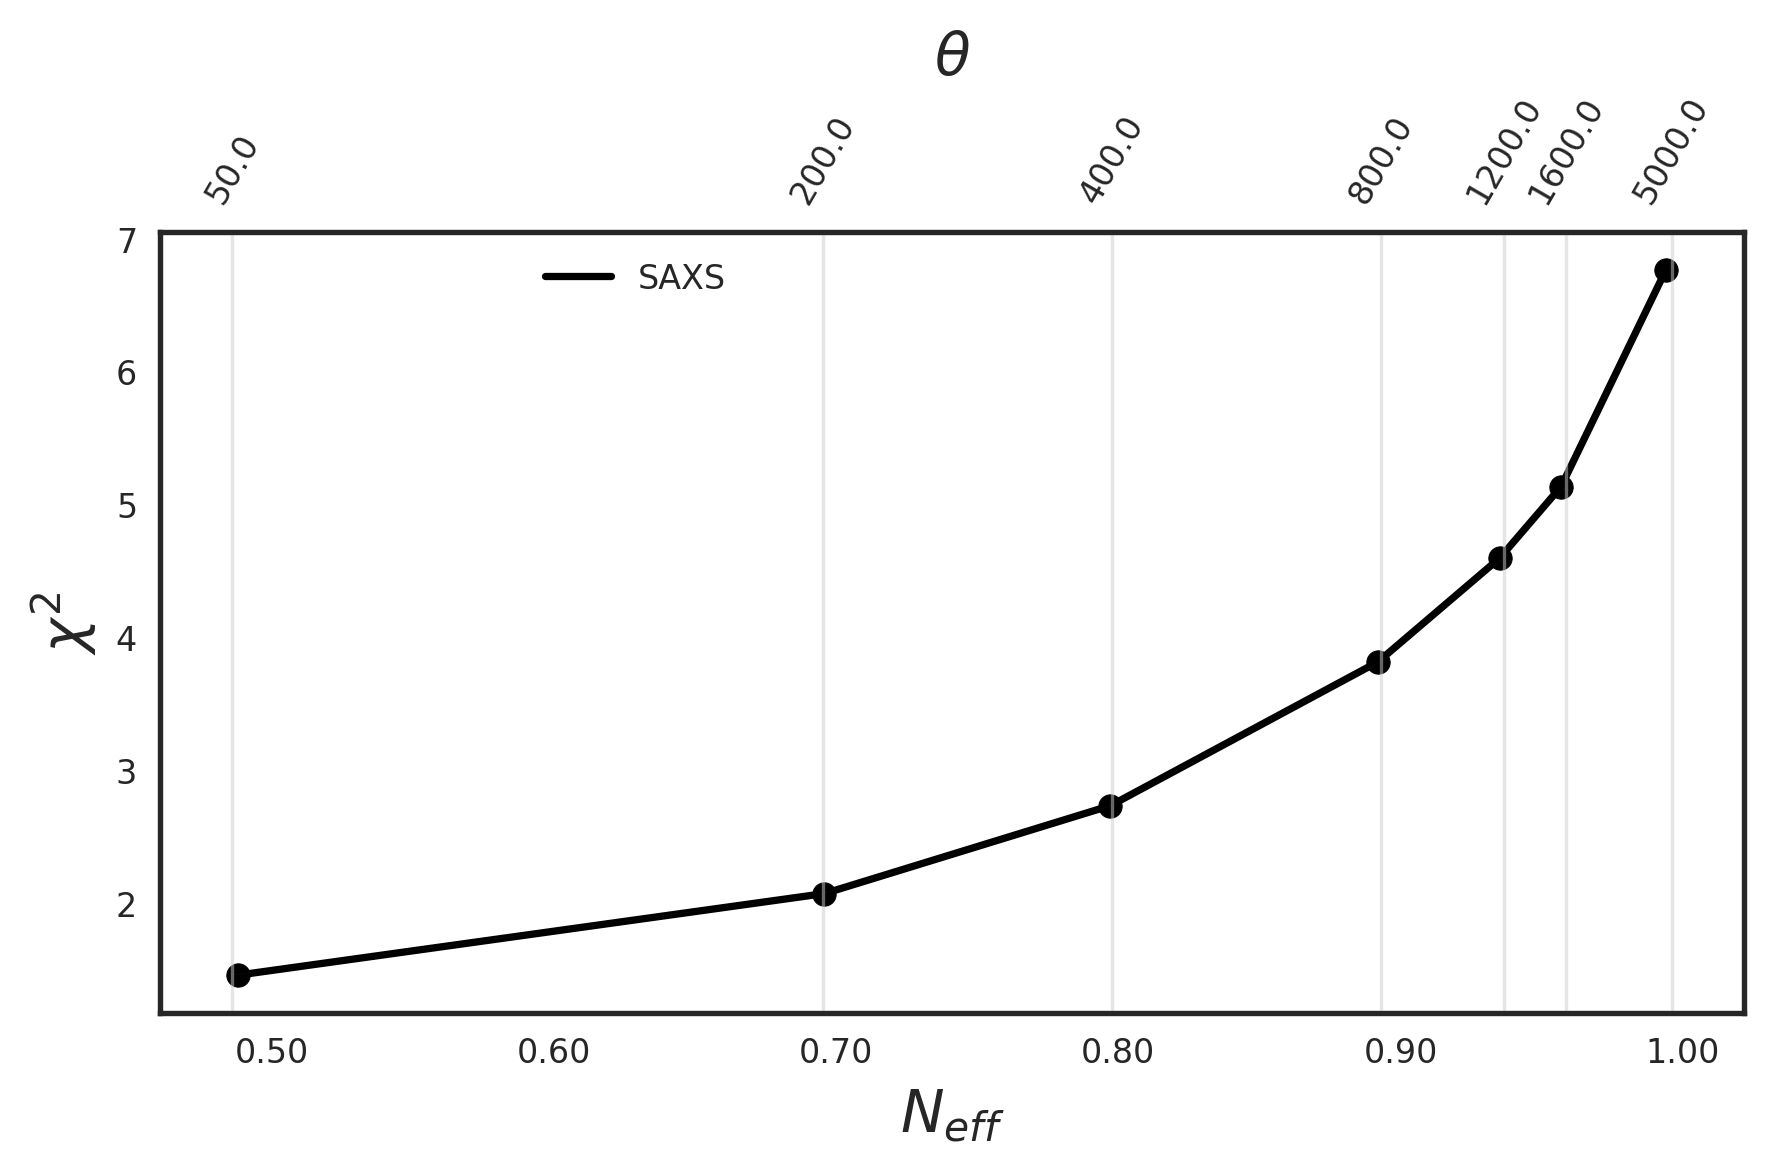

# theta: 1200
# CHI2_re before minimization:       7.8114
# CHI2_re after minimization:        4.5973
# Fraction of effective frames:      0.9352


In [39]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws14/BME/rgmd_pws14_Rg_1ns.dat',usecols=1)
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws14_q07.dat'

### initialize reweighting class

#rew = bme.Reweight()

# initialize reweighting class with weights                                                                                                                                
w0 =np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws14/BME/pws14_weights_1ns.dat')
rew = bme.Reweight(w0=list(w0))

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [50.,200.,400.,800.,1200.,1600.,5000]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS and Rh
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.2f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [50,200,400,800,1200,1600,5000]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_RgMetaD_pws14_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=1200)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

mdpws14_chi2_before = chi2_before
mdpws14_chi2_after = chi2_after

In [40]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=1200

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws14q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws14q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.6427e-04
# theta: 1200


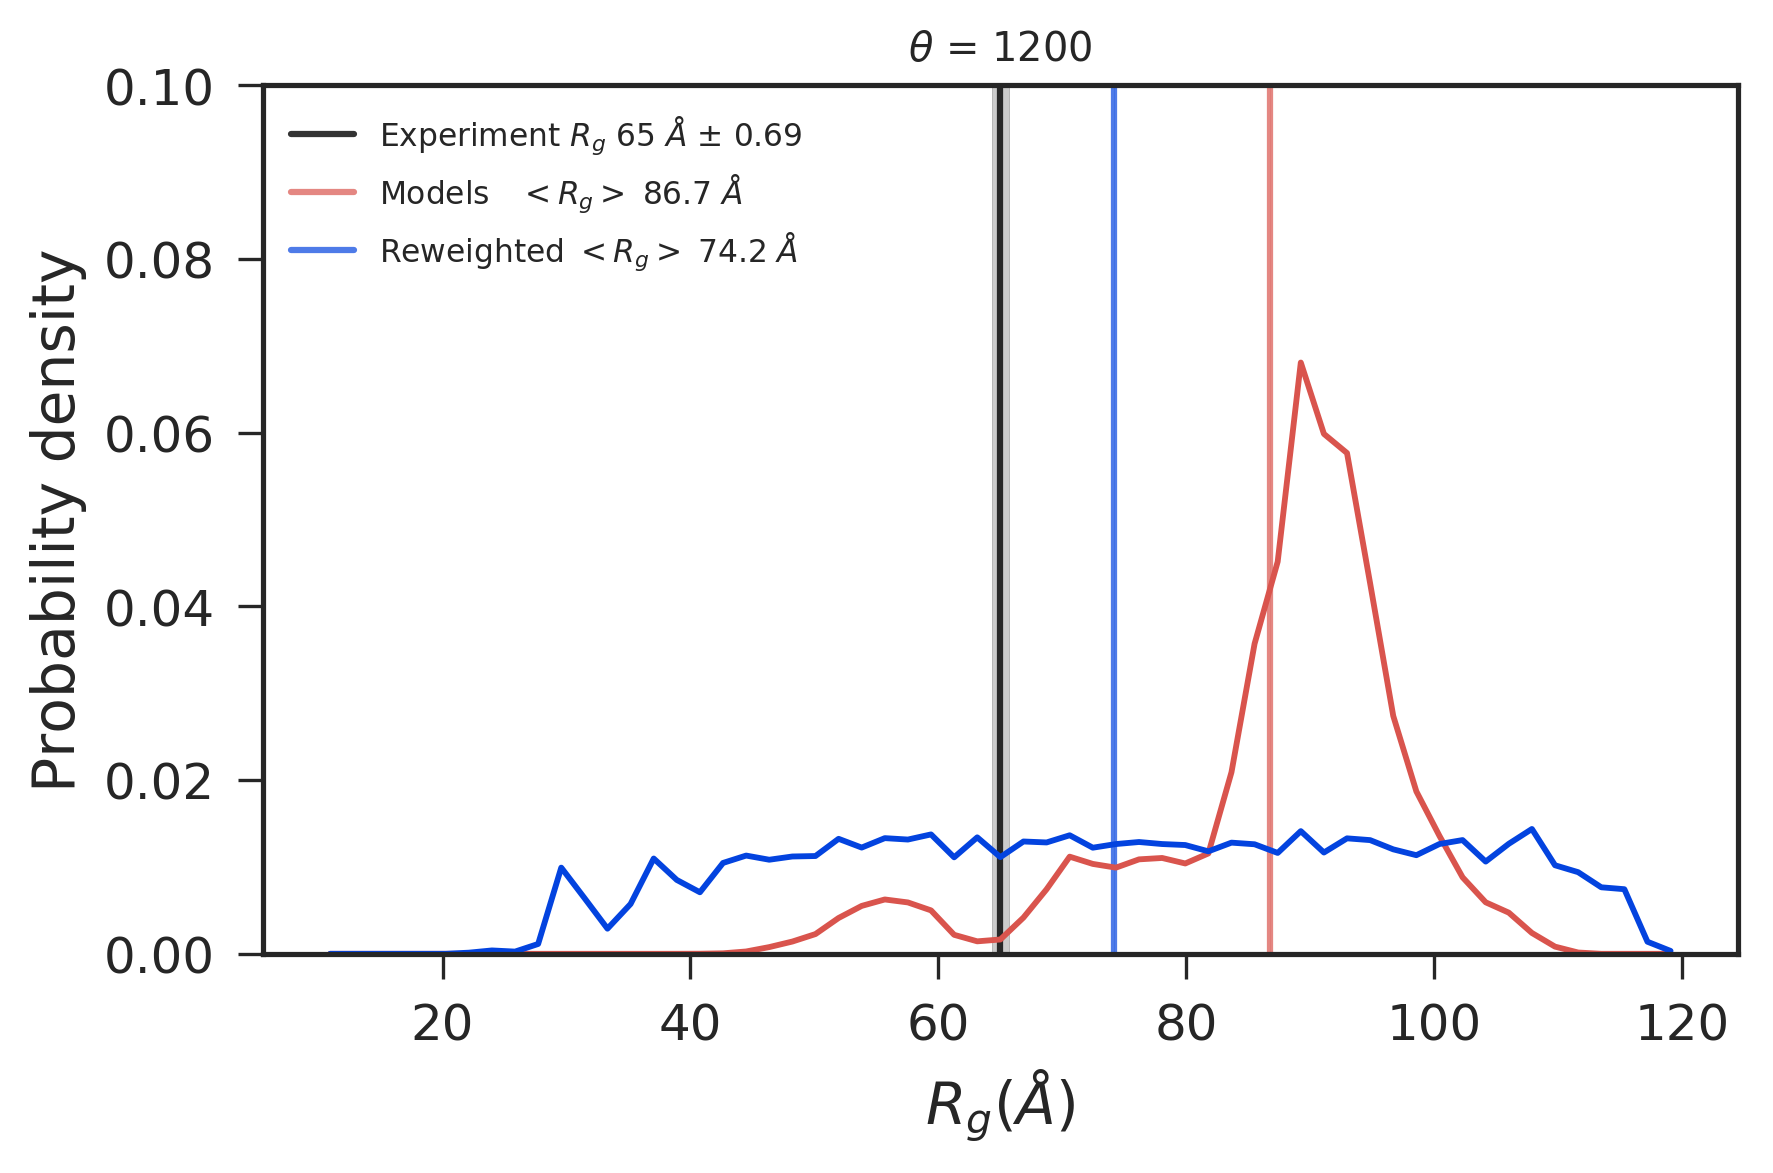

In [41]:
## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
#ax.xaxis.set_minor_formatter(ticker.NullFormatter())

#starty, end = ax.get_ylim()
#startx, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(starty, end, 1))
#ax.xaxis.set_ticks(np.arange(startx, end, 5))

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,120,60)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws14q07_{}_weights.dat'.format(j), usecols=1)
    weights2=np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws14/BME/pws14_weights_1ns.dat')
    w=weights2[j*binsize:(j+1)*binsize]
    #print (w)
    Rgb =np.average(data[j*binsize:(j+1)*binsize],weights=w)
    #Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    #Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    Rga =np.average(data[j*binsize:(j+1)*binsize],weights=weights)
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=w)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65+0.69, alpha=0.2, color=c1)
#ax.axvspan(RhExp-1.1,21.5+1.1, alpha=0.2, color=c1)
plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )
#plt.axvline(RhExp,ls='--',color=c1,alpha=0.8,lw=1.5,
            #zorder=0,label='Experiment $R_h$  21.5 $\AA$ $\pm$ 1.1' )
ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(0,0.1)
#plt.grid(alpha=0.2)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_RgMetaD_pws14_Th1200_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

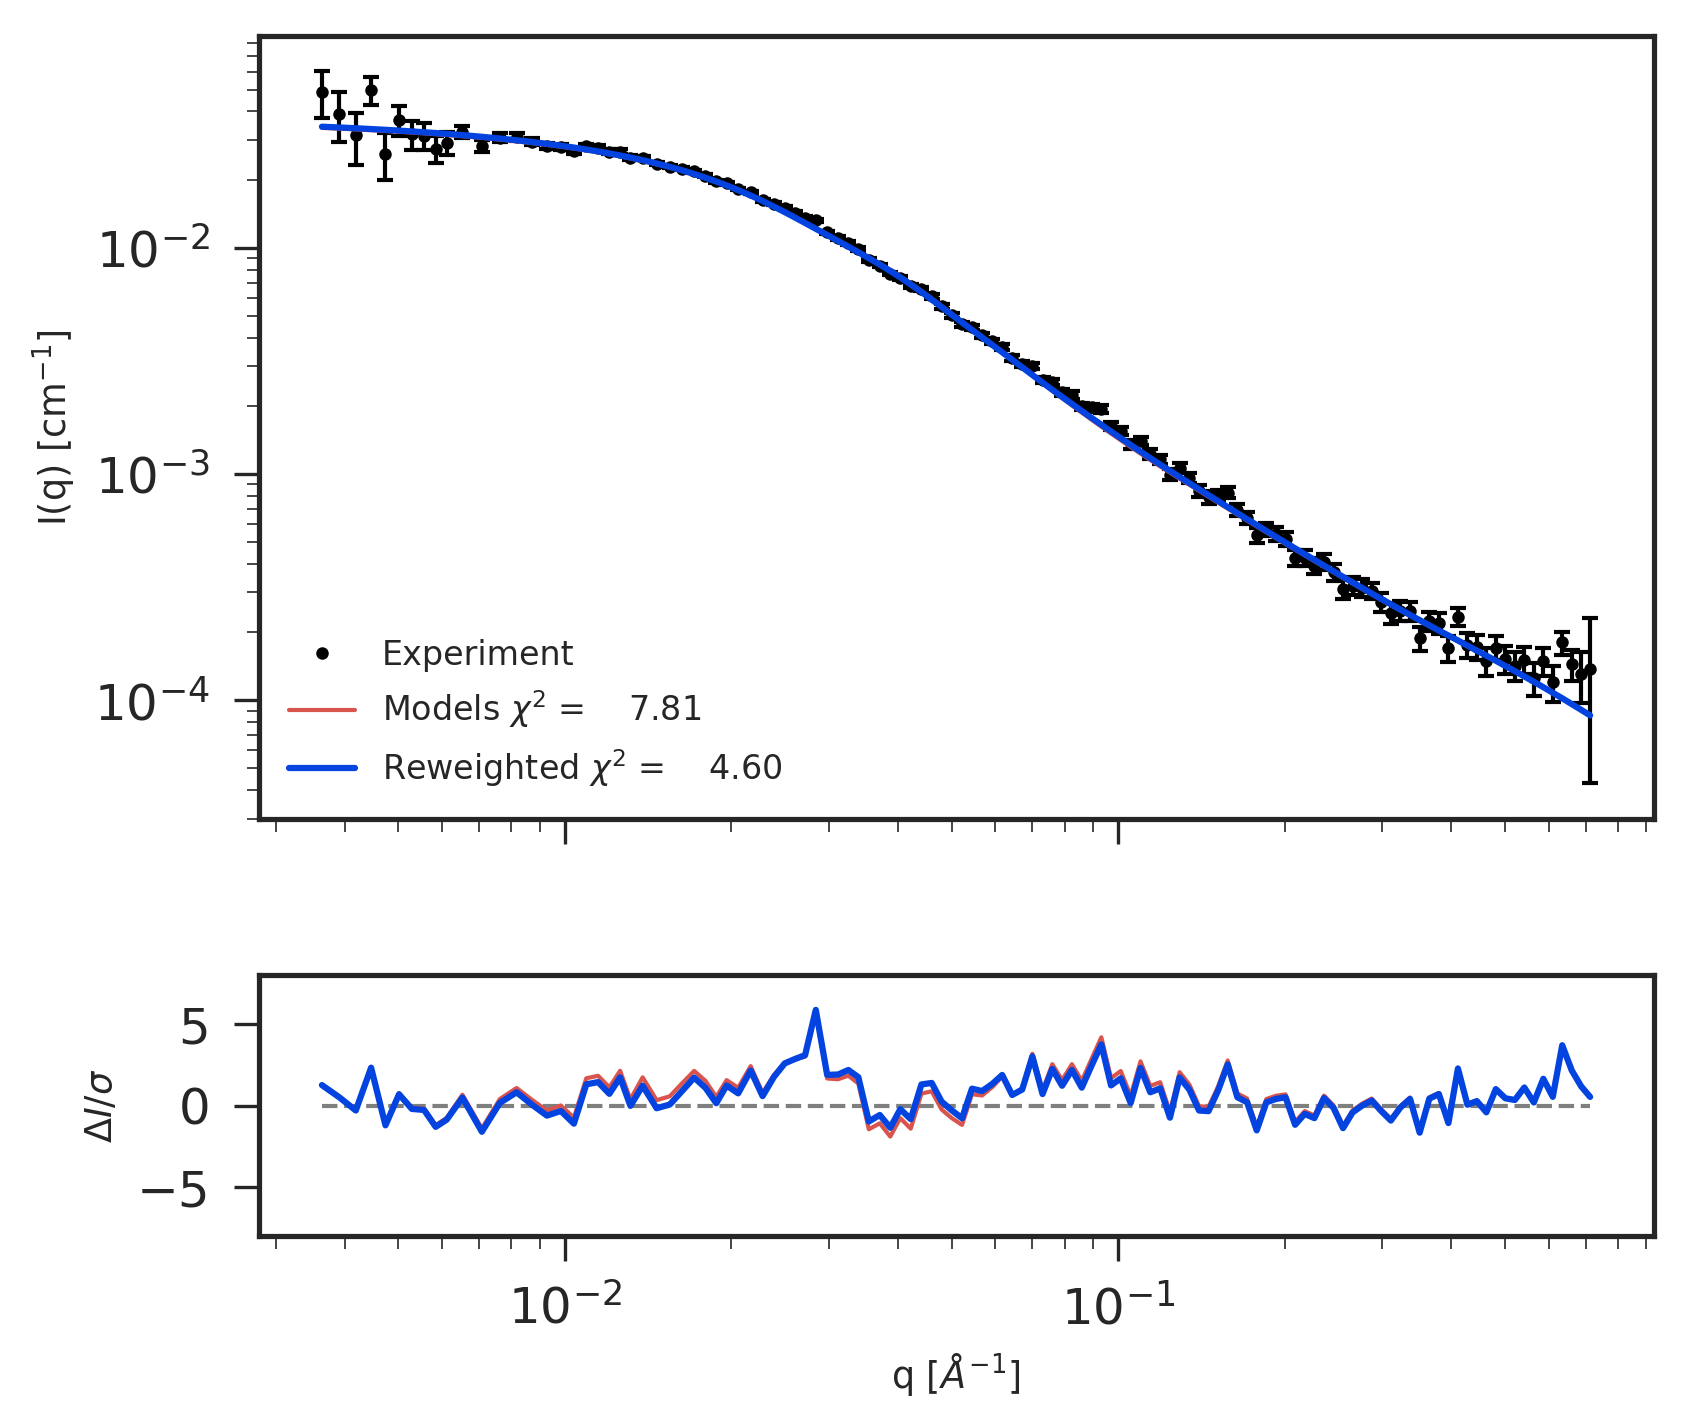

In [42]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws14q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_RgMetaD_pws14_Th1200_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

### RG_MD pws15

# Set non-uniform initial weights from file. Sum= 2649.78070325 9353
# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.9426e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.7480e-04
# theta: 50.0
# theta: 200.0
# theta: 400.0
# theta: 800.0
# theta: 1200.0
# theta: 1600.0
# theta: 5000


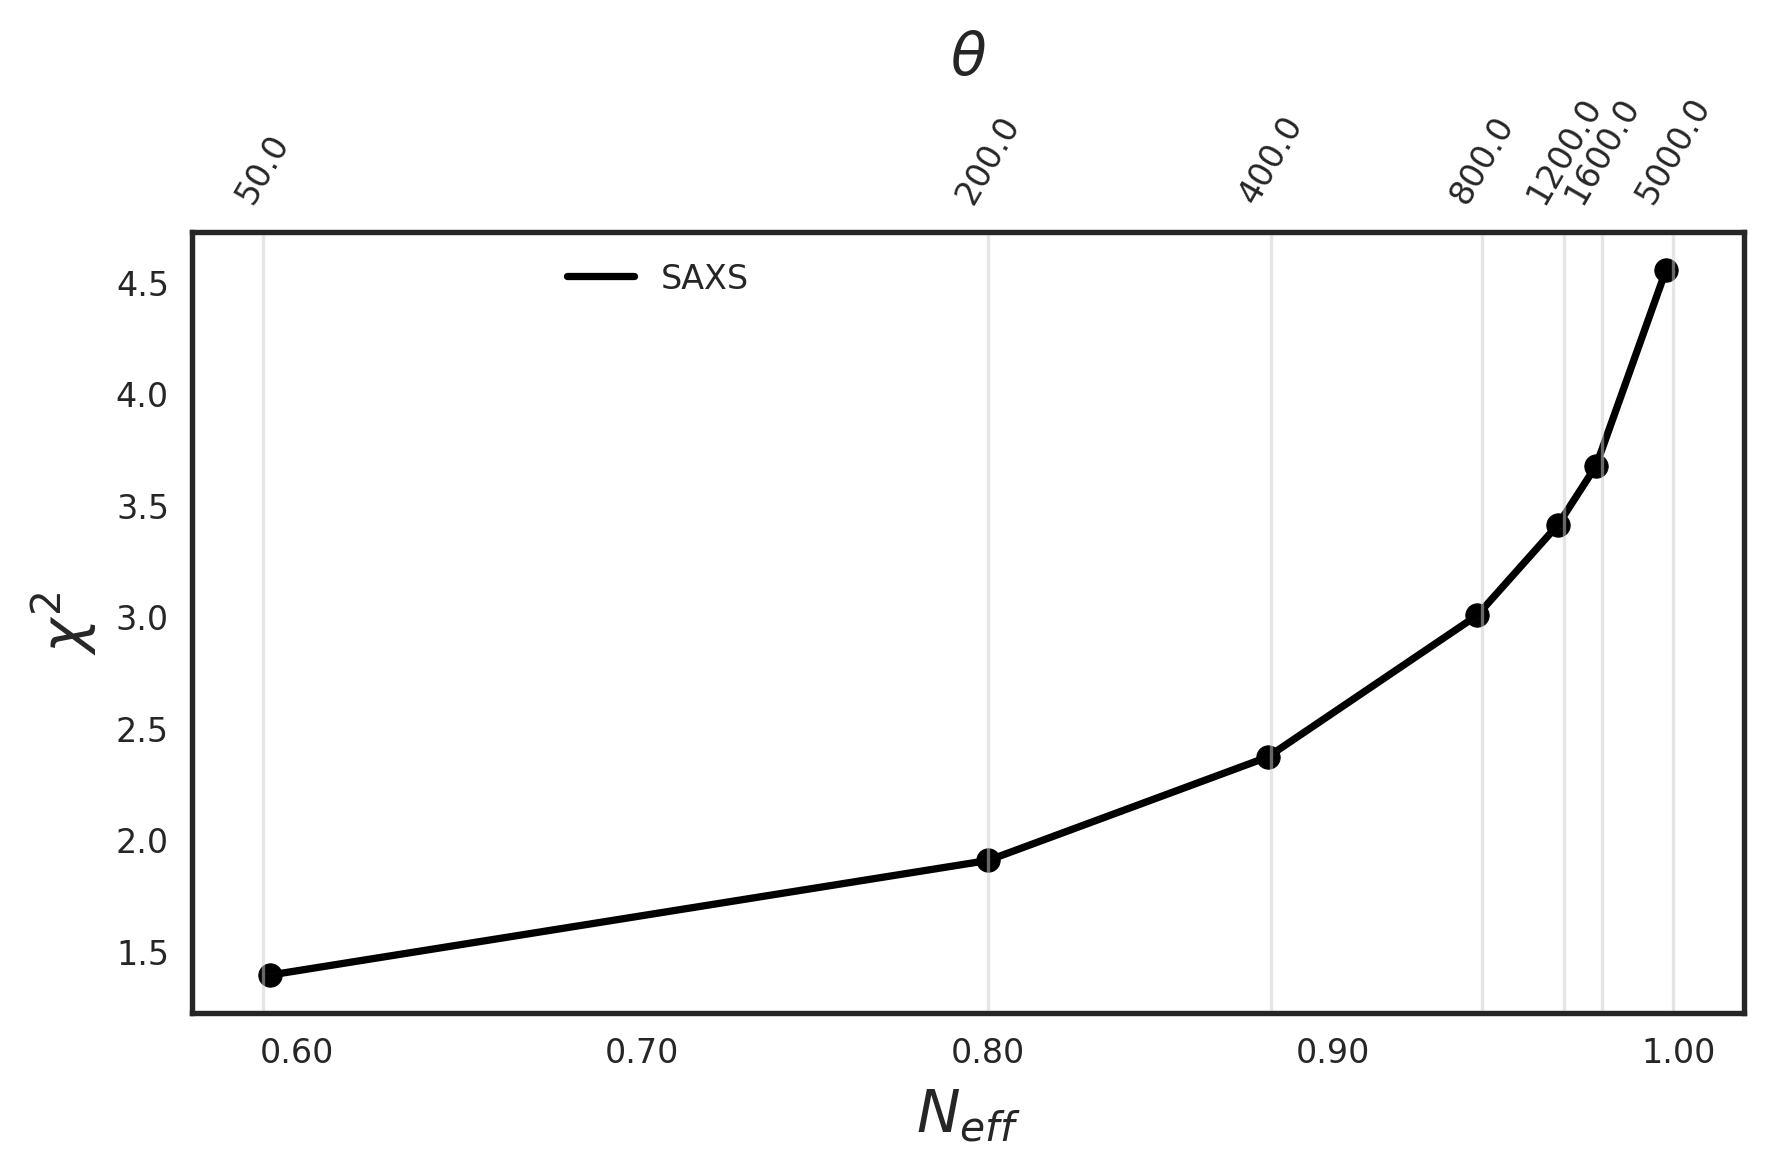

# theta: 800
# CHI2_re before minimization:       5.1920
# CHI2_re after minimization:        3.0050
# Fraction of effective frames:      0.9418


In [43]:
# BME and Fit to SAXS Data.

import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws15/BME/rgmd_pws15_Rg_1ns.dat',usecols=1)
#print(Rg)
RgExp =65
RgExpe =0.69

exp_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/GHR_ICD_unbiased_pws_fits/pws10/BME/EXP_07.dat'
calc_saxs = '/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/proc_fits/MetaD_pws15_q07.dat'

### initialize reweighting class

#rew = bme.Reweight()

# initialize reweighting class with weights                                                                                                                                
w0 =np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws15/BME/pws15_weights_1ns.dat')
rew = bme.Reweight(w0=list(w0))

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [50.,200.,400.,800.,1200.,1600.,5000]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS and Rh
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.2f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [50,200,400,800,1200,1600,5000]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/thetha_eff_plots/GHR_ICD_RgMetaD_pws15_Theta_Neff_1p14_q07avp.pdf', format = 'pdf', dpi = 300)
plt.show()

# select theta=800
chi2_before,chi2_after, srel = rew.optimize(theta=800)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

mdpws15_chi2_before = chi2_before
mdpws15_chi2_after = chi2_after

In [44]:
### Optimization for selected Theta 

n_frames = len(Rg)
n_bins =1
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=800

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws15q07_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws15q07_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

# Warning: expt average             0.004464=5.0000e-02 is larger than maximum value in simulation 4.9426e-02
# Warning: expt average             0.634790=1.8000e-04 is larger than maximum value in simulation 1.7480e-04
# theta: 800


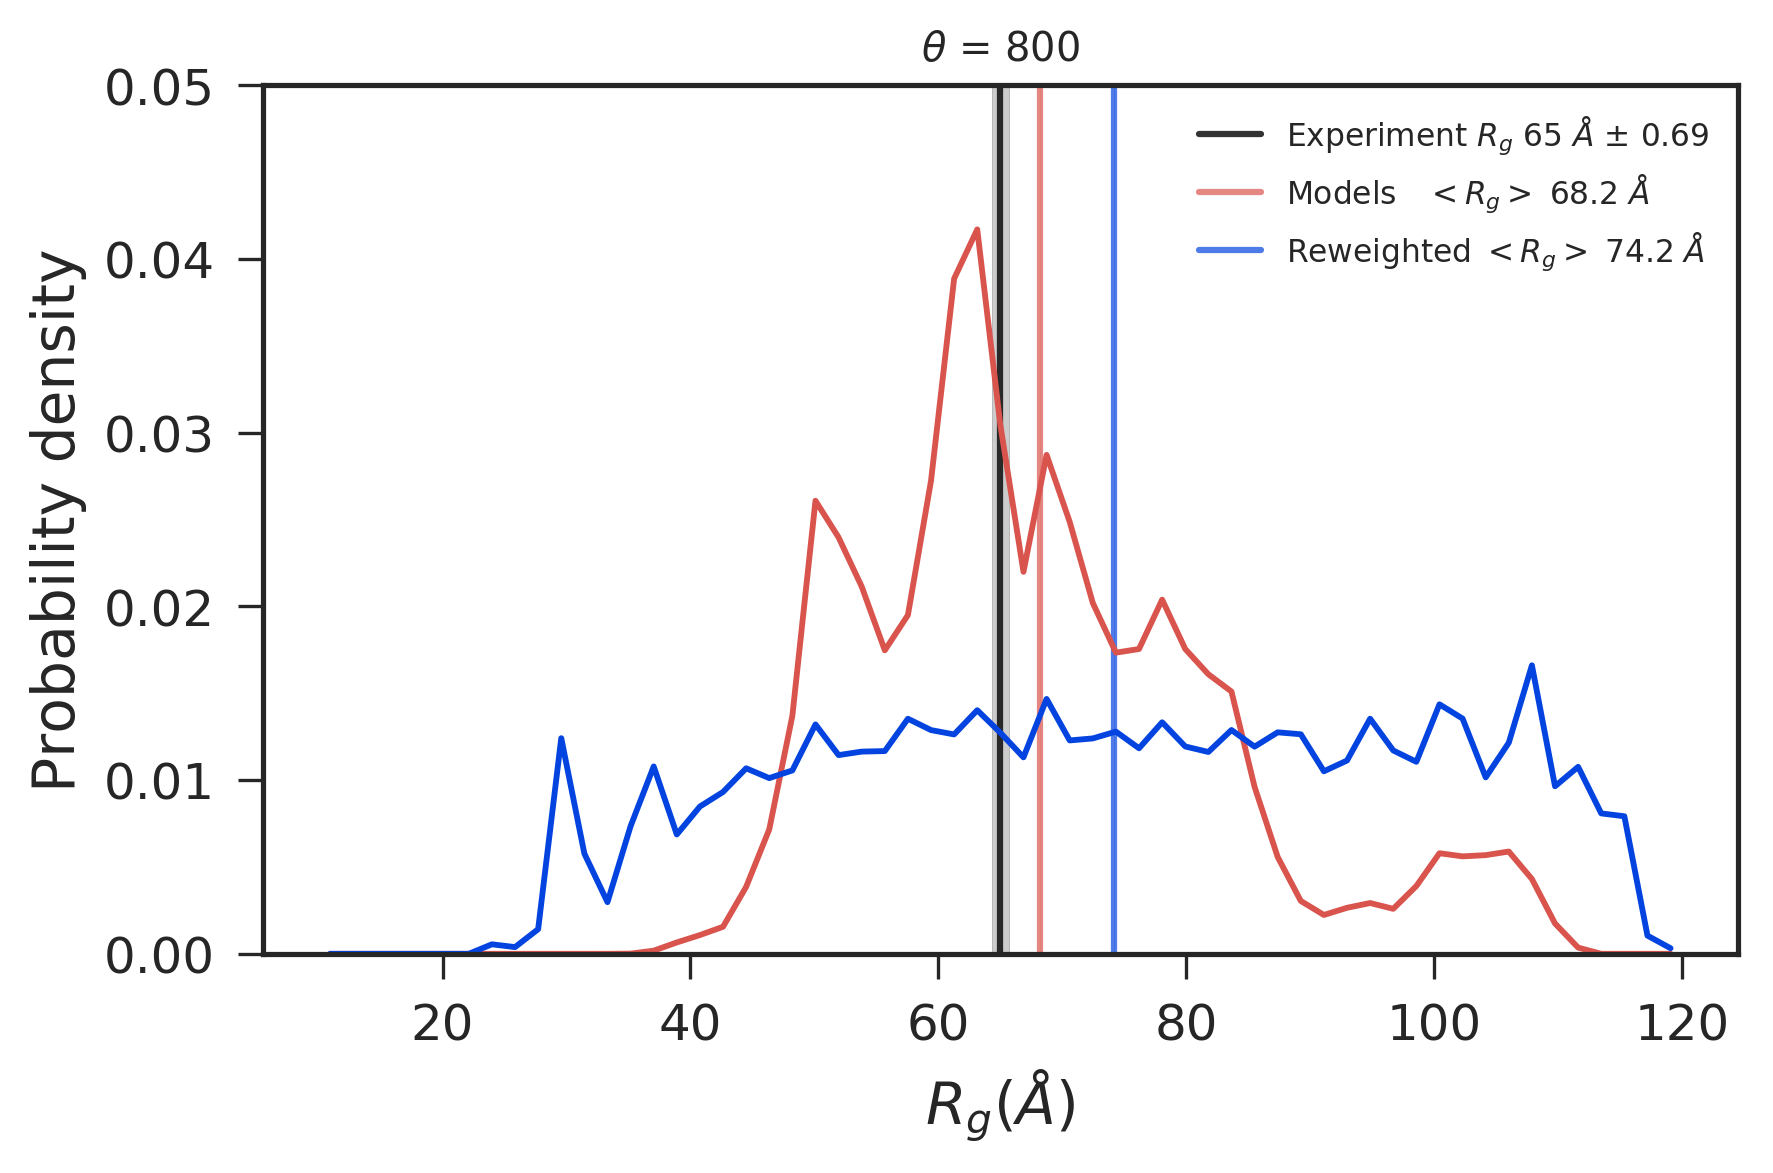

In [45]:
## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
#ax.xaxis.set_minor_formatter(ticker.NullFormatter())

#starty, end = ax.get_ylim()
#startx, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(starty, end, 1))
#ax.xaxis.set_ticks(np.arange(startx, end, 5))

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(10,120,60)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws15q07_{}_weights.dat'.format(j), usecols=1)
    weights2=np.loadtxt('/home/raul/projects/GHR_ICD_metaD_fits/pws15/BME/pws15_weights_1ns.dat')
    w=weights2[j*binsize:(j+1)*binsize]
    #print (w)
    Rgb =np.average(data[j*binsize:(j+1)*binsize],weights=w)
    #Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    #Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    Rga =np.average(data[j*binsize:(j+1)*binsize],weights=weights)
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=w)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)
xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.69,65+0.69, alpha=0.2, color=c1)
#ax.axvspan(RhExp-1.1,21.5+1.1, alpha=0.2, color=c1)
plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 65 $\AA$ $\pm$ 0.69' )
#plt.axvline(RhExp,ls='--',color=c1,alpha=0.8,lw=1.5,
            #zorder=0,label='Experiment $R_h$  21.5 $\AA$ $\pm$ 1.1' )
ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta))
plt.ylim(0,0.05)
#plt.grid(alpha=0.2)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/rg_dist_plots/GHR_ICD_RgMetaD_pws15_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

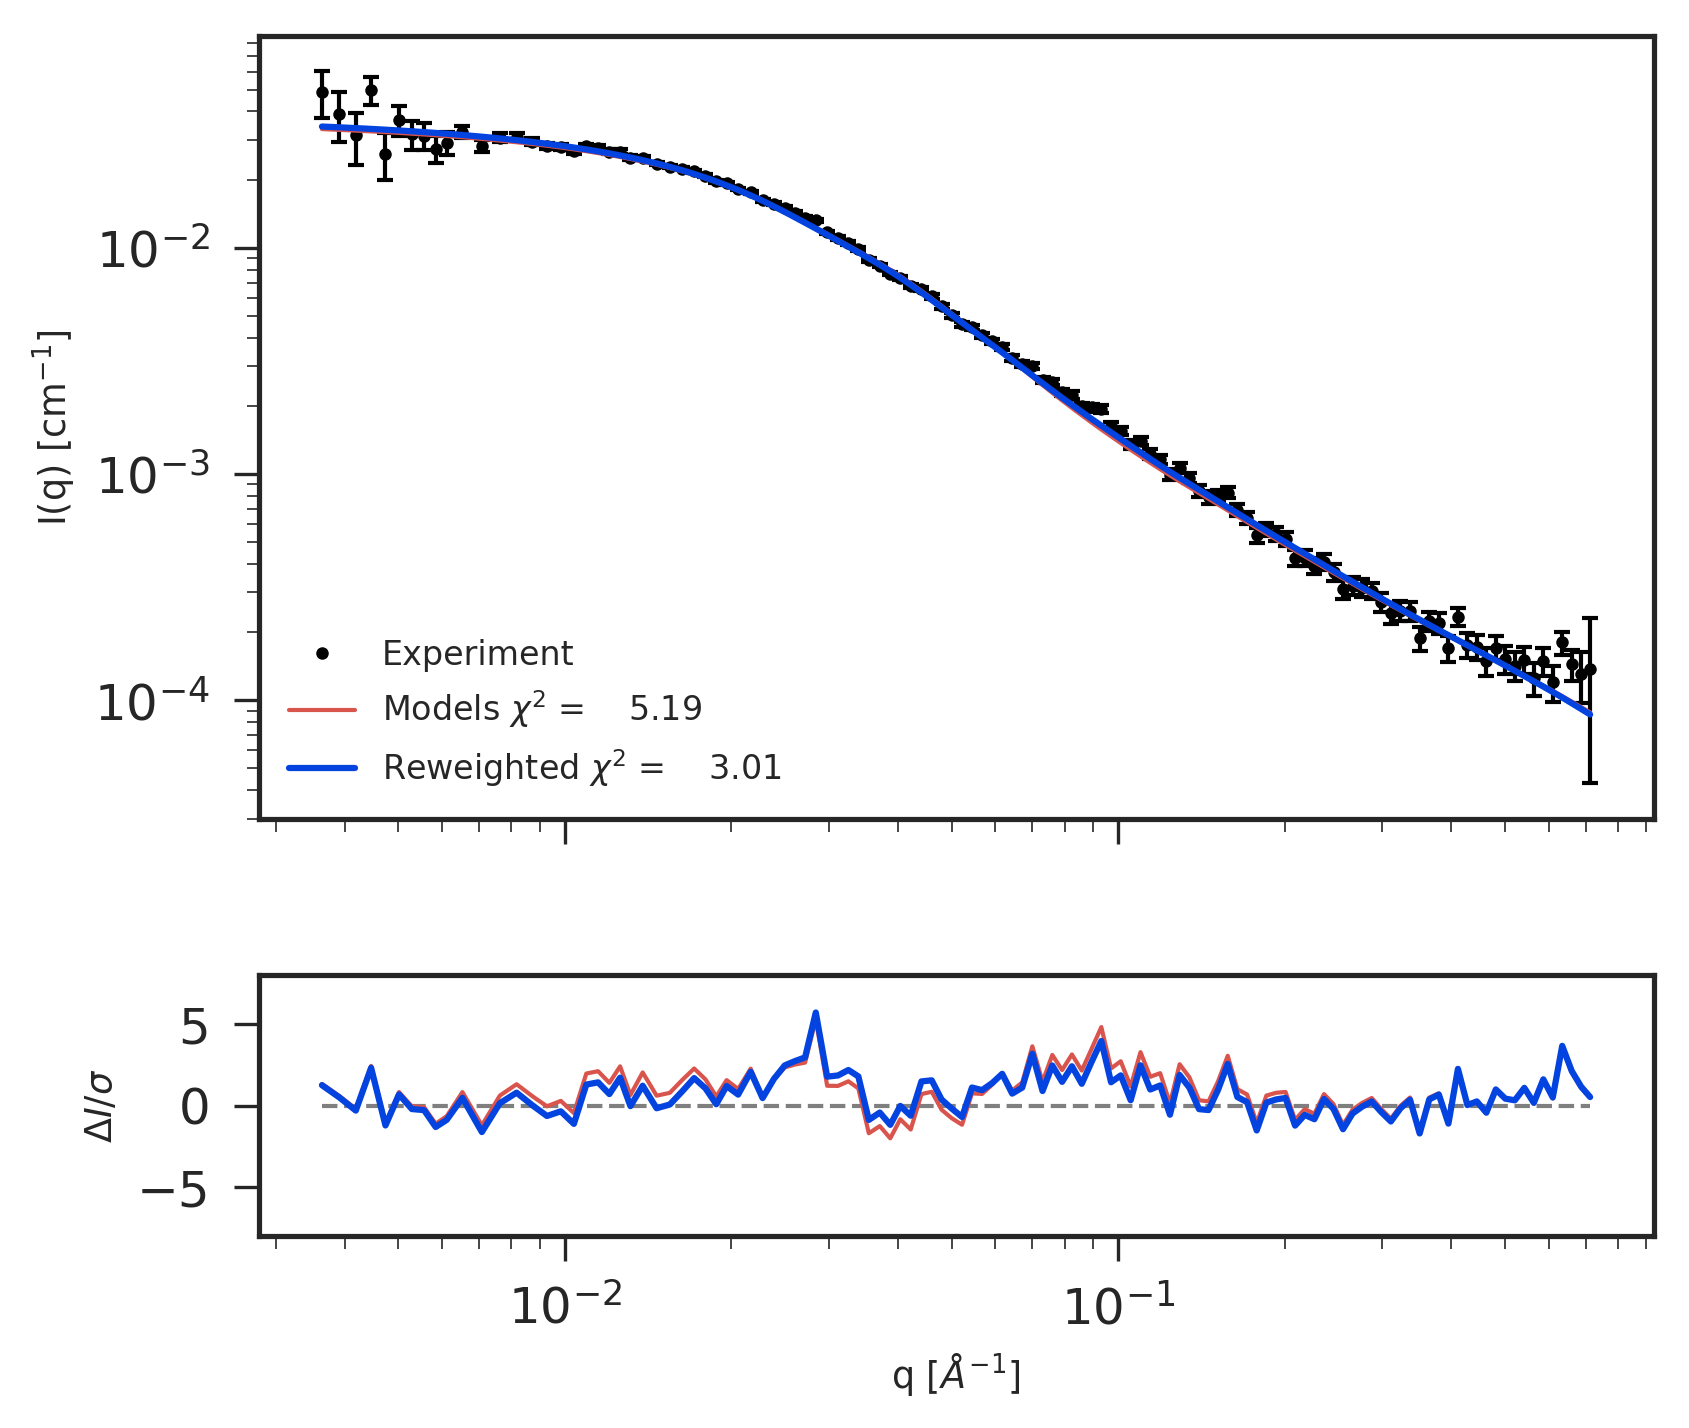

In [46]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

exp = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1);
sts = np.loadtxt("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/BME/rgmetaD_pws15q07_0_.stats.dat");


fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(6, 5.3))

#Experimental
ax0.loglog( exp[:,0],exp[:,1], 'o',alpha=1, c='black',markersize = 3, label = 'Experiment')
ax0.errorbar (exp[:,0],exp[:,1],yerr=exp[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c=c2, linewidth = 1, zorder = 4)

#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c=c3,linewidth = 1.5, zorder = 5)

ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
#residual plot

ax1.hlines( 0, min(exp[:,0]), max(exp[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c=c2, linewidth = 1, label = 'Models' )
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], c=c3, linewidth = 1.5, label = 'Reweighted')

ax1.set_ylim((-8,8))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)

plt.savefig('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/SAXS_fit_plots/GHR_ICD_RgMetaD_pws15_Th800_1p14_q07avpf.pdf', format = 'pdf', dpi=300)
plt.show()

## Fig 3 SM Plots (3 panels -- Chi2, Chi2_rew, Rg)

In [47]:
print (ubpws5_chi2_before) 
print (ubpws5_chi2_after)  

print (ubpws6_chi2_before) 
print (ubpws6_chi2_after)  

print (ubpws8_chi2_before) 
print (ubpws8_chi2_after)  

print (ubpws10_chi2_before) 
print (ubpws10_chi2_after)  

print (mdpws10_chi2_before) 
print (mdpws10_chi2_after )

print (mdpws11_chi2_before) 
print (mdpws11_chi2_after)  

print (mdpws12_chi2_before) 
print (mdpws12_chi2_after)  

print (mdpws13_chi2_before) 
print (mdpws13_chi2_after)  

print (mdpws14_chi2_before) 
print (mdpws14_chi2_after)  

print (mdpws15_chi2_before) 
print (mdpws15_chi2_after)  

91.6411270782
32.8794443492
23.7193908057
8.96114586379
2.74742926024
2.33338262418
1.51096880042
1.4673128479
3.94084965066
2.48672799181
11.4745783692
7.02242872531
2.10354489659
1.73491402522
17.2912684725
9.41055973093
7.81136782768
4.59730422497
5.19195152969
3.0050477405


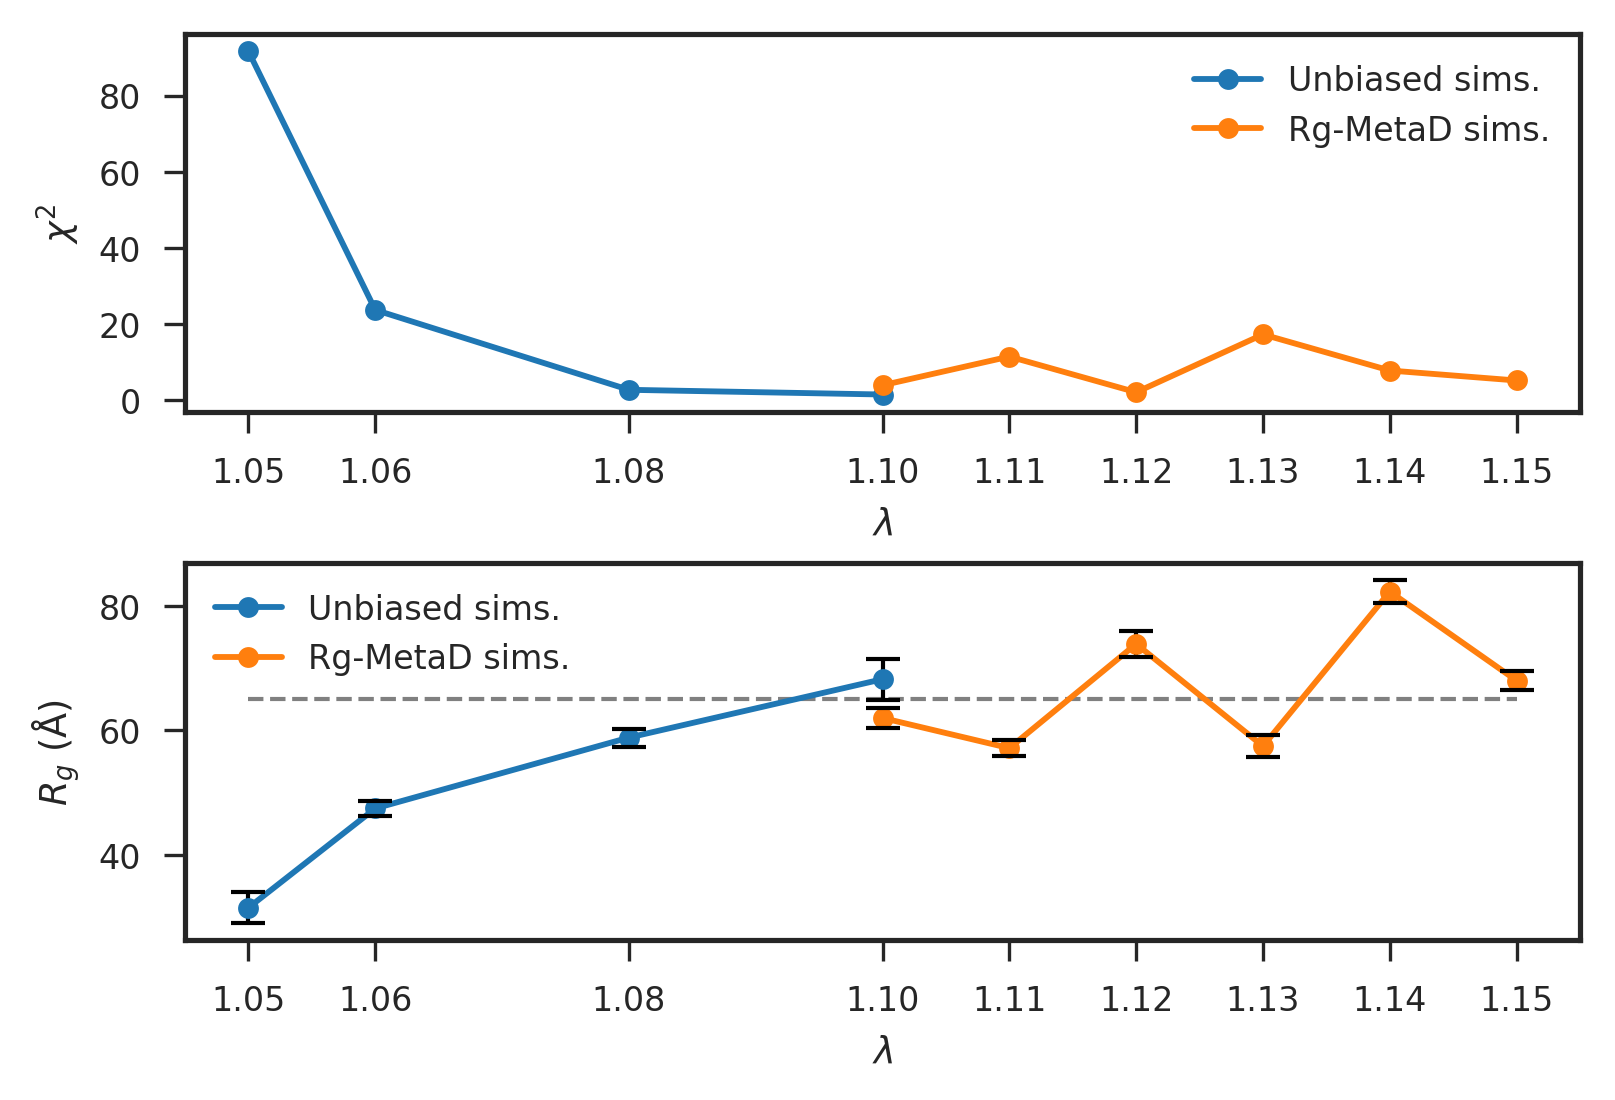

In [64]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, )
fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = False,figsize=(6, 4), gridspec_kw = {"hspace" : 0.4})


## Chi2_plot
#plt.subplot (211)
#chi2_ub = np.array([[1.05,98.98],[1.06,26.45],[1.08,3.54],[1.10,2.06]])
#chi2_rgmd = np.array([[1.10,4.80],[1.11,14.97],[1.12,3.75],[1.13,22.38],[1.14,16.10],[1.15,6.13]])

chi2_ub = np.array([[1.05,ubpws5_chi2_before],[1.06,ubpws6_chi2_before],[1.08,ubpws8_chi2_before],[1.10,ubpws10_chi2_before]])
chi2_rgmd = np.array([[1.10,mdpws10_chi2_before],[1.11,mdpws11_chi2_before],[1.12,mdpws12_chi2_before],[1.13,mdpws13_chi2_before],[1.14,mdpws14_chi2_before],[1.15,mdpws15_chi2_before]])

#chi2_rew_ub = np.array([[1.05,45.57],[1.06,15.39],[1.08,2.86],[1.10,1.94]])
#chi2_rew_rgmd = np.array([[1.10,3.05],[1.11,8.60],[1.12,2.63],[1.13,11.52],[1.14,7.50],[1.15,4.41]])

chi2_rew_ub = np.array([[1.05,ubpws5_chi2_after],[1.06,ubpws6_chi2_after],[1.08,ubpws8_chi2_after],[1.10,ubpws10_chi2_after]])
chi2_rew_rgmd = np.array([[1.10,mdpws10_chi2_after],[1.11,mdpws11_chi2_after],[1.12,mdpws12_chi2_after],[1.13,mdpws13_chi2_after],[1.14,mdpws14_chi2_after],[1.15,mdpws15_chi2_after]])

ax0.plot(chi2_ub[:,0],chi2_ub[:,1] ,'o-',label='Unbiased sims.',markersize = 5)
ax0.plot(chi2_rgmd[:,0],chi2_rgmd[:,1] ,'o-', label='Rg-MetaD sims.',markersize = 5)

ax0.set_ylabel('$\chi^2$')
ax0.set_xlabel('$\lambda$')
#plt.ylim([-1, 102])
ax0.legend(loc='best', frameon = False)
ax0.set_xticks([1.05,1.06,1.08,1.10,1.11,1.12,1.13,1.14,1.15])
ax0.tick_params(which='minor', axis='x', direction="out")
ax0.tick_params(which='major', length=5)
## Rg Plot
#plt.subplot (212)

arr = np.array([[1.05,Rg_avgstd_pws5[0],Rg_avgstd_pws5[1]],[1.06,Rg_avgstd_pws6[0],Rg_avgstd_pws6[1]],[1.08,Rg_avgstd_pws8[0],Rg_avgstd_pws8[1]],[1.10,Rg_avgstd_pws10[0],Rg_avgstd_pws10[1]]])
arr2 =np.array([[1.10,Rg_avgstd_bpws10[0],Rg_avgstd_bpws10[1]],[1.11,Rg_avgstd_bpws11[0],Rg_avgstd_bpws11[1]],[1.12,Rg_avgstd_bpws12[0],Rg_avgstd_bpws12[1]],[1.13,Rg_avgstd_bpws13[0],Rg_avgstd_bpws13[1]],[1.14,Rg_avgstd_bpws14[0],Rg_avgstd_bpws14[1]],[1.15,Rg_avgstd_bpws15[0],Rg_avgstd_bpws15[1]]])



ax1.plot(arr[:,0],arr[:,1] ,'o-', label='Unbiased sims.',markersize = 5)
ax1.plot(arr2[:,0],arr2[:,1] ,'o-', label='Rg-MetaD sims.',markersize = 5)
ax1.errorbar(arr[:,0],arr[:,1],yerr=arr[:,2],alpha=1,capsize=4, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')
ax1.errorbar(arr2[:,0],arr2[:,1],yerr=arr2[:,2],alpha=1,capsize=4, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')
ax1.hlines( 65, min(arr[:,0]), max(arr2[:,0]), linestyle = '--', color = 'grey', linewidth = 1, zorder=0 )             
ax1.set_ylabel('$R_g$ (Å)')
ax1.set_xlabel('$\lambda$')
#plt.ylim([25, 90])
#plt.xlim([2, 245]) 
ax1.legend(loc='best', frameon = False)
ax1.set_xticks([1.05,1.06,1.08,1.10,1.11,1.12,1.13,1.14,1.15])
ax1.tick_params(which='minor', axis='x', direction="out")
ax1.tick_params(which='major', length=5)
#plt.tight_layout()  

plt.savefig("/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/Fig3S/Fig3S_sept0220_fullq.pdf", dpi=300)
plt.show()

In [66]:

#print (chi2_rew_ub[:,:])
print (chi2_ub.shape)
print (chi2_rew_ub.shape)
print (arr.shape)


#ub_chi_rg =np.concatenate((chi2_ub,chi2_rew_ub,arr),axis=0)
ub_chi_rg =np.concatenate((chi2_ub,chi2_rew_ub[:,1],arr[:,1,2]),axis=1)
#rgmd_chi_rg=np.concatenate((chi2_rgmd,chi2_rew_rgmd,arr),axis=1)


#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/Fig3S/chi2_ub.dat',chi2_ub, delimiter = ' ',fmt='%s')
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/Fig3S/chi2_rgmd.dat',chi2_rgmd, delimiter = ' ',fmt='%s')
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/Fig3S/chi2_rew_ub.dat',chi2_rew_ub, delimiter = ' ',fmt='%s')
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/Fig3S/chi2_rew_rgmd.dat',chi2_rew_rgmd, delimiter = ' ',fmt='%s')
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/Fig3S/Rg_ub.dat',arr, delimiter = ' ',fmt='%s')
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/Fig3S/Rg_rgmd.dat',arr2, delimiter = ' ',fmt='%s')
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/Fig3S/ub_chi2_Rg_summary.dat',ub_chi_rg, delimiter = ' ',fmt='%s')
#np.savetxt('/home/raul/projects/GHR_ICD_metaD_fits/fig3_redo_aug2020/Fig3S/rgmd_chi2_Rg_summary.dat',rgmd_chi_rg, delimiter = ' ',fmt='%s')



(4, 2)
(4, 2)
(4, 3)


IndexError: too many indices for array